# Overview


perform a clustering analysis using the K-means method and define how we select the appropriate "K" for the k-means approach, as well as how we build features and clusters Explain the resulting clusters and evaluate the quality of the resulting clusters.then carry out a statistical study of loyalty scores for each cluster of users and repeat the process while using "PCA", then utilise frequent pattern mining to discover frequently co-occurring transaction kinds.


# Import the required libraries

In [ ]:
# import the required libraries
! pip install missingno
!pip install category_encoders
!conda install -c conda-forge/label/gcc7 missing
!pip install missingno
import pandas as pd
import scipy
from scipy import stats
from scipy.stats import norm
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# >>>>>>>>>>>>>>>>>>>>>> ERROR REPORT <<<<<<<<<<<<<<<<<<<<<<

    Traceback (most recent call last):
      File "/opt/conda/lib/python3.9/site-packages/conda/gateways/repodata/__init__.py", line 161, in conda_http_errors
        yield
      File "/opt/conda/lib/python3.9/site-packages/conda/gateways/repodata/__init__.py", line 127, in repodata
        response.raise_for_status()
      File "/opt/conda/lib/python3.9/site-packages/requests/models.py", line 1021, in raise_for_status
        raise HTTPError(http_error_msg, response=self)
    requests.exceptions.HTTPError: 404 Client Error: Not Found for url: https://conda.anaconda.org/conda-forge/label/gcc7/linux-64/current_repodata.json
    
    During handling of the above exception, another exception occurred:
    
    Traceback (most recent call last):
      File "/opt/conda/lib/python3.9/site-packages/requests/models.py", line 971, in json
        return complexjson.loads(self.text, **kwargs)
      File "/opt/conda/lib/python3.9/site

# Read data

In [ ]:
# read historical transactions csv files
historical_transactions=pd.read_csv('historical_transactions.csv')

In [ ]:
# read new merchant transactions csv files
new_merchant_transactions=pd.read_csv('new_merchant_transactions.csv')

In [ ]:
# read userscore csv files
userscore=pd.read_csv('userscore.csv')

In [ ]:
# read merchants csv files
merchants=pd.read_csv('merchants.csv')

**Explore historical transactions table**

In [ ]:
# explore historical transactions table and show a part of table
historical_transactions.head()

authorized_flag          card_id  city_id category_1  installments   
0               Y  C_ID_4e6213e9bc       88          N             0  \
1               Y  C_ID_4e6213e9bc       88          N             0   
2               Y  C_ID_4e6213e9bc       88          N             0   
3               Y  C_ID_4e6213e9bc       88          N             0   
4               Y  C_ID_4e6213e9bc       88          N             0   

  category_3  merchant_category_id      merchant_id  month_lag   
0          A                    80  M_ID_e020e9b302         -8  \
1          A                   367  M_ID_86ec983688         -7   
2          A                    80  M_ID_979ed661fc         -6   
3          A                   560  M_ID_e6d5ae8ea6         -5   
4          A                    80  M_ID_e020e9b302        -11   

   purchase_amount        purchase_date  category_2  state_id  subsector_id  
0        -0.703331  2017-06-25 15:33:07         1.0        16            37  
1        -0.733128  2017-07-15 12:10:45         1.0        16            16  
2        -0.720386  2017-08-09 22:04:29         1.0        16            37  
3        -0.735352  2017-09-02 10:06:26         1.0        16            34  
4        -0.722865  2017-03-10 01:14:19         1.0        16            37

<Axes: xlabel='authorized_flag', ylabel='count'>

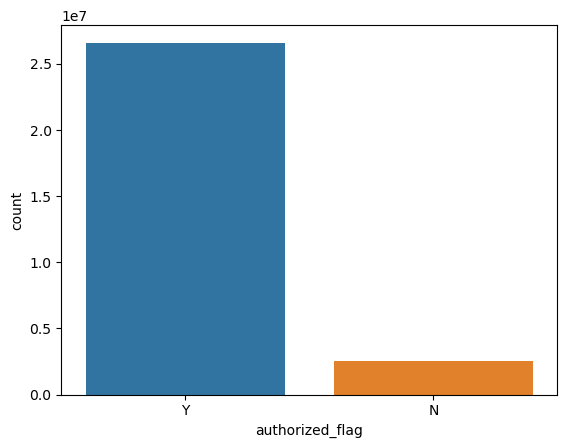

In [ ]:
# use countplot to indicates the number of transaction that approved (Y) and the number of transaction that denied (N)
sns.countplot(x="authorized_flag",data=historical_transactions)

from this plot we detect that the number of transcations that  denied is very small according to the number of transcations that accepted

**historical transactions.csv contains up to 3 months worth of transactions for every card at any of the provided merchant ids**

- get summary of statistical properites of historical transactions.csv

In [ ]:
historical_transactions.describe()

city_id  installments  merchant_category_id     month_lag   
count  2.911236e+07  2.911236e+07          2.911236e+07  2.911236e+07  \
mean   1.293256e+02  6.484954e-01          4.810130e+02 -4.487294e+00   
std    1.042563e+02  2.795577e+00          2.493757e+02  3.588800e+00   
min   -1.000000e+00 -1.000000e+00         -1.000000e+00 -1.300000e+01   
25%    5.300000e+01  0.000000e+00          3.070000e+02 -7.000000e+00   
50%    9.000000e+01  0.000000e+00          4.540000e+02 -4.000000e+00   
75%    2.120000e+02  1.000000e+00          7.050000e+02 -2.000000e+00   
max    3.470000e+02  9.990000e+02          8.910000e+02  0.000000e+00   

       purchase_amount    category_2      state_id  subsector_id  
count     2.911236e+07  2.645950e+07  2.911236e+07  2.911236e+07  
mean      3.640090e-02  2.194578e+00  1.056679e+01  2.684839e+01  
std       1.123522e+03  1.531896e+00  6.366927e+00  9.692793e+00  
min      -7.469078e-01  1.000000e+00 -1.000000e+00 -1.000000e+00  
25%      -7.203559e-01  1.000000e+00  9.000000e+00  1.900000e+01  
50%      -6.883495e-01  1.000000e+00  9.000000e+00  2.900000e+01  
75%      -6.032543e-01  3.000000e+00  1.600000e+01  3.400000e+01  
max       6.010604e+06  5.000000e+00  2.400000e+01  4.100000e+01

1- 'count' : describe the number of non-empty values for each column

2- 'mean' : the average value in each column

3- 'std ' : the spreed of data

4- min : the minimum value in column

5- max : the maximum value in column

6- 25% : the 25th percentile of values in column

7- 50% :the 50th percentile of values in column  (called median)

8- 75% : the 75th percentile of values in column

In [ ]:
# explore historical transactions using .info() to know  the datatypes for each feature and the number of entries
historical_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   authorized_flag       object 
 1   card_id               object 
 2   city_id               int64  
 3   category_1            object 
 4   installments          int64  
 5   category_3            object 
 6   merchant_category_id  int64  
 7   merchant_id           object 
 8   month_lag             int64  
 9   purchase_amount       float64
 10  purchase_date         object 
 11  category_2            float64
 12  state_id              int64  
 13  subsector_id          int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 3.0+ GB


In [ ]:
# explore historical transactions file
historical_transactions.head()

authorized_flag          card_id  city_id category_1  installments   
0               Y  C_ID_4e6213e9bc       88          N             0  \
1               Y  C_ID_4e6213e9bc       88          N             0   
2               Y  C_ID_4e6213e9bc       88          N             0   
3               Y  C_ID_4e6213e9bc       88          N             0   
4               Y  C_ID_4e6213e9bc       88          N             0   

  category_3  merchant_category_id      merchant_id  month_lag   
0          A                    80  M_ID_e020e9b302         -8  \
1          A                   367  M_ID_86ec983688         -7   
2          A                    80  M_ID_979ed661fc         -6   
3          A                   560  M_ID_e6d5ae8ea6         -5   
4          A                    80  M_ID_e020e9b302        -11   

   purchase_amount        purchase_date  category_2  state_id  subsector_id  
0        -0.703331  2017-06-25 15:33:07         1.0        16            37  
1        -0.733128  2017-07-15 12:10:45         1.0        16            16  
2        -0.720386  2017-08-09 22:04:29         1.0        16            37  
3        -0.735352  2017-09-02 10:06:26         1.0        16            34  
4        -0.722865  2017-03-10 01:14:19         1.0        16            37

In [ ]:
# Count the number of negative numbers and positive number in installments in historical transactions
negative_count = len(historical_transactions[historical_transactions['installments'] < 0])
postive_count = len(historical_transactions[historical_transactions['installments'] > 0])
# Print the count
print('Number of negative numbers:', negative_count)
print('Number of positive numbers:', postive_count)

Number of negative numbers: 178159
Number of positive numbers: 13522455


A negative numbers  may represent missing information , so that i will replace negative value with (0) in preprocessing on data

**Explore new merchant transactions**

In [ ]:
# explore new merchant transactions file and show a part of table
new_merchant_transactions.head()

authorized_flag          card_id  city_id category_1  installments   
0               Y  C_ID_415bb3a509      107          N             1  \
1               Y  C_ID_415bb3a509      140          N             1   
2               Y  C_ID_415bb3a509      330          N             1   
3               Y  C_ID_415bb3a509       -1          Y             1   
4               Y  C_ID_ef55cf8d4b       -1          Y             1   

  category_3  merchant_category_id      merchant_id  month_lag   
0          B                   307  M_ID_b0c793002c          1  \
1          B                   307  M_ID_88920c89e8          1   
2          B                   507  M_ID_ad5237ef6b          2   
3          B                   661  M_ID_9e84cda3b1          1   
4          B                   166  M_ID_3c86fa3831          1   

   purchase_amount        purchase_date  category_2  state_id  subsector_id  
0        -0.557574  2018-03-11 14:57:36         1.0         9            19  
1        -0.569580  2018-03-19 18:53:37         1.0         9            19  
2        -0.551037  2018-04-26 14:08:44         1.0         9            14  
3        -0.671925  2018-03-07 09:43:21         NaN        -1             8  
4        -0.659904  2018-03-22 21:07:53         NaN        -1            29

**new merchant transactions.csv contains the transactions at new merchants**

- get summary of statistical properites of new merchant transactions.csv

In [ ]:
new_merchant_transactions.describe()

city_id  installments  merchant_category_id     month_lag   
count  1.963031e+06  1.963031e+06          1.963031e+06  1.963031e+06  \
mean   1.343867e+02  6.829643e-01          4.309701e+02  1.476515e+00   
std    1.015152e+02  1.584069e+00          2.463385e+02  4.994483e-01   
min   -1.000000e+00 -1.000000e+00         -1.000000e+00  1.000000e+00   
25%    6.900000e+01  0.000000e+00          2.780000e+02  1.000000e+00   
50%    1.100000e+02  1.000000e+00          3.670000e+02  1.000000e+00   
75%    2.120000e+02  1.000000e+00          6.830000e+02  2.000000e+00   
max    3.470000e+02  9.990000e+02          8.910000e+02  2.000000e+00   

       purchase_amount    category_2      state_id  subsector_id  
count     1.963031e+06  1.851286e+06  1.963031e+06  1.963031e+06  
mean     -5.509690e-01  2.197841e+00  1.088067e+01  2.597624e+01  
std       6.940043e-01  1.528125e+00  6.038542e+00  1.012908e+01  
min      -7.468928e-01  1.000000e+00 -1.000000e+00 -1.000000e+00  
25%      -7.166294e-01  1.000000e+00  9.000000e+00  1.900000e+01  
50%      -6.748406e-01  1.000000e+00  9.000000e+00  2.900000e+01  
75%      -5.816162e-01  3.000000e+00  1.500000e+01  3.400000e+01  
max       2.631575e+02  5.000000e+00  2.400000e+01  4.100000e+01

In [ ]:
# explore new merchant transactions file using .info() to know  the datatypes for each feature and the number of entries
new_merchant_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963031 entries, 0 to 1963030
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   authorized_flag       object 
 1   card_id               object 
 2   city_id               int64  
 3   category_1            object 
 4   installments          int64  
 5   category_3            object 
 6   merchant_category_id  int64  
 7   merchant_id           object 
 8   month_lag             int64  
 9   purchase_amount       float64
 10  purchase_date         object 
 11  category_2            float64
 12  state_id              int64  
 13  subsector_id          int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 209.7+ MB


In [ ]:
# explore new merchant transactions file
new_merchant_transactions.head()

authorized_flag          card_id  city_id category_1  installments   
0               Y  C_ID_415bb3a509      107          N             1  \
1               Y  C_ID_415bb3a509      140          N             1   
2               Y  C_ID_415bb3a509      330          N             1   
3               Y  C_ID_415bb3a509       -1          Y             1   
4               Y  C_ID_ef55cf8d4b       -1          Y             1   

  category_3  merchant_category_id      merchant_id  month_lag   
0          B                   307  M_ID_b0c793002c          1  \
1          B                   307  M_ID_88920c89e8          1   
2          B                   507  M_ID_ad5237ef6b          2   
3          B                   661  M_ID_9e84cda3b1          1   
4          B                   166  M_ID_3c86fa3831          1   

   purchase_amount        purchase_date  category_2  state_id  subsector_id  
0        -0.557574  2018-03-11 14:57:36         1.0         9            19  
1        -0.569580  2018-03-19 18:53:37         1.0         9            19  
2        -0.551037  2018-04-26 14:08:44         1.0         9            14  
3        -0.671925  2018-03-07 09:43:21         NaN        -1             8  
4        -0.659904  2018-03-22 21:07:53         NaN        -1            29

In [ ]:
# Count the number of negative numbers and positive number in installments in new merchant transactions
negative_count = len(new_merchant_transactions[new_merchant_transactions['installments'] < 0])
postive_count = len(new_merchant_transactions[new_merchant_transactions['installments'] > 0])
# Print the count
print('Number of negative numbers:', negative_count)
print('Number of positive numbers:', postive_count)

Number of negative numbers: 55922
Number of positive numbers: 984865


A negative number may represent missing information , so that i will replace negative value with (0) in preprocessing

**Notice**

 the previous two table have the same features so that, I will make concatination between two tables vertically

**Explore userscore**

In [ ]:
# explore userscore file and show a part of table
userscore.head()

card_id first_active_month  feature_1  feature_2  feature_3   
0  C_ID_92a2005557             Jun-17          5          2          1  \
1  C_ID_3d0044924f             Jan-17          4          1          0   
2  C_ID_d639edf6cd             Aug-16          2          2          0   
3  C_ID_186d6a6901             Sep-17          4          3          0   
4  C_ID_cdbd2c0db2             Nov-17          1          3          0   

      score  
0 -0.820283  
1  0.392913  
2  0.688056  
3  0.142495  
4 -0.159749

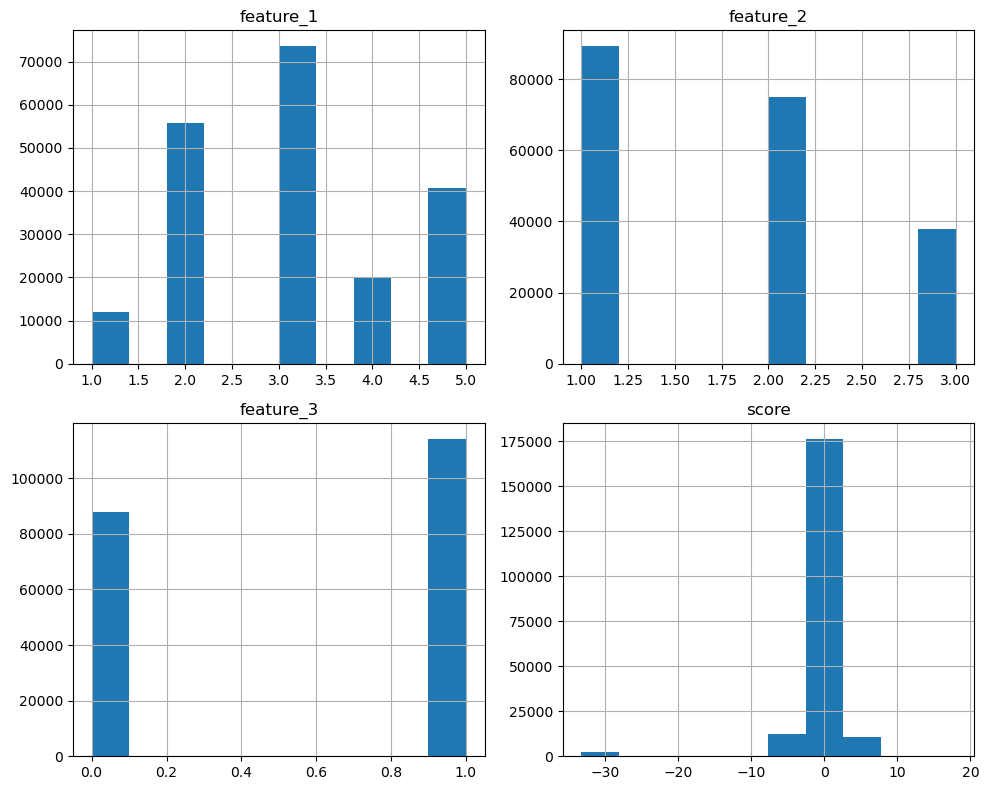

In [ ]:
# Histograms of numerical columns
userscore.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [ ]:
# get the range of score
print("the minumun number in score is ", np.min(userscore["score"]))
print("the maxiumum number in score is ", np.max(userscore["score"]))

the minumun number in score is  -33.21928095
the maxiumum number in score is  17.9650684


In [ ]:
# Count the number of negative numbers and positive number in score
postive_count_score = len(userscore[userscore['score'] > 0])
negative_count_score = len(userscore[userscore['score'] < 0])
equalzero_count_score = len(userscore[userscore['score'] == 0])
# Print the count
print('Number of negative numbers:', negative_count_score)
print('Number of positive numbers:', postive_count_score)
print(equalzero_count_score)

Number of negative numbers: 102678
Number of positive numbers: 97609
1630


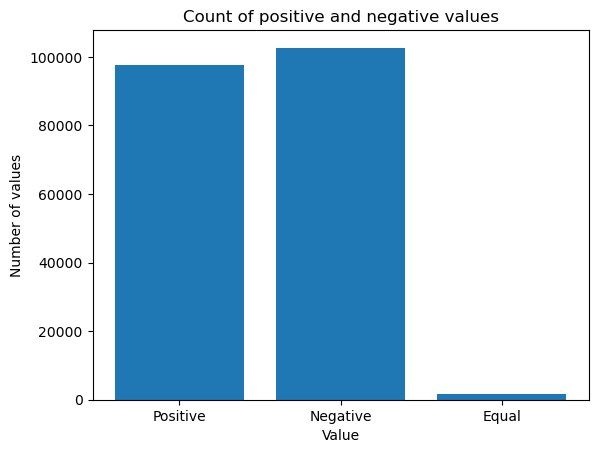

In [ ]:
# Plot the count of "Positive", "Negative" and "Equal" in userscore table
plt.bar(["Positive", "Negative","Equal"], [postive_count_score, negative_count_score,equalzero_count_score])
plt.xlabel("Value")
plt.ylabel("Number of values")
plt.title("Count of positive and negative values")
plt.show()

negative score may represent the client is a bad client , because may not use the the card

**userscore.csv contains information about card and the score of each card**

- get summary of statistical properites of userscore.csv

In [ ]:
userscore.describe()

feature_1      feature_2      feature_3          score
count  201917.000000  201917.000000  201917.000000  201917.000000
mean        3.105311       1.745410       0.565569      -0.393636
std         1.186160       0.751362       0.495683       3.850500
min         1.000000       1.000000       0.000000     -33.219281
25%         2.000000       1.000000       0.000000      -0.883110
50%         3.000000       2.000000       1.000000      -0.023437
75%         4.000000       2.000000       1.000000       0.765453
max         5.000000       3.000000       1.000000      17.965068

In [ ]:
# explore userscore file using .info() to know  the datatypes for each features and the number of entries
userscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   card_id             201917 non-null  object 
 1   first_active_month  201917 non-null  object 
 2   feature_1           201917 non-null  int64  
 3   feature_2           201917 non-null  int64  
 4   feature_3           201917 non-null  int64  
 5   score               201917 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ MB


In [ ]:
# explore userscore file
userscore.head()

card_id first_active_month  feature_1  feature_2  feature_3   
0  C_ID_92a2005557             Jun-17          5          2          1  \
1  C_ID_3d0044924f             Jan-17          4          1          0   
2  C_ID_d639edf6cd             Aug-16          2          2          0   
3  C_ID_186d6a6901             Sep-17          4          3          0   
4  C_ID_cdbd2c0db2             Nov-17          1          3          0   

      score  
0 -0.820283  
1  0.392913  
2  0.688056  
3  0.142495  
4 -0.159749

**I will Merge userscore table with the result of concating  historical transactions file  and new merchant transactions file**

**Explore merchants**

In [ ]:
# explore merchants file
merchants.head()

merchant_id  merchant_group_id  merchant_category_id  subsector_id   
0  M_ID_838061e48c               8353                   792             9  \
1  M_ID_9339d880ad               3184                   840            20   
2  M_ID_e726bbae1e                447                   690             1   
3  M_ID_a70e9c5f81               5026                   792             9   
4  M_ID_64456c37ce               2228                   222            21   

   numerical_1  numerical_2 category_1 most_recent_sales_range   
0    -0.057471    -0.057471          N                       E  \
1    -0.057471    -0.057471          N                       E   
2    -0.057471    -0.057471          N                       E   
3    -0.057471    -0.057471          Y                       E   
4    -0.057471    -0.057471          Y                       E   

  most_recent_purchases_range  avg_sales_lag3  ...  avg_sales_lag6   
0                           E           -0.40  ...           -2.25  \
1                           E           -0.72  ...           -0.74   
2                           E          -82.13  ...          -82.13   
3                           E             NaN  ...             NaN   
4                           E             NaN  ...             NaN   

   avg_purchases_lag6  active_months_lag6  avg_sales_lag12   
0           18.666667                   6            -2.32  \
1            1.291667                   6            -0.57   
2          260.000000                   2           -82.13   
3            4.666667                   6              NaN   
4            0.361111                   6              NaN   

   avg_purchases_lag12  active_months_lag12  category_4  city_id state_id   
0            13.916667                   12           N      242        9  \
1             1.687500                   12           N       22       16   
2           260.000000                    2           N       -1        5   
3             3.833333                   12           Y       -1       -1   
4             0.347222                   12           Y       -1       -1   

   category_2  
0         1.0  
1         1.0  
2         5.0  
3         NaN  
4         NaN  

[5 rows x 22 columns]

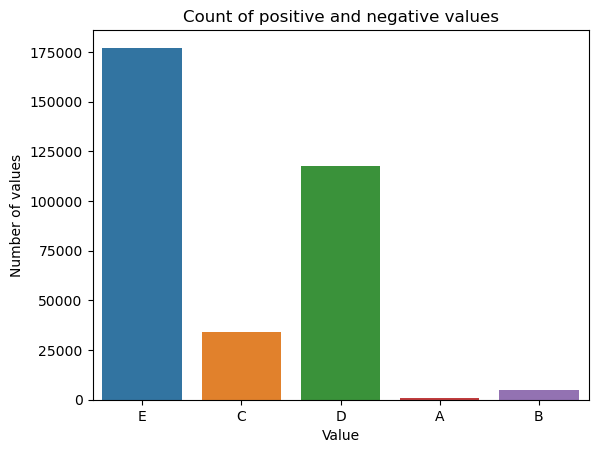

In [ ]:
# Plot the count of each category in most_recent_sales_range
sns.countplot(x="most_recent_sales_range",data=merchants)
plt.xlabel("Value")
plt.ylabel("Number of values")
plt.title("Count of positive and negative values")
plt.show()

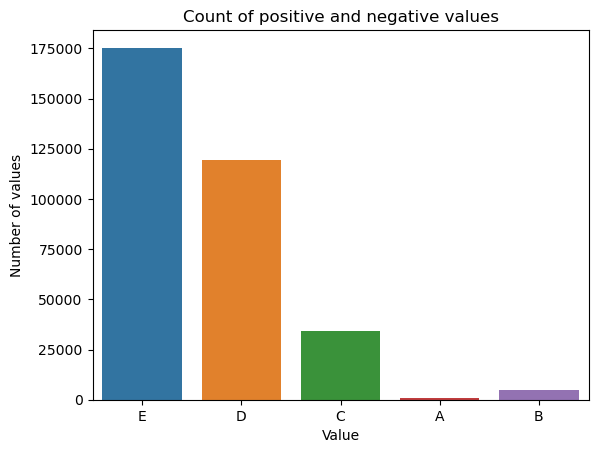

In [ ]:
# Plot the count of each category in most_recent_purchases_range
sns.countplot(x="most_recent_purchases_range",data=merchants)
plt.xlabel("Value")
plt.ylabel("Number of values")
plt.title("Count of positive and negative values")
plt.show()

category "most_recent_sales_range",category "most_recent_purchases_range" have a small values of categorical (A) ,(B)

**merchants.csv contains aggregate information for each merchant id**

- get summary of statistical properites of merchants.csv

In [ ]:
merchants.describe()

merchant_group_id  merchant_category_id   subsector_id    numerical_1   
count      334696.000000         334696.000000  334696.000000  334696.000000  \
mean        31028.736143            423.131663      25.116404       0.011476   
std         31623.043426            252.898046       9.807371       1.098154   
min             1.000000             -1.000000      -1.000000      -0.057471   
25%          3612.000000            222.000000      19.000000      -0.057471   
50%         19900.000000            373.000000      27.000000      -0.057471   
75%         51707.250000            683.000000      33.000000      -0.047556   
max        112586.000000            891.000000      41.000000     183.735111   

         numerical_2  avg_sales_lag3  avg_purchases_lag3  active_months_lag3   
count  334696.000000   334683.000000        3.346960e+05       334696.000000  \
mean        0.008103       13.832993                 inf            2.994108   
std         1.070497     2395.489999                 NaN            0.095247   
min        -0.057471      -82.130000        3.334953e-01            1.000000   
25%        -0.057471        0.880000        9.236499e-01            3.000000   
50%        -0.057471        1.000000        1.016667e+00            3.000000   
75%        -0.047556        1.160000        1.146522e+00            3.000000   
max       182.079322   851844.640000                 inf            3.000000   

       avg_sales_lag6  avg_purchases_lag6  active_months_lag6   
count    3.346830e+05        3.346960e+05       334696.000000  \
mean     2.165079e+01                 inf            5.947397   
std      3.947108e+03                 NaN            0.394936   
min     -8.213000e+01        1.670447e-01            1.000000   
25%      8.500000e-01        9.022475e-01            6.000000   
50%      1.010000e+00        1.026961e+00            6.000000   
75%      1.230000e+00        1.215575e+00            6.000000   
max      1.513959e+06                 inf            6.000000   

       avg_sales_lag12  avg_purchases_lag12  active_months_lag12   
count     3.346830e+05         3.346960e+05        334696.000000  \
mean      2.522771e+01                  inf            11.599335   
std       5.251842e+03                  NaN             1.520138   
min      -8.213000e+01         9.832954e-02             1.000000   
25%       8.500000e-01         8.983333e-01            12.000000   
50%       1.020000e+00         1.043361e+00            12.000000   
75%       1.290000e+00         1.266480e+00            12.000000   
max       2.567408e+06                  inf            12.000000   

             city_id       state_id     category_2  
count  334696.000000  334696.000000  322809.000000  
mean      102.917926      11.860942       2.380002  
std       107.090673       6.176889       1.562661  
min        -1.000000      -1.000000       1.000000  
25%        -1.000000       9.000000       1.000000  
50%        69.000000       9.000000       2.000000  
75%       182.000000      16.000000       4.000000  
max       347.000000      24.000000       5.000000

In [ ]:
# get the number of infinite number in merchants table
ds = merchants.isin([np.inf, -np.inf]).values.sum()
print(ds)

9


- merchants table contain infinite values(inf)that I will handle it in preprocessing

In [ ]:
# explore merchants file using .info() to know  the datatypes for each features and the number of entries
merchants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334696 entries, 0 to 334695
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   merchant_id                  334696 non-null  object 
 1   merchant_group_id            334696 non-null  int64  
 2   merchant_category_id         334696 non-null  int64  
 3   subsector_id                 334696 non-null  int64  
 4   numerical_1                  334696 non-null  float64
 5   numerical_2                  334696 non-null  float64
 6   category_1                   334696 non-null  object 
 7   most_recent_sales_range      334696 non-null  object 
 8   most_recent_purchases_range  334696 non-null  object 
 9   avg_sales_lag3               334683 non-null  float64
 10  avg_purchases_lag3           334696 non-null  float64
 11  active_months_lag3           334696 non-null  int64  
 12  avg_sales_lag6               334683 non-null  float64
 13 

In [ ]:
# explore merchants file and show a part of table
merchants.head()

merchant_id  merchant_group_id  merchant_category_id  subsector_id   
0  M_ID_838061e48c               8353                   792             9  \
1  M_ID_9339d880ad               3184                   840            20   
2  M_ID_e726bbae1e                447                   690             1   
3  M_ID_a70e9c5f81               5026                   792             9   
4  M_ID_64456c37ce               2228                   222            21   

   numerical_1  numerical_2 category_1 most_recent_sales_range   
0    -0.057471    -0.057471          N                       E  \
1    -0.057471    -0.057471          N                       E   
2    -0.057471    -0.057471          N                       E   
3    -0.057471    -0.057471          Y                       E   
4    -0.057471    -0.057471          Y                       E   

  most_recent_purchases_range  avg_sales_lag3  ...  avg_sales_lag6   
0                           E           -0.40  ...           -2.25  \
1                           E           -0.72  ...           -0.74   
2                           E          -82.13  ...          -82.13   
3                           E             NaN  ...             NaN   
4                           E             NaN  ...             NaN   

   avg_purchases_lag6  active_months_lag6  avg_sales_lag12   
0           18.666667                   6            -2.32  \
1            1.291667                   6            -0.57   
2          260.000000                   2           -82.13   
3            4.666667                   6              NaN   
4            0.361111                   6              NaN   

   avg_purchases_lag12  active_months_lag12  category_4  city_id state_id   
0            13.916667                   12           N      242        9  \
1             1.687500                   12           N       22       16   
2           260.000000                    2           N       -1        5   
3             3.833333                   12           Y       -1       -1   
4             0.347222                   12           Y       -1       -1   

   category_2  
0         1.0  
1         1.0  
2         5.0  
3         NaN  
4         NaN  

[5 rows x 22 columns]

**I will Merge merchants table with the result of joining historical transactions table and new merchant transactions table with userscore tabe**

**Strategy of merging**



- historical transactions table and new merchant transactions table  have the same features , so that I will concat two tables vertically
- I will Merge userscore with the result of joining historical transactions table and new merchant transactions table
- I will Merge merchants table with the result of joining historical transactions table and new merchant transactions table with userscore table


**get the missing value patterns, missing value mechanism for each table :**

**1- historical transactions table**

In [ ]:
# get the percentage of null value in each column
null_rates = (historical_transactions.isnull().sum() / historical_transactions.shape[0])*100
# Print the results
print(null_rates.apply(lambda x: f"{x:.2f}%"))

authorized_flag         0.00%
card_id                 0.00%
city_id                 0.00%
category_1              0.00%
installments            0.00%
category_3              0.61%
merchant_category_id    0.00%
merchant_id             0.48%
month_lag               0.00%
purchase_amount         0.00%
purchase_date           0.00%
category_2              9.11%
state_id                0.00%
subsector_id            0.00%
dtype: object


In [ ]:
historical_transactions.isnull().sum()

authorized_flag               0
card_id                       0
city_id                       0
category_1                    0
installments                  0
category_3               178159
merchant_category_id          0
merchant_id              138481
month_lag                     0
purchase_amount               0
purchase_date                 0
category_2              2652864
state_id                      0
subsector_id                  0
dtype: int64

- there are three features in historical transactions contain null values

<Axes: >

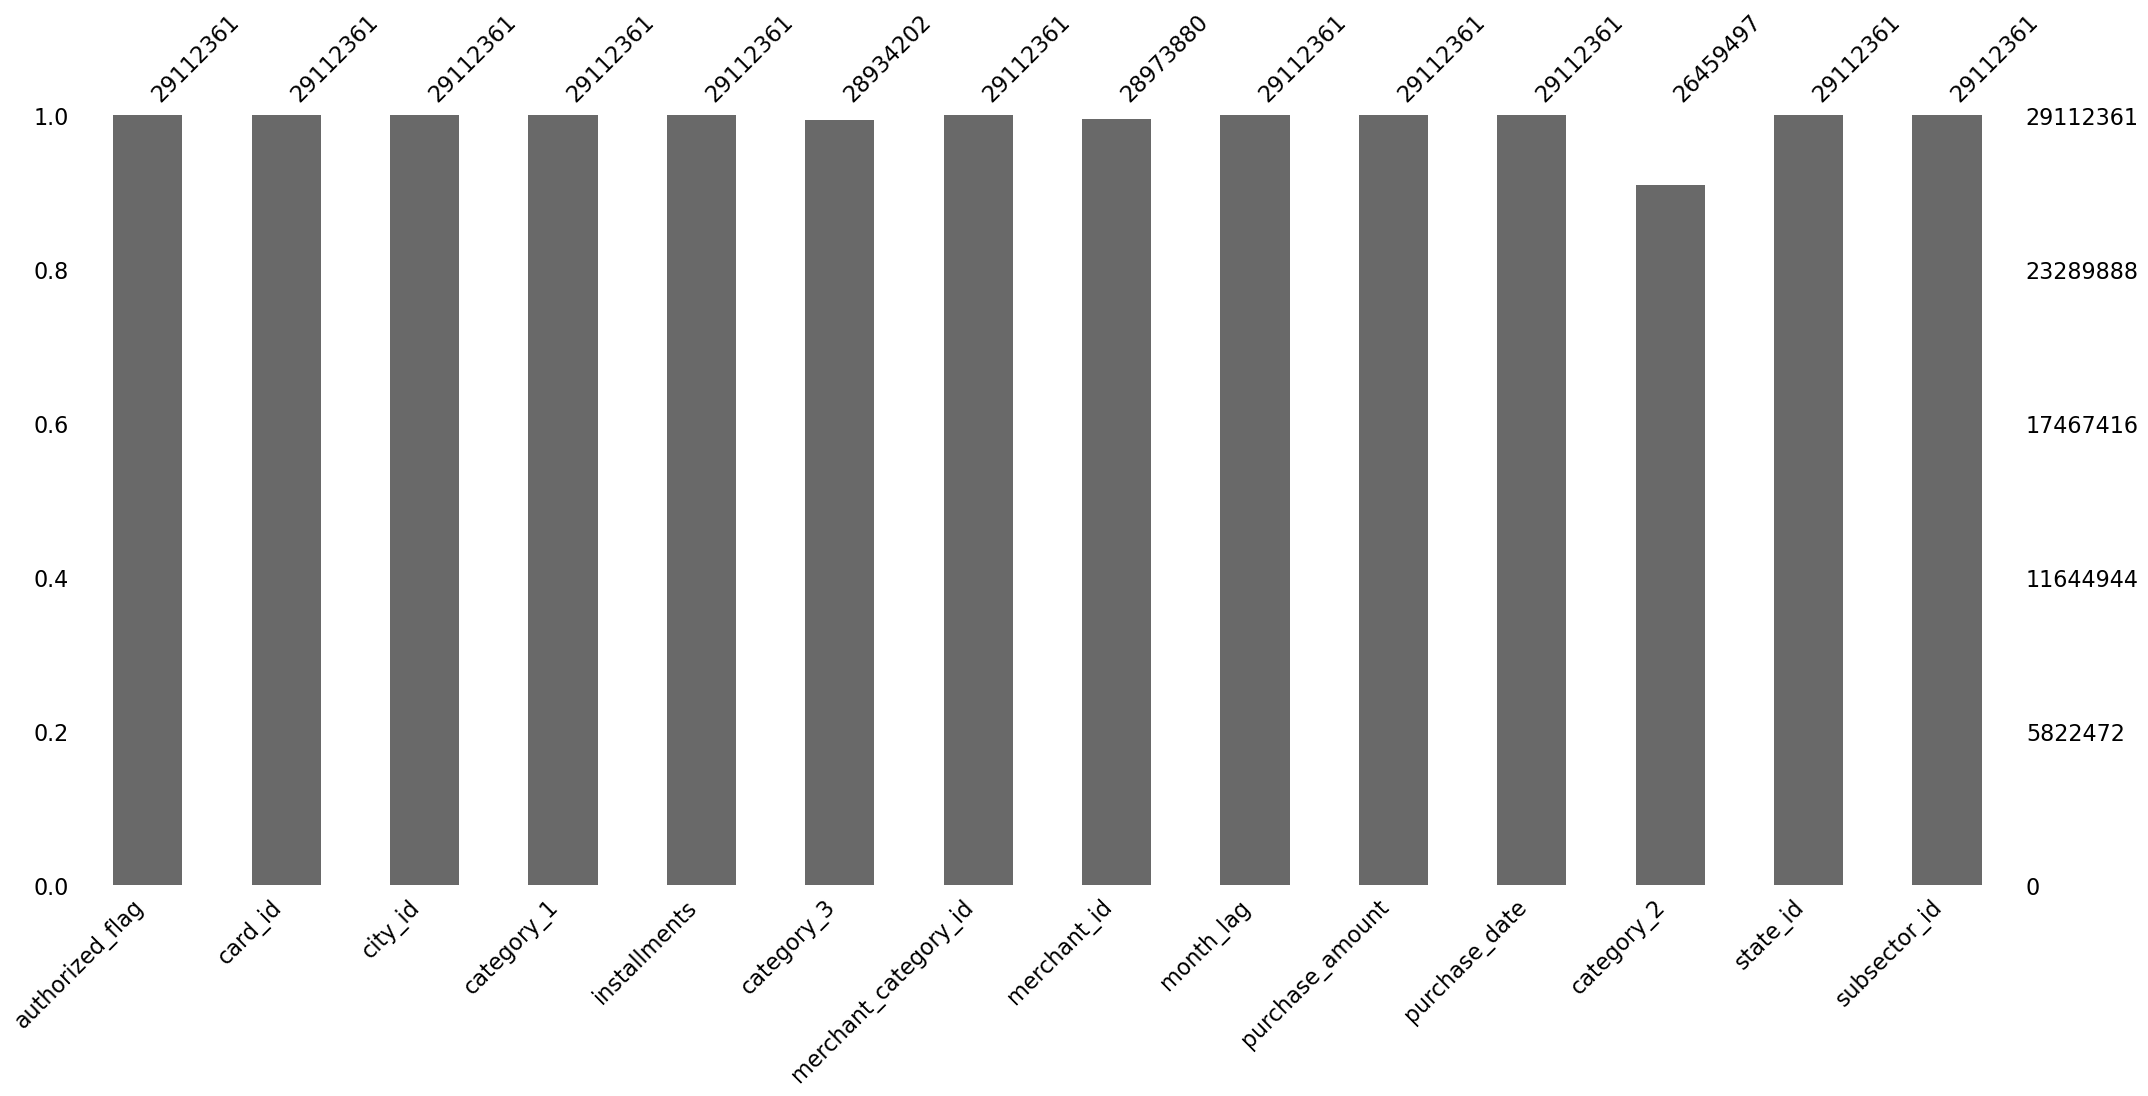

In [ ]:
import missingno as msno
msno.bar(historical_transactions)

<Axes: >

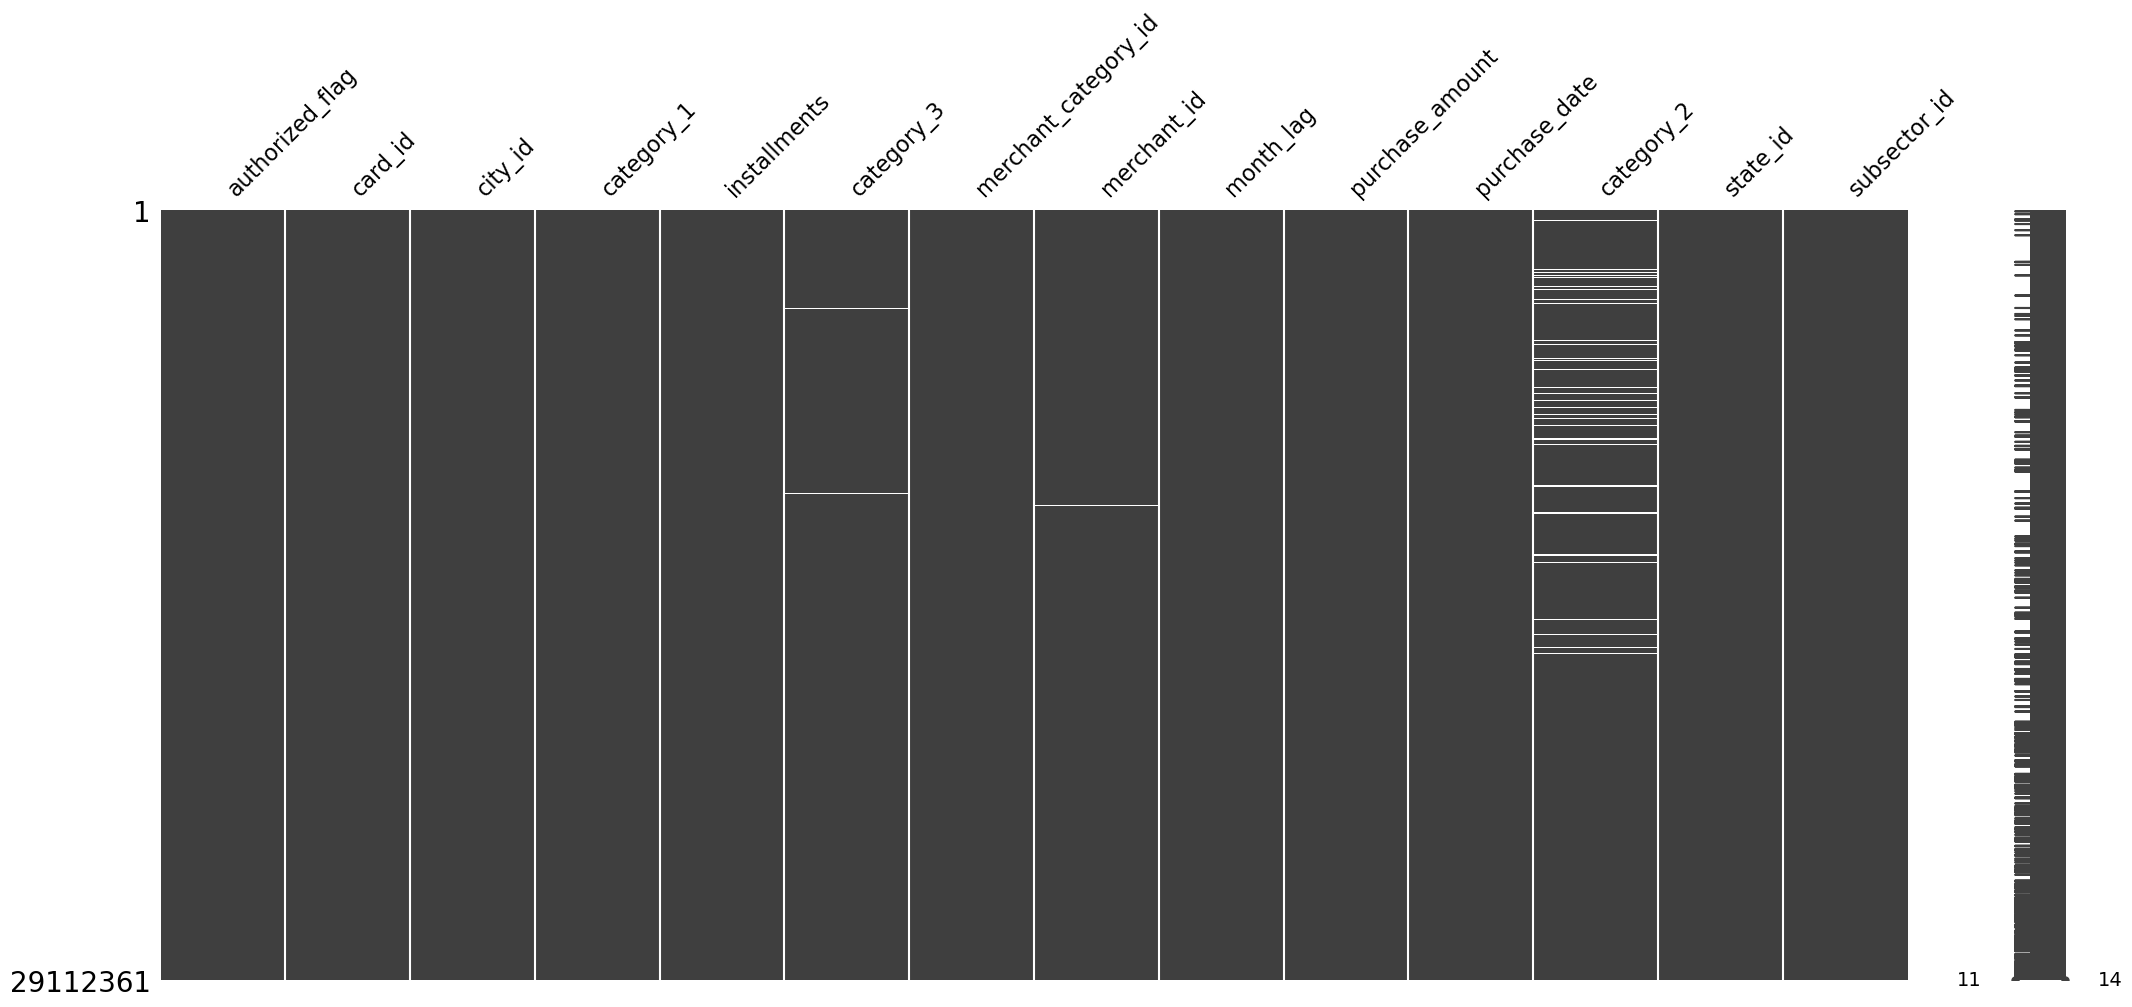

In [ ]:
# Create a heatmap of the null values in the columns
msno.matrix(historical_transactions)

based on msno.bar() function and msno.matrix() function we can detect the pattern and mechanism of three features 'category_2' and 'category_3' and 'merchant_id' , the pattern of three feature is  "General Pattern" and the mechanism of three feature is "MCAR" beacuse no pattern of null between any two features

**2-New merchant transactions table**

In [ ]:
# get the percentage of null value in each column
null_rates = (new_merchant_transactions.isnull().sum() / new_merchant_transactions.shape[0])*100
# Print the results
print(null_rates.apply(lambda x: f"{x:.2f}%"))

authorized_flag         0.00%
card_id                 0.00%
city_id                 0.00%
category_1              0.00%
installments            0.00%
category_3              2.85%
merchant_category_id    0.00%
merchant_id             1.34%
month_lag               0.00%
purchase_amount         0.00%
purchase_date           0.00%
category_2              5.69%
state_id                0.00%
subsector_id            0.00%
dtype: object


In [ ]:
new_merchant_transactions.isnull().sum()

authorized_flag              0
card_id                      0
city_id                      0
category_1                   0
installments                 0
category_3               55922
merchant_category_id         0
merchant_id              26216
month_lag                    0
purchase_amount              0
purchase_date                0
category_2              111745
state_id                     0
subsector_id                 0
dtype: int64

there are three features in new merchant transactions contain null values

<Axes: >

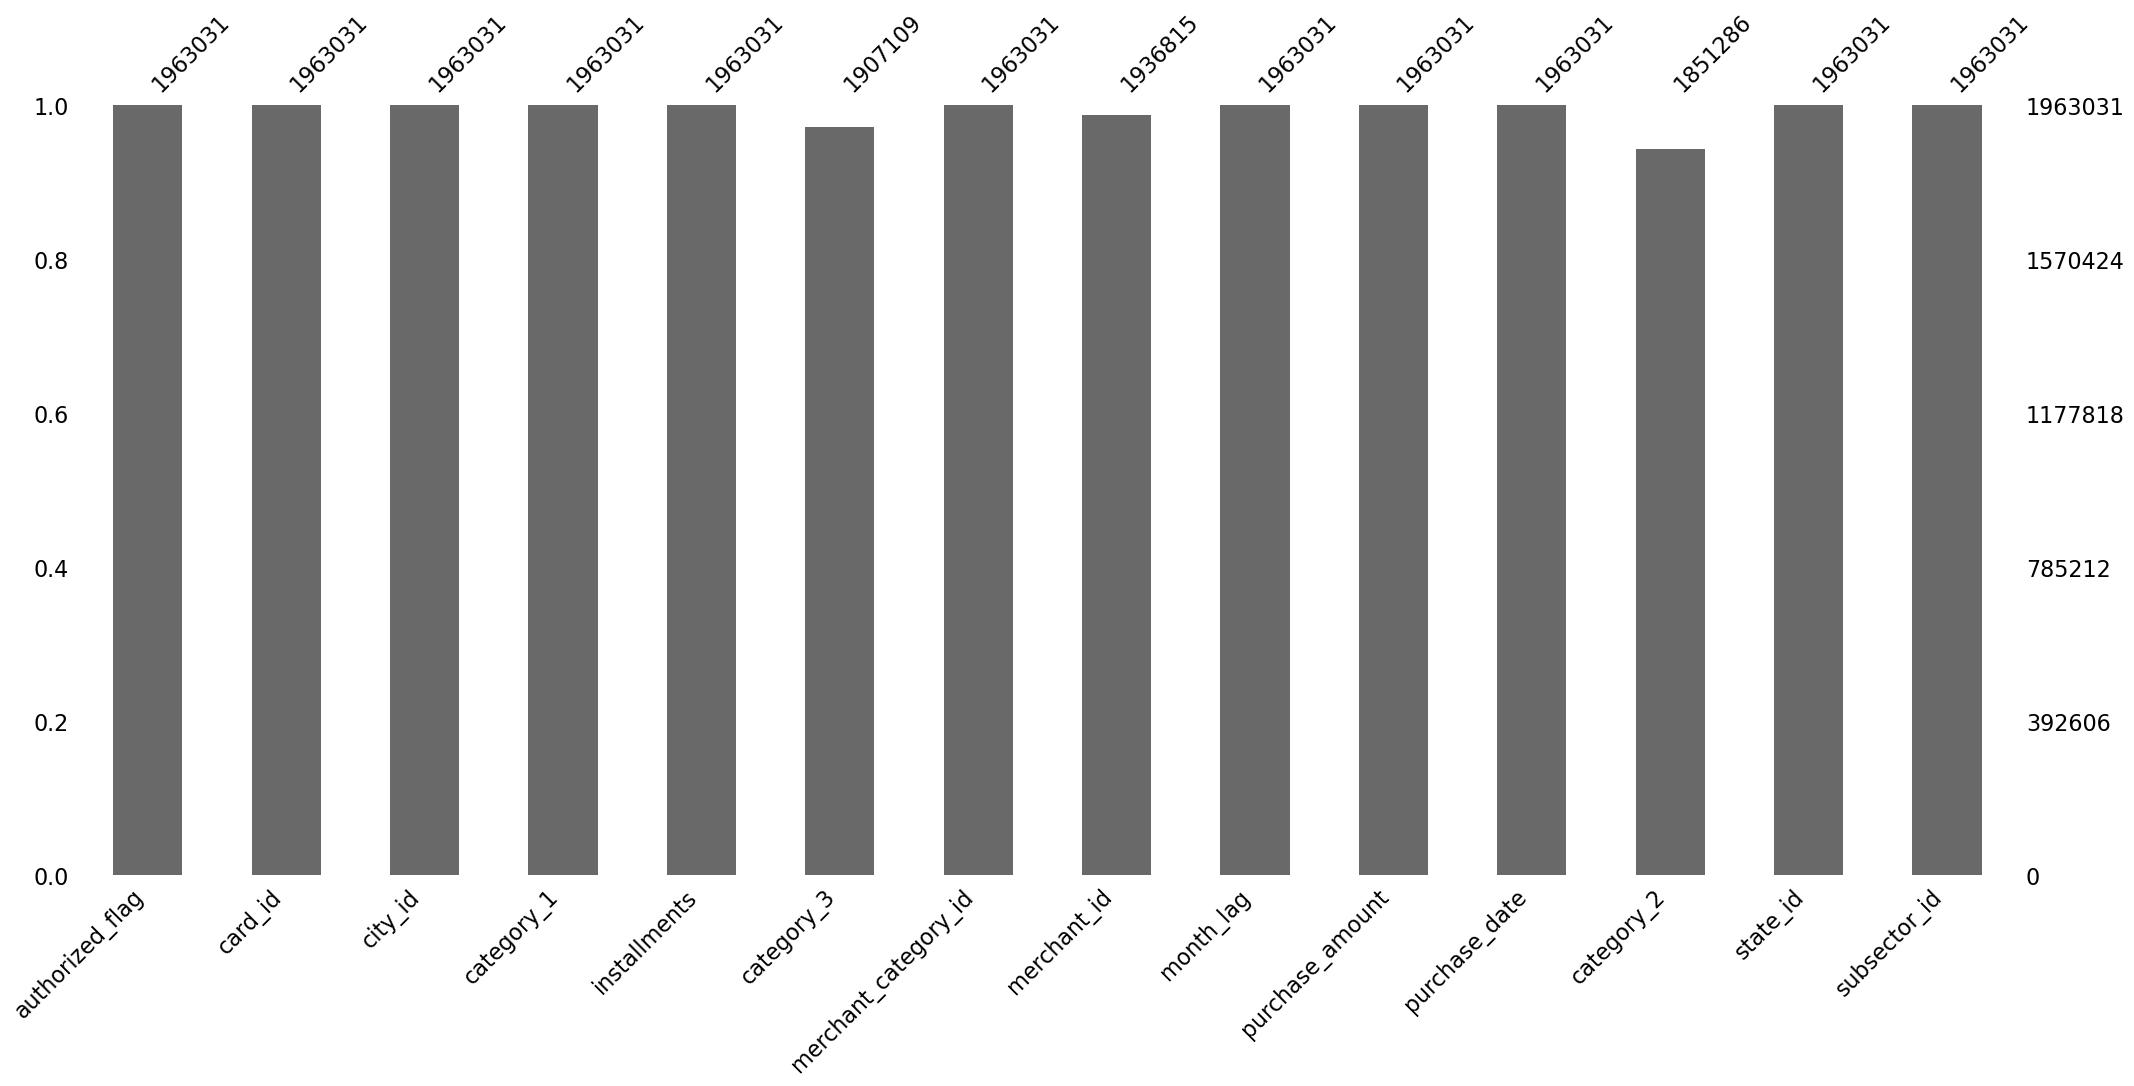

In [ ]:
import missingno as msno
msno.bar(new_merchant_transactions)

<Axes: >

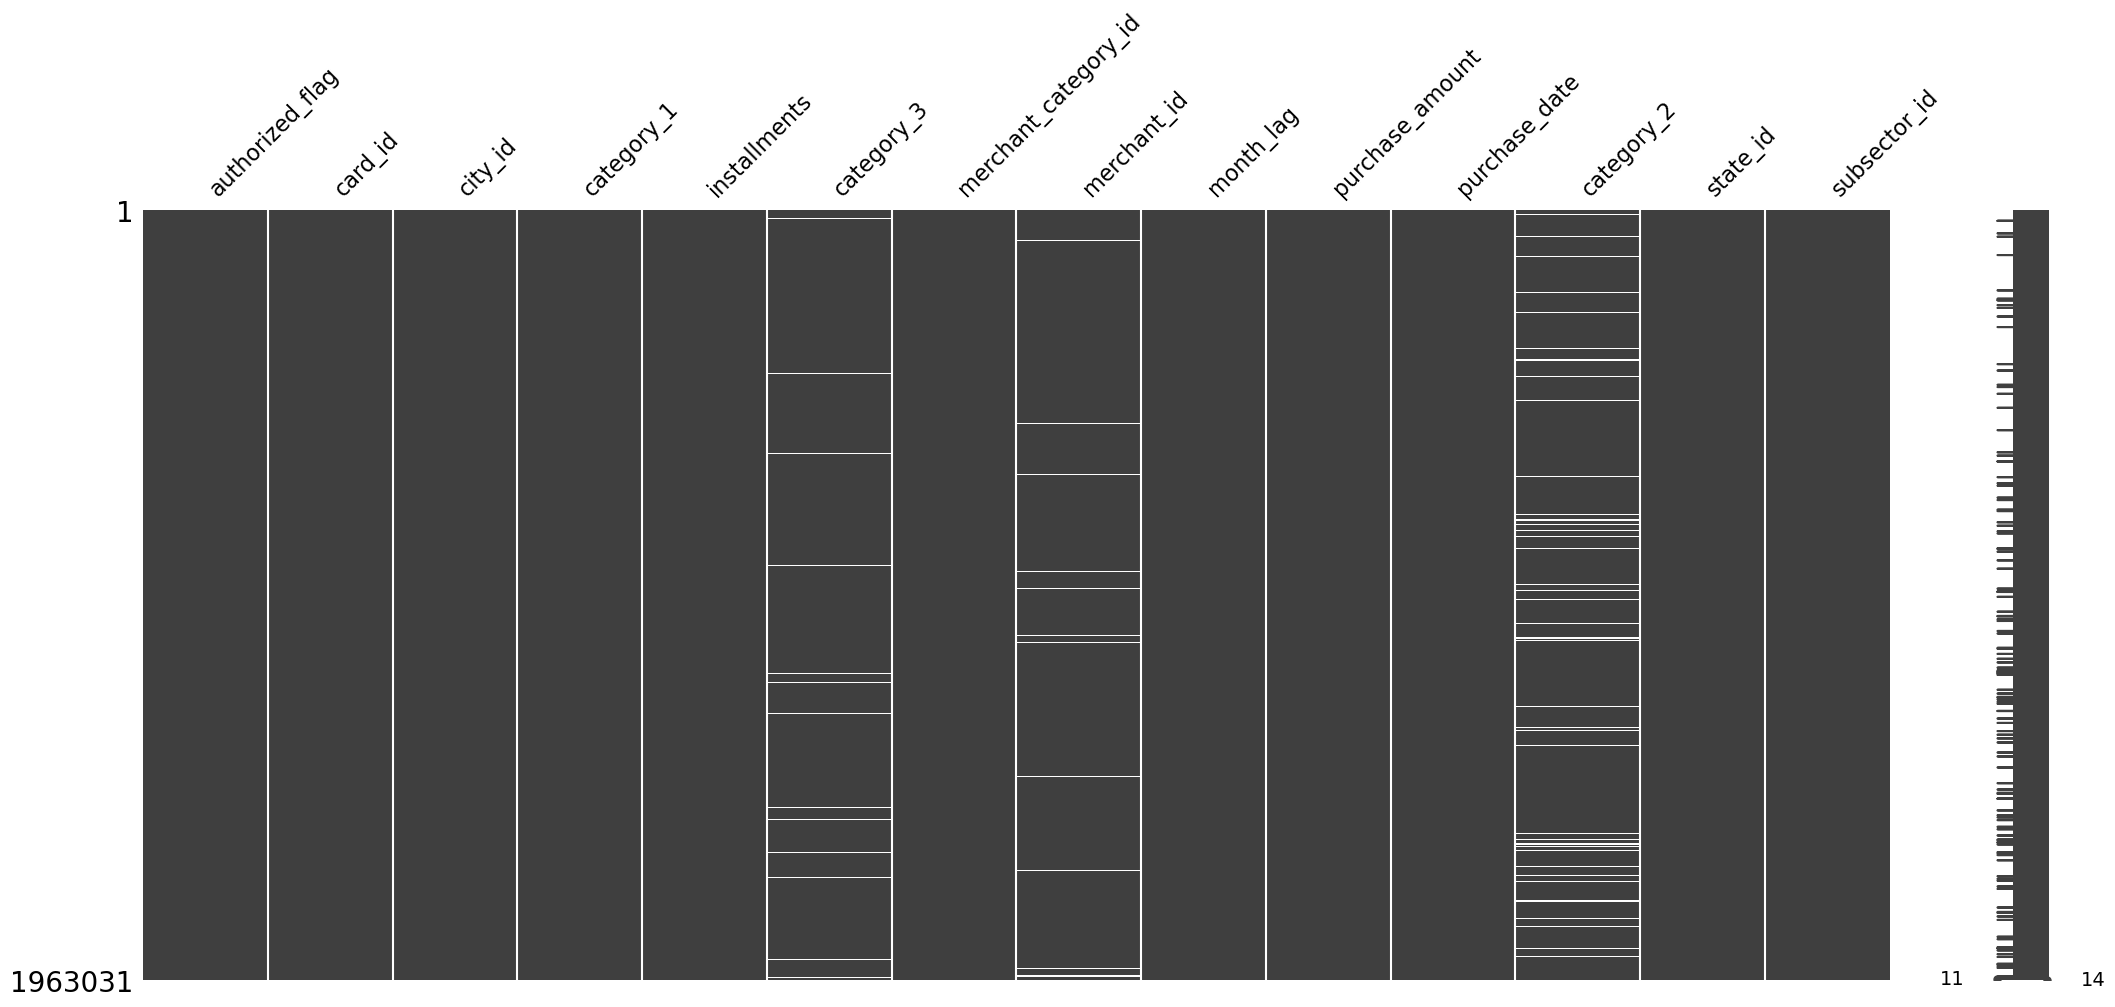

In [ ]:
# Create a heatmap of the null values in the columns
msno.matrix(new_merchant_transactions)

based on msno.bar() function and msno.matrix() function we can detect the pattern and mechanism of three features 'category_2_','category_3' and 'merchant_id', the pattern of three feature is "General Pattern"  and the mechanism of three feature is "MCAR" beacuse no pattern of null between any two features

**3-user score transactions table**

In [ ]:
# get the percentage of null value in each column
null_rates = (userscore.isnull().sum() / userscore.shape[0])*100
# Print the results
print(null_rates.apply(lambda x: f"{x:.2f}%"))

card_id               0.00%
first_active_month    0.00%
feature_1             0.00%
feature_2             0.00%
feature_3             0.00%
score                 0.00%
dtype: object


In [ ]:
userscore.isnull().sum()

card_id               0
first_active_month    0
feature_1             0
feature_2             0
feature_3             0
score                 0
dtype: int64

- there is no features contain null values

<Axes: >

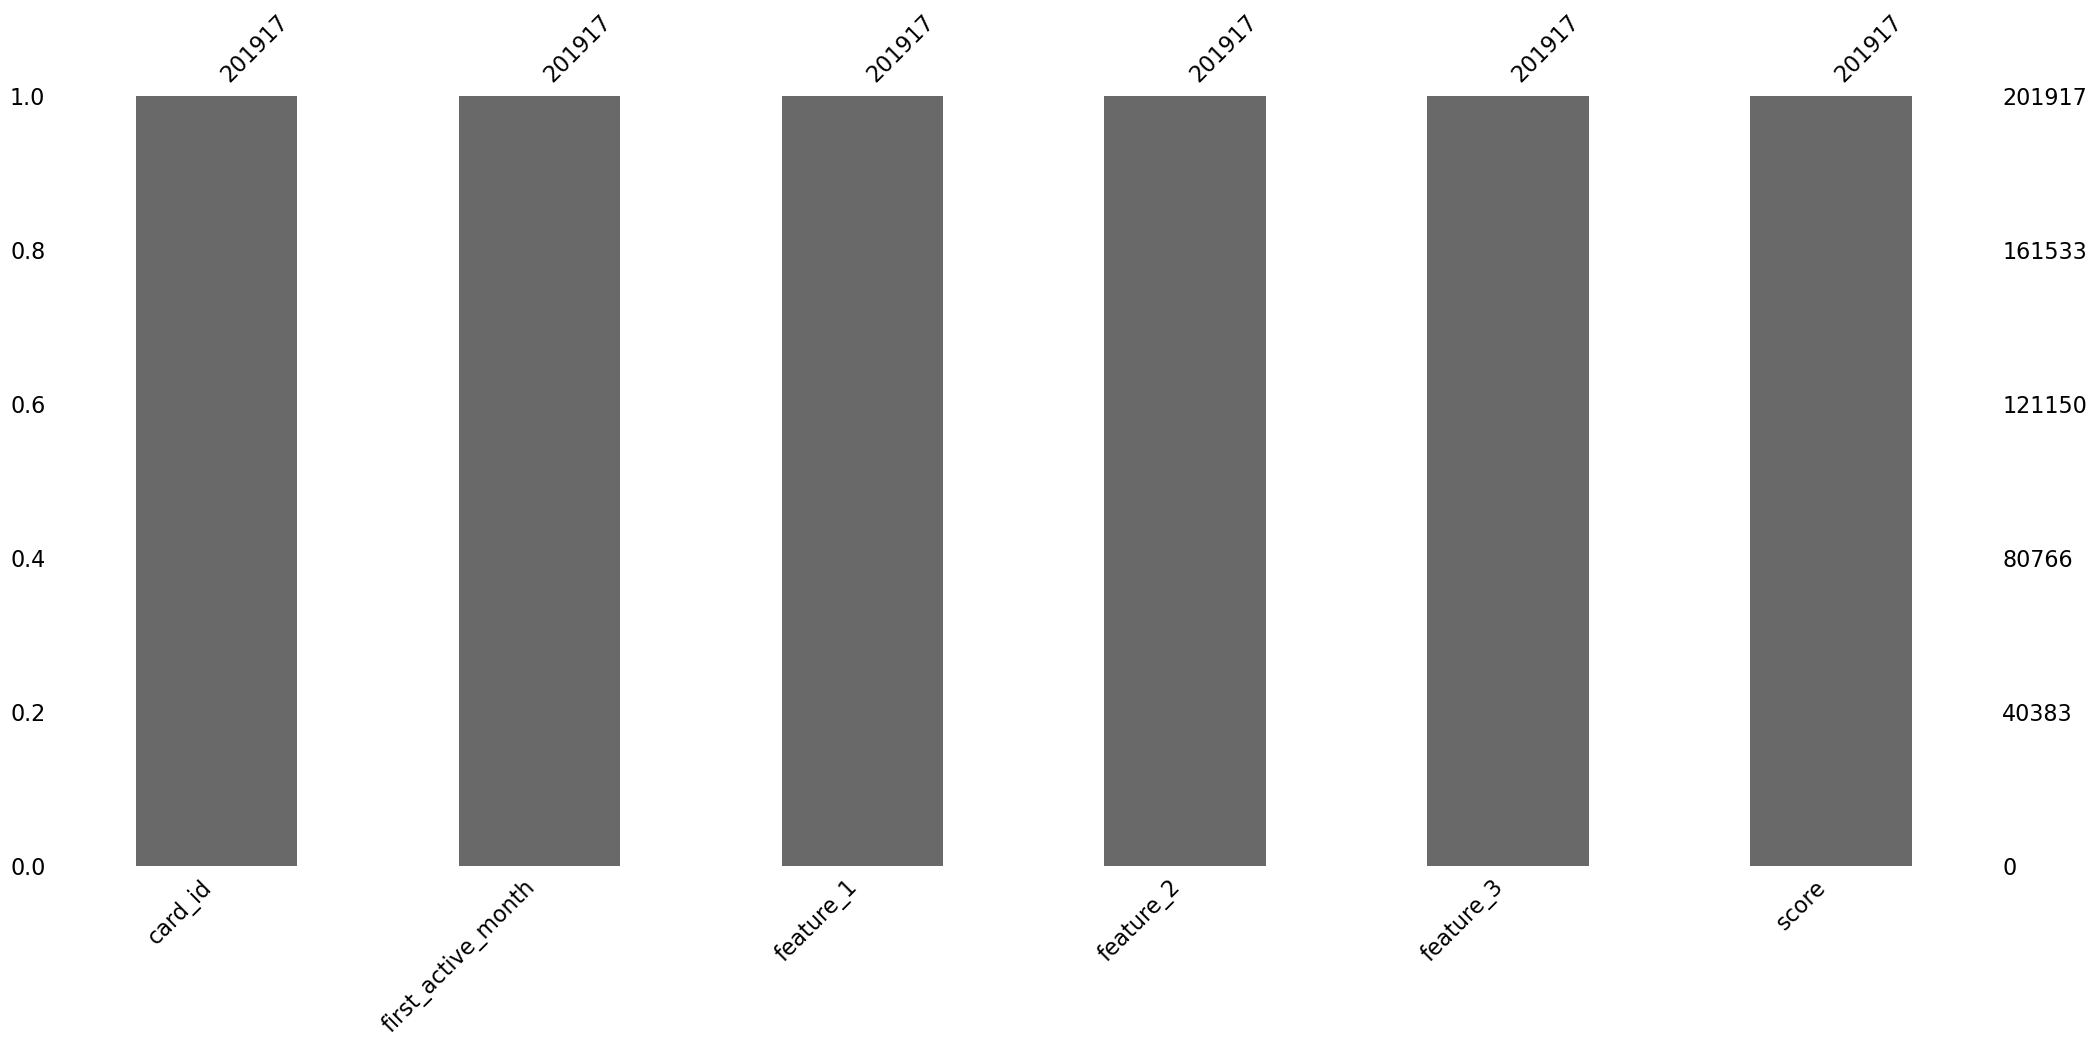

In [ ]:
import missingno as msno
msno.bar(userscore)

<Axes: >

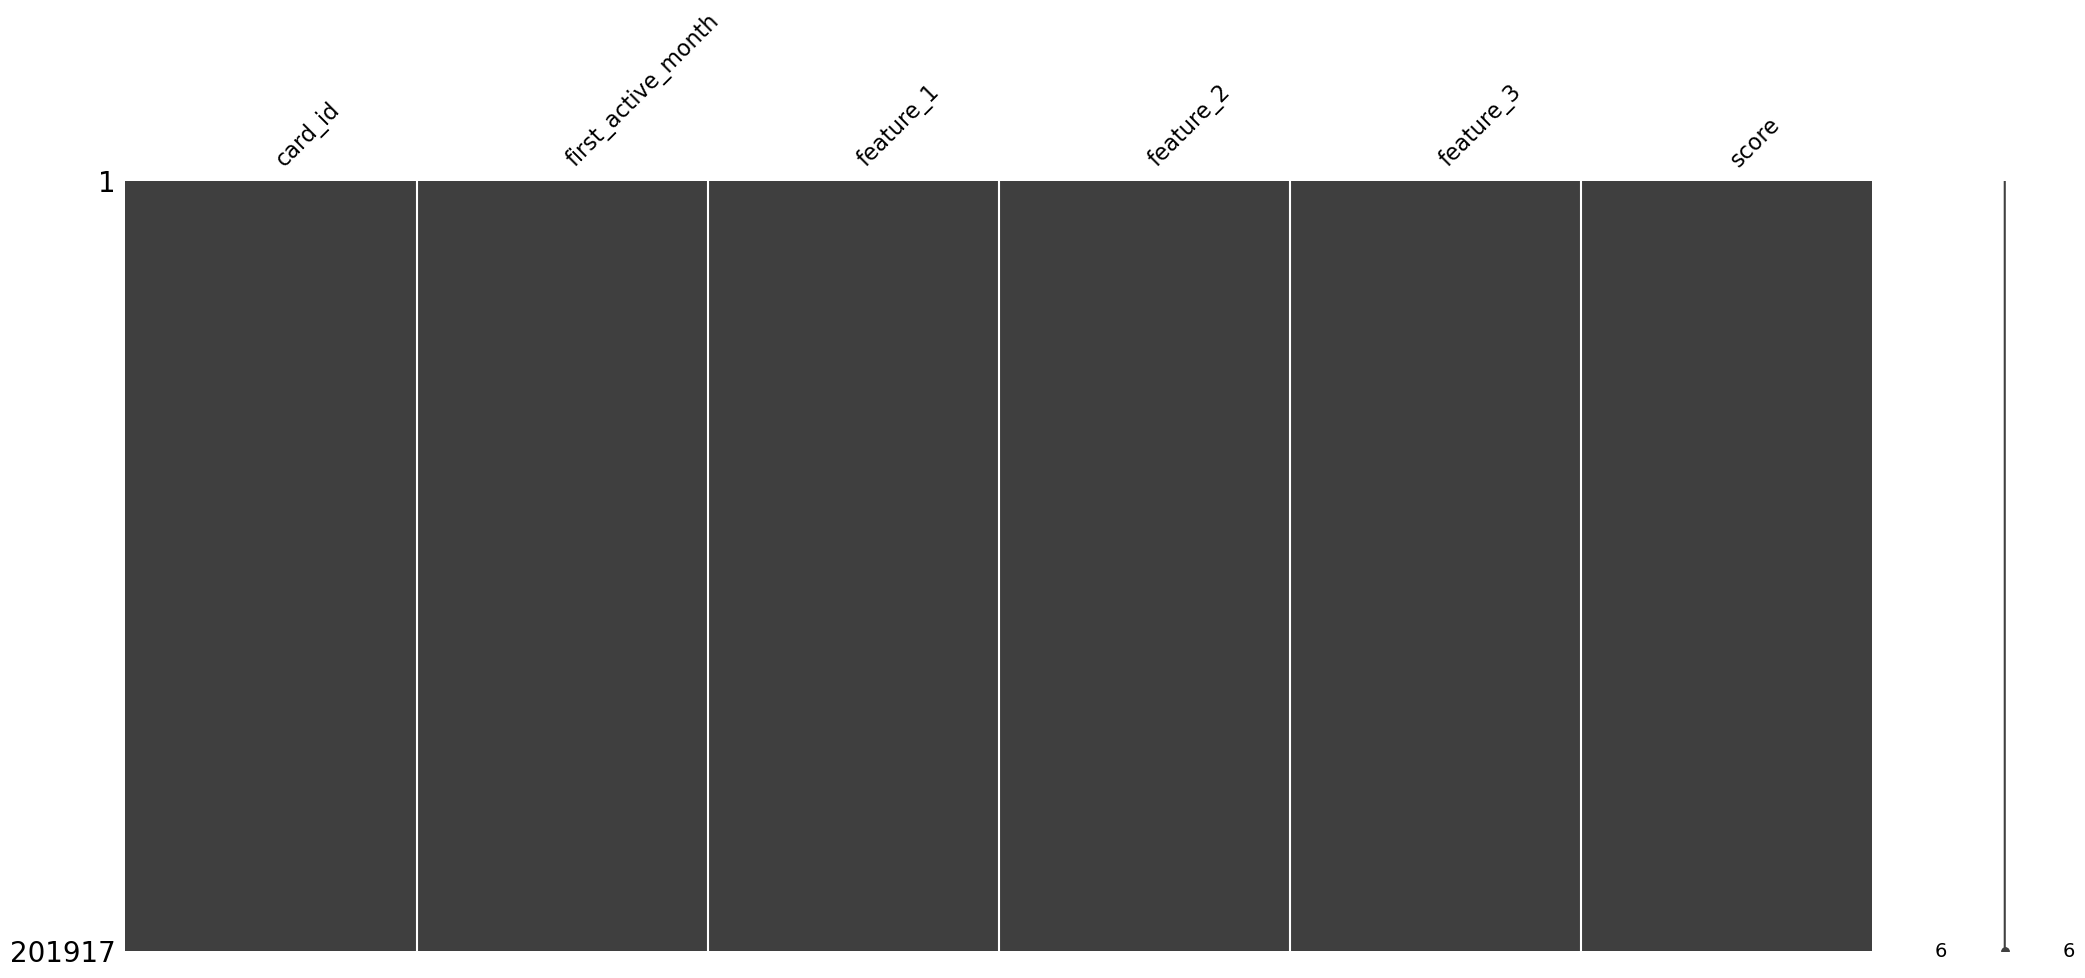

In [ ]:
# Create a heatmap of the null values in the columns
msno.matrix(userscore)

based on msno.bar() function and msno.matrix() function we cannot detect the pattern and mechanism of any features because no null data in all features in table

**4-merchants table**

In [ ]:
# get the percentage of null value in each column
null_rates = (merchants.isnull().sum() / merchants.shape[0])*100
# Print the results
print(null_rates.apply(lambda x: f"{x:.2f}%"))

merchant_id                    0.00%
merchant_group_id              0.00%
merchant_category_id           0.00%
subsector_id                   0.00%
numerical_1                    0.00%
numerical_2                    0.00%
category_1                     0.00%
most_recent_sales_range        0.00%
most_recent_purchases_range    0.00%
avg_sales_lag3                 0.00%
avg_purchases_lag3             0.00%
active_months_lag3             0.00%
avg_sales_lag6                 0.00%
avg_purchases_lag6             0.00%
active_months_lag6             0.00%
avg_sales_lag12                0.00%
avg_purchases_lag12            0.00%
active_months_lag12            0.00%
category_4                     0.00%
city_id                        0.00%
state_id                       0.00%
category_2                     3.55%
dtype: object


In [ ]:
merchants.isnull().sum()

merchant_id                        0
merchant_group_id                  0
merchant_category_id               0
subsector_id                       0
numerical_1                        0
numerical_2                        0
category_1                         0
most_recent_sales_range            0
most_recent_purchases_range        0
avg_sales_lag3                    13
avg_purchases_lag3                 0
active_months_lag3                 0
avg_sales_lag6                    13
avg_purchases_lag6                 0
active_months_lag6                 0
avg_sales_lag12                   13
avg_purchases_lag12                0
active_months_lag12                0
category_4                         0
city_id                            0
state_id                           0
category_2                     11887
dtype: int64

- there is one feature in merchants that contain null values

<Axes: >

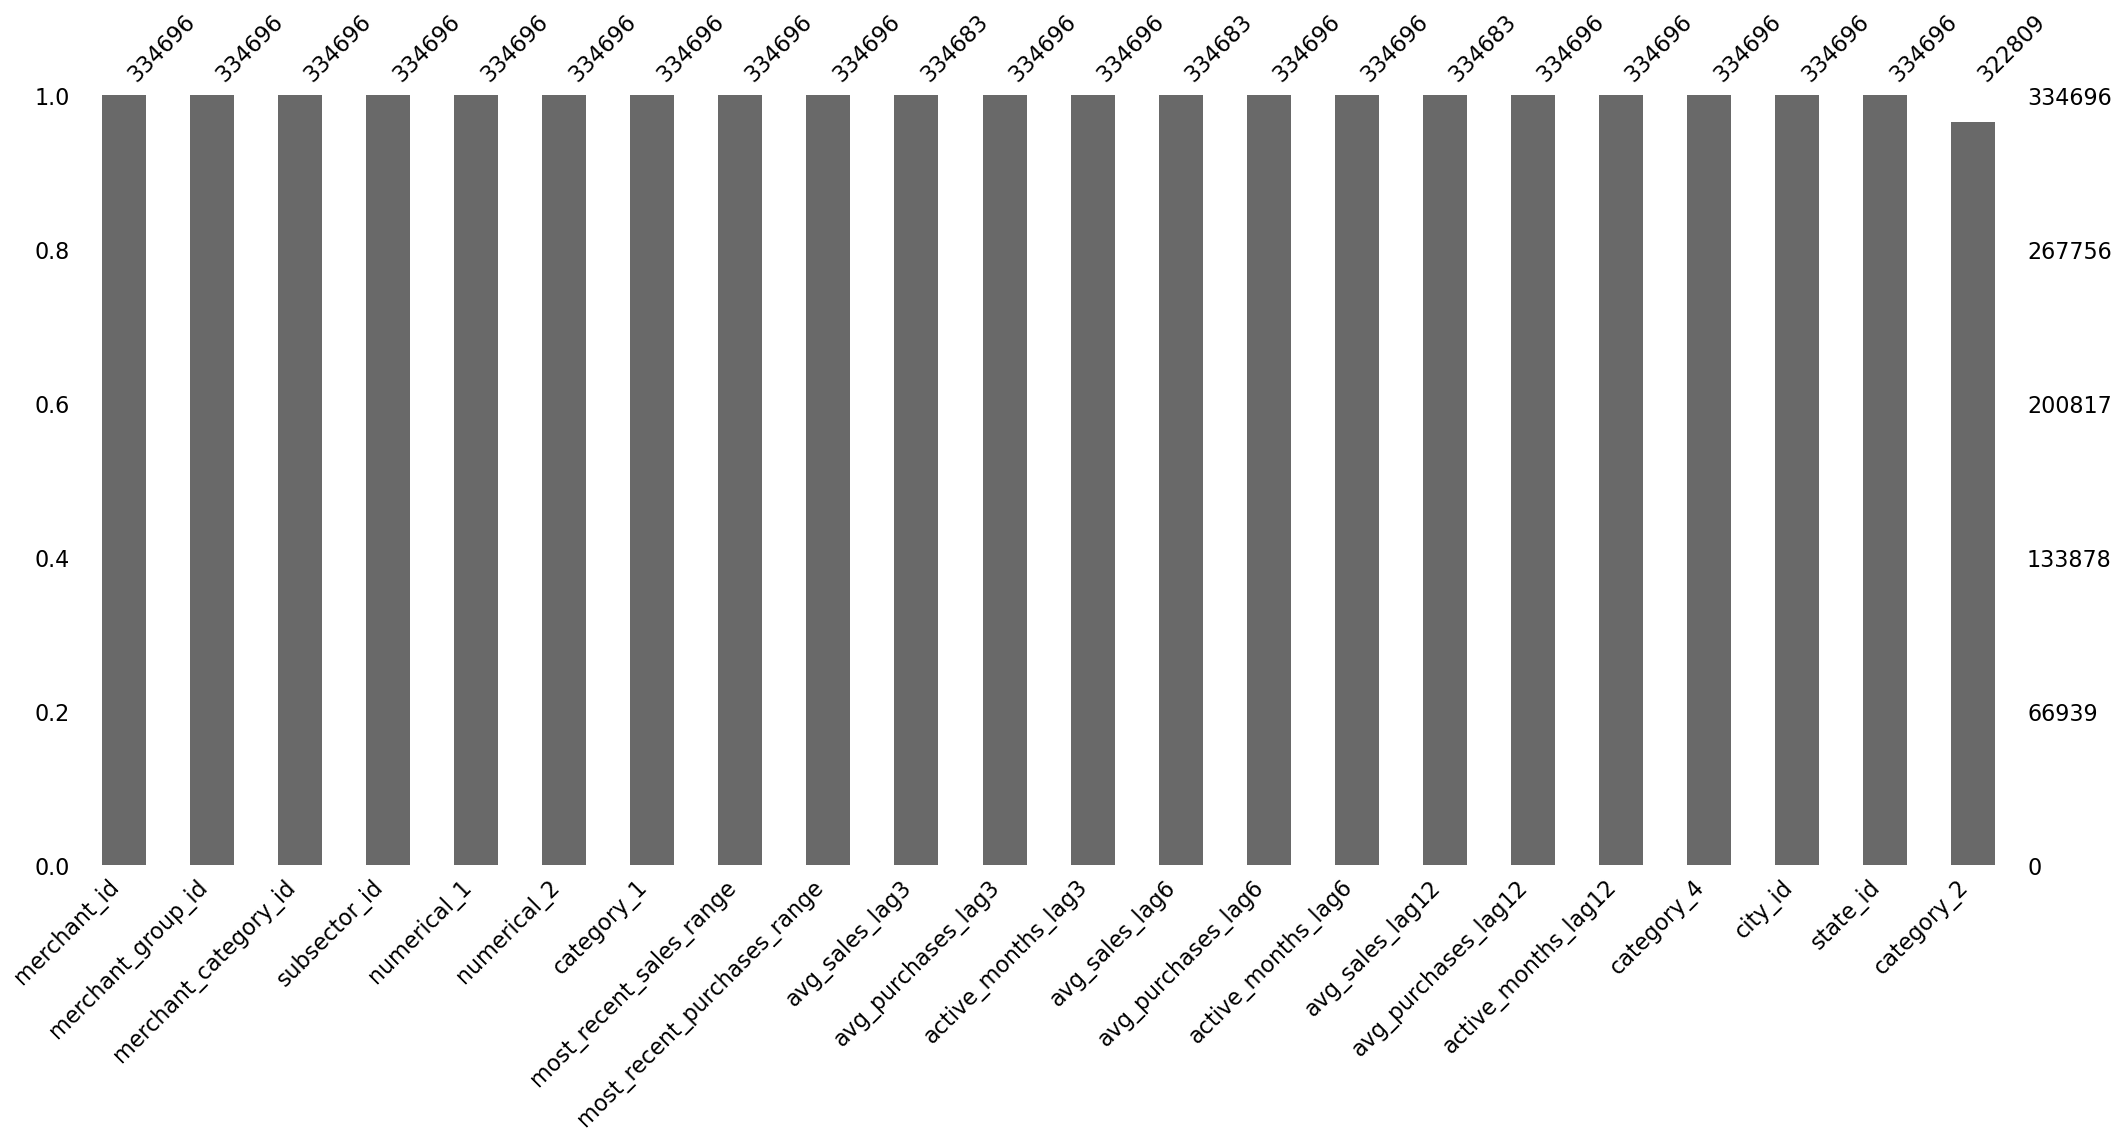

In [ ]:
import missingno as msno
msno.bar(merchants)

<Axes: >

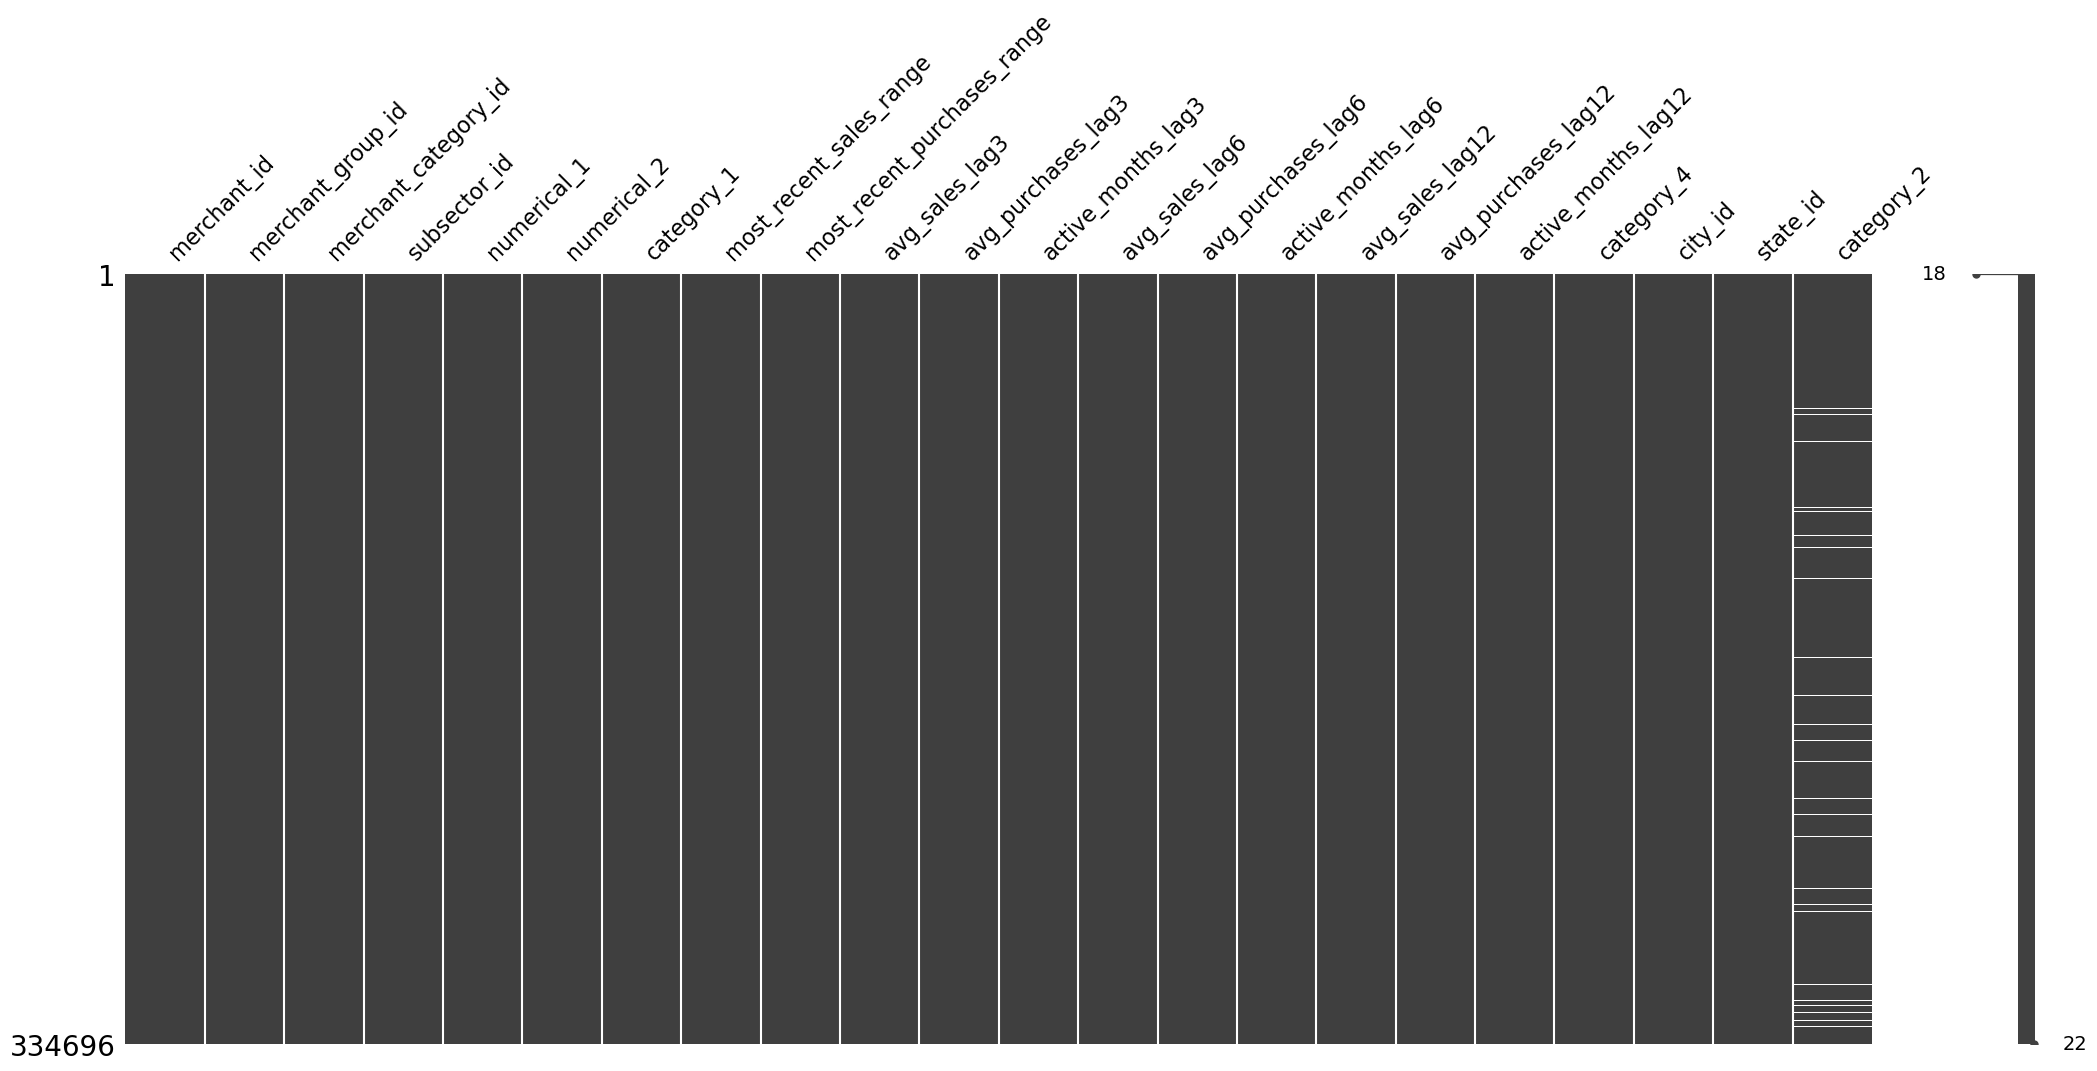

In [ ]:
# Create a heatmap of the null values in the columns
msno.matrix(merchants)

<Axes: >

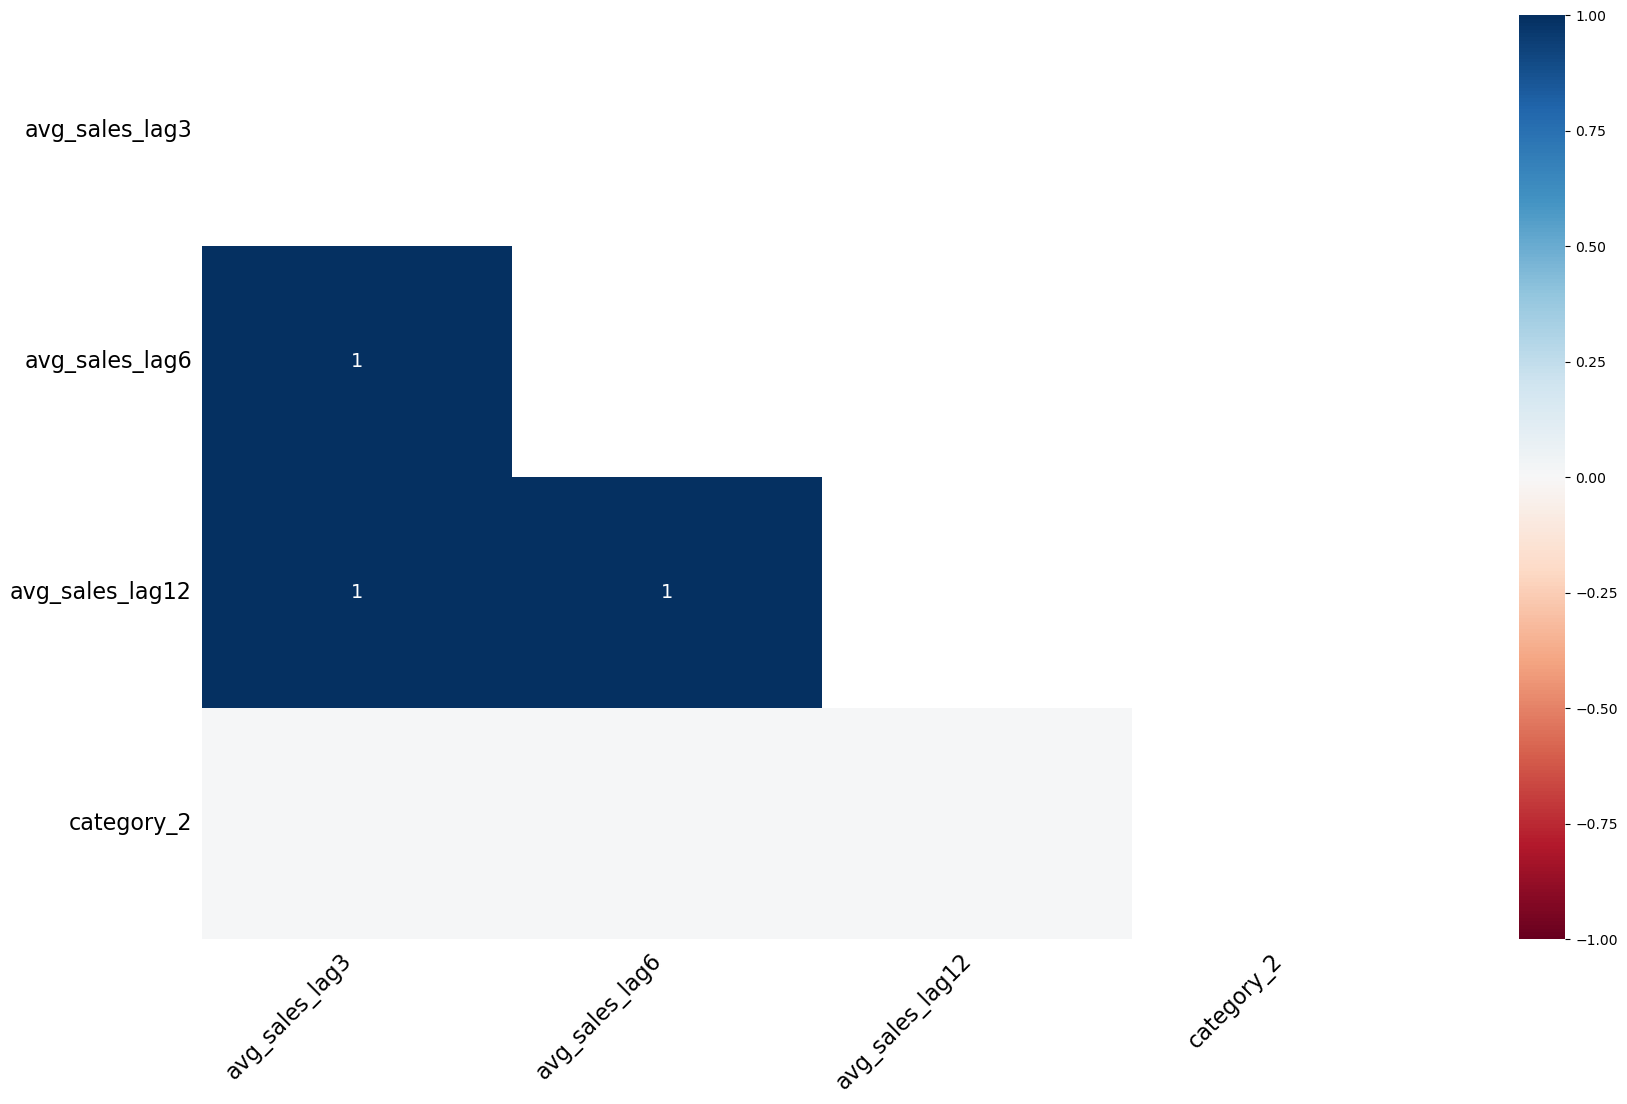

In [ ]:
msno.heatmap(merchants)

based on msno.bar() function and msno.matrix() function , there is one feature 'category_2' contain null so that the pattern is "General Pattern" and mechanism is "MCAR" beacuse no pattern of null in 'category_2' feature and another feature


there are three column contain null values and the correlation between them is very high ,these features are "avg_sales_lag3", "avg_sales_lag6" , "avg_sales_lag12"  their pattern is "Unit Nonresponse Pattern", and their mechanism is "MAR" because when one of them contain null another two feature contain null and when one of them contain value another two features contain value , so that there are pattern of null between three features

**Handle null values in each table**

**1- historical transactions**

In [ ]:
# get the percentage of null value in each column
null_rates = (historical_transactions.isnull().sum() / historical_transactions.shape[0])*100
# Print the results
print(null_rates.apply(lambda x: f"{x:.2f}%"))

authorized_flag         0.00%
card_id                 0.00%
city_id                 0.00%
category_1              0.00%
installments            0.00%
category_3              0.61%
merchant_category_id    0.00%
merchant_id             0.48%
month_lag               0.00%
purchase_amount         0.00%
purchase_date           0.00%
category_2              9.11%
state_id                0.00%
subsector_id            0.00%
dtype: object


<Axes: >

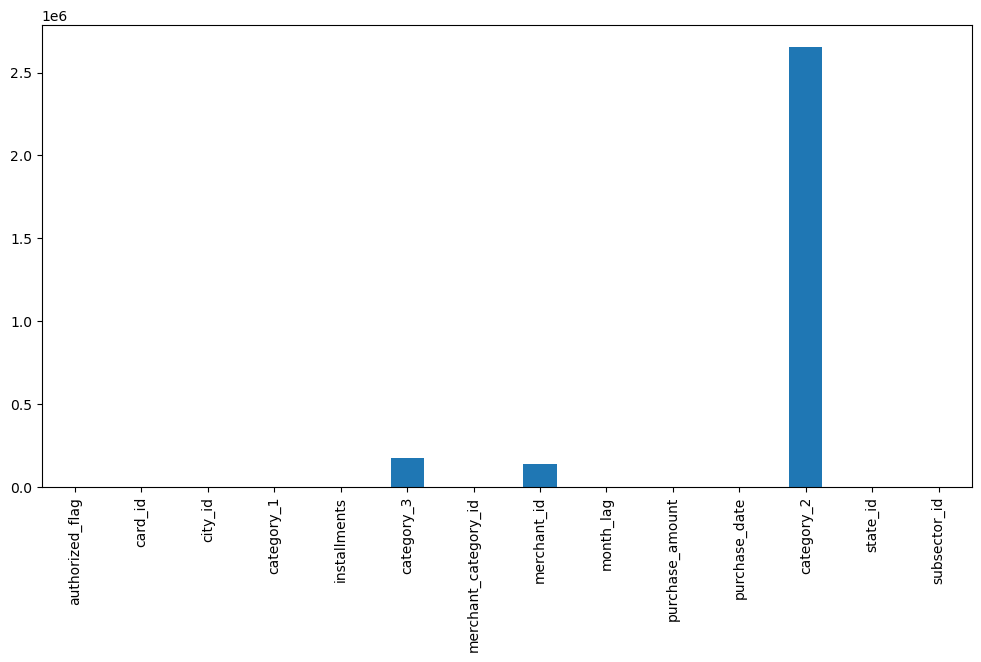

In [ ]:
# make visualization of null values
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 6))
historical_transactions.isna().sum().plot(kind="bar")

In [ ]:
# I will use dropna() function to drop all null from historical transactions table
historical_transactions=historical_transactions.dropna()

In [ ]:
# get the percentage of null value in each column after dropping null values
null_rates = (historical_transactions.isnull().sum() / historical_transactions.shape[0])*100
# Print the results
print(null_rates.apply(lambda x: f"{x:.2f}%"))

authorized_flag         0.00%
card_id                 0.00%
city_id                 0.00%
category_1              0.00%
installments            0.00%
category_3              0.00%
merchant_category_id    0.00%
merchant_id             0.00%
month_lag               0.00%
purchase_amount         0.00%
purchase_date           0.00%
category_2              0.00%
state_id                0.00%
subsector_id            0.00%
dtype: object


**Note**

installments feature in historical transactions contain negative number , I will replace negative number with zero

In [ ]:
# Replace negative values in the installments column with zero
historical_transactions['installments'] = historical_transactions['installments'].where(historical_transactions['installments'] >= 0, 0)

check null values after Replacement

In [ ]:
# Count the number of negative numbers and positive number in historical transactions
negative_count = len(historical_transactions[historical_transactions['installments'] < 0])
postive_count = len(historical_transactions[historical_transactions['installments'] > 0])
# Print the count
print('Number of negative numbers:', negative_count)
print('Number of positive numbers:', postive_count)

Number of negative numbers: 0
Number of positive numbers: 11194683


**2- New merchant transactions**

In [ ]:
# get the percentage of null value in each column
null_rates = (new_merchant_transactions.isnull().sum() / new_merchant_transactions.shape[0])*100
# Print the results
print(null_rates.apply(lambda x: f"{x:.2f}%"))

authorized_flag         0.00%
card_id                 0.00%
city_id                 0.00%
category_1              0.00%
installments            0.00%
category_3              2.85%
merchant_category_id    0.00%
merchant_id             1.34%
month_lag               0.00%
purchase_amount         0.00%
purchase_date           0.00%
category_2              5.69%
state_id                0.00%
subsector_id            0.00%
dtype: object


<Axes: >

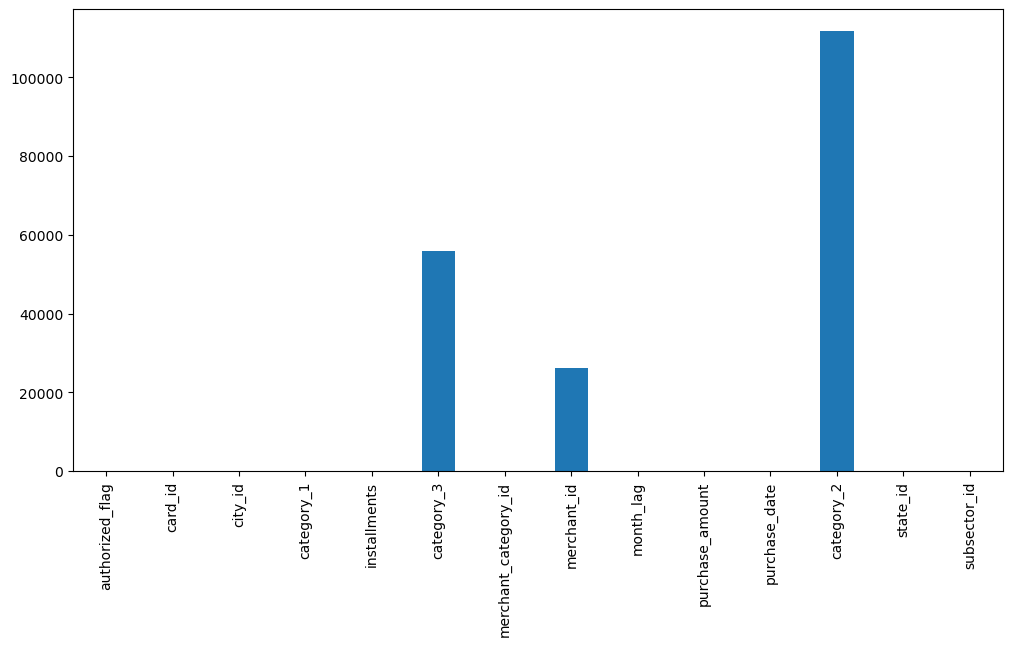

In [ ]:
# make visualization of null values
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 6))
new_merchant_transactions.isna().sum().plot(kind="bar")

In [ ]:
# I will use dropna() function to drop all null from new_merchant_transactions table
new_merchant_transactions=new_merchant_transactions.dropna()

In [ ]:
# get the percentage of null value in each column after dropping null values
null_rates = (new_merchant_transactions.isnull().sum() / new_merchant_transactions.shape[0])*100
# Print the results
print(null_rates.apply(lambda x: f"{x:.2f}%"))

authorized_flag         0.00%
card_id                 0.00%
city_id                 0.00%
category_1              0.00%
installments            0.00%
category_3              0.00%
merchant_category_id    0.00%
merchant_id             0.00%
month_lag               0.00%
purchase_amount         0.00%
purchase_date           0.00%
category_2              0.00%
state_id                0.00%
subsector_id            0.00%
dtype: object


**Note**

installments feature in new merchant transactions contain negative number  , I will replace negative number with zero

In [ ]:
# Replace negative values in the installments column with zero
new_merchant_transactions['installments'] = new_merchant_transactions['installments'].where(new_merchant_transactions['installments'] >= 0, 0)

check null values after Replacement

In [ ]:
# Count the number of negative numbers and positive number in historical transactions
negative_count = len(new_merchant_transactions[new_merchant_transactions['installments'] < 0])
postive_count = len(new_merchant_transactions[new_merchant_transactions['installments'] > 0])
# Print the count
print('Number of negative numbers:', negative_count)
print('Number of positive numbers:', postive_count)

Number of negative numbers: 0
Number of positive numbers: 893342


**3- Merchants**

In [ ]:
# get the percentage of null value in each column
null_rates = (merchants.isnull().sum() / merchants.shape[0])*100
# Print the results
print(null_rates.apply(lambda x: f"{x:.2f}%"))

merchant_id                    0.00%
merchant_group_id              0.00%
merchant_category_id           0.00%
subsector_id                   0.00%
numerical_1                    0.00%
numerical_2                    0.00%
category_1                     0.00%
most_recent_sales_range        0.00%
most_recent_purchases_range    0.00%
avg_sales_lag3                 0.00%
avg_purchases_lag3             0.00%
active_months_lag3             0.00%
avg_sales_lag6                 0.00%
avg_purchases_lag6             0.00%
active_months_lag6             0.00%
avg_sales_lag12                0.00%
avg_purchases_lag12            0.00%
active_months_lag12            0.00%
category_4                     0.00%
city_id                        0.00%
state_id                       0.00%
category_2                     3.55%
dtype: object


<Axes: >

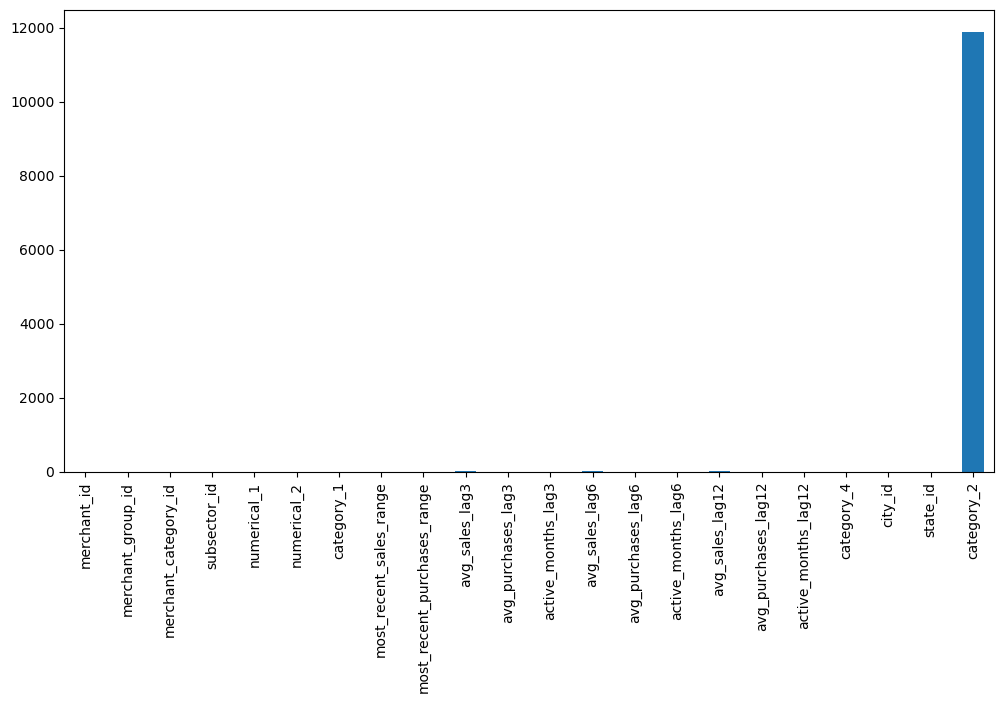

In [ ]:
# make visualization of null values
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 6))
merchants.isna().sum().plot(kind="bar")

In [ ]:
# I will use dropna() function to drop all null from merchants table
merchants=merchants.dropna()

In [ ]:
# get the percentage of null value in each column after dropping null values
null_rates = (merchants.isnull().sum() / merchants.shape[0])*100
# Print the results
print(null_rates.apply(lambda x: f"{x:.2f}%"))

merchant_id                    0.00%
merchant_group_id              0.00%
merchant_category_id           0.00%
subsector_id                   0.00%
numerical_1                    0.00%
numerical_2                    0.00%
category_1                     0.00%
most_recent_sales_range        0.00%
most_recent_purchases_range    0.00%
avg_sales_lag3                 0.00%
avg_purchases_lag3             0.00%
active_months_lag3             0.00%
avg_sales_lag6                 0.00%
avg_purchases_lag6             0.00%
active_months_lag6             0.00%
avg_sales_lag12                0.00%
avg_purchases_lag12            0.00%
active_months_lag12            0.00%
category_4                     0.00%
city_id                        0.00%
state_id                       0.00%
category_2                     0.00%
dtype: object


**Note :**

there are features in merchants table contain infinite(inf) , but dropna() function make dropping of rows that contain infinite values

In [ ]:
# check infinite values after drop infinite values
ds = merchants.isin([np.inf, -np.inf]).values.sum()
print(ds)

0


**4-userscore**

In [ ]:
# check null values
null_rates = (userscore.isnull().sum() / userscore.shape[0])*100
# Print the results
print(null_rates.apply(lambda x: f"{x:.2f}%"))

card_id               0.00%
first_active_month    0.00%
feature_1             0.00%
feature_2             0.00%
feature_3             0.00%
score                 0.00%
dtype: object


**- no null values in user score**

**Merge Tables**

In [ ]:
# make concat between historical_transactions and new_merchant_transactions because the two tables have the same features
join_vertically=pd.concat([historical_transactions,new_merchant_transactions])

In [ ]:
# Convert the `purchase_date` column to a column of dates
join_vertically['purchase_date'] = pd.to_datetime(join_vertically['purchase_date'])

# Convert the `authorized_flag` column from (yes and no) to (1 and 0)
join_vertically['authorized_flag'] = join_vertically['authorized_flag'].replace({'yes': 1, 'no': 0})

# make an Aggregation on all features in join_vertically,groping them by `card_id`
aggregated_data = join_vertically.groupby('card_id').agg({
    'authorized_flag': 'sum',
    'city_id': 'count',
    'category_1': 'count',
    'installments': 'mean',
    'category_3': 'count',
    'merchant_category_id': 'count',
    'merchant_id':lambda x: x.mode()[0],
    'month_lag': 'mean',
    'purchase_amount': 'sum',
    'purchase_date':  'min'

}
)

In [ ]:
aggregated_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 320800 entries, C_ID_00007093c1 to C_ID_fffffd5772
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   authorized_flag       320800 non-null  object        
 1   city_id               320800 non-null  int64         
 2   category_1            320800 non-null  int64         
 3   installments          320800 non-null  float64       
 4   category_3            320800 non-null  int64         
 5   merchant_category_id  320800 non-null  int64         
 6   merchant_id           320800 non-null  object        
 7   month_lag             320800 non-null  float64       
 8   purchase_amount       320800 non-null  float64       
 9   purchase_date         320800 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(4), object(2)
memory usage: 26.9+ MB


In [ ]:
# make an inner join between join_vertically table and userscore table on 'card_id'
join_horizontally=aggregated_data.merge(userscore,on="card_id",how="inner")

In [ ]:
# make an inner join between join_horizontally table and merchants table on 'merchant_id'
final_table=join_horizontally.merge(merchants,on="merchant_id",how="inner")

In [ ]:
#get info after joining all tables
final_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170074 entries, 0 to 170073
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   card_id                      170074 non-null  object        
 1   authorized_flag              170074 non-null  object        
 2   city_id_x                    170074 non-null  int64         
 3   category_1_x                 170074 non-null  int64         
 4   installments                 170074 non-null  float64       
 5   category_3                   170074 non-null  int64         
 6   merchant_category_id_x       170074 non-null  int64         
 7   merchant_id                  170074 non-null  object        
 8   month_lag                    170074 non-null  float64       
 9   purchase_amount              170074 non-null  float64       
 10  purchase_date                170074 non-null  datetime64[ns]
 11  first_active_month        

In [ ]:
# get the summation of null values in each column in final_table
final_table.isna().sum()

card_id                        0
authorized_flag                0
city_id_x                      0
category_1_x                   0
installments                   0
category_3                     0
merchant_category_id_x         0
merchant_id                    0
month_lag                      0
purchase_amount                0
purchase_date                  0
first_active_month             0
feature_1                      0
feature_2                      0
feature_3                      0
score                          0
merchant_group_id              0
merchant_category_id_y         0
subsector_id                   0
numerical_1                    0
numerical_2                    0
category_1_y                   0
most_recent_sales_range        0
most_recent_purchases_range    0
avg_sales_lag3                 0
avg_purchases_lag3             0
active_months_lag3             0
avg_sales_lag6                 0
avg_purchases_lag6             0
active_months_lag6             0
avg_sales_

In [ ]:
# get the percentage of null value in each column
null_rates = (final_table.isnull().sum() / final_table.shape[0])*100
# Print the results
print(null_rates.apply(lambda x: f"{x:.2f}%"))

card_id                        0.00%
authorized_flag                0.00%
city_id_x                      0.00%
category_1_x                   0.00%
installments                   0.00%
category_3                     0.00%
merchant_category_id_x         0.00%
merchant_id                    0.00%
month_lag                      0.00%
purchase_amount                0.00%
purchase_date                  0.00%
first_active_month             0.00%
feature_1                      0.00%
feature_2                      0.00%
feature_3                      0.00%
score                          0.00%
merchant_group_id              0.00%
merchant_category_id_y         0.00%
subsector_id                   0.00%
numerical_1                    0.00%
numerical_2                    0.00%
category_1_y                   0.00%
most_recent_sales_range        0.00%
most_recent_purchases_range    0.00%
avg_sales_lag3                 0.00%
avg_purchases_lag3             0.00%
active_months_lag3             0.00%
a

**dropping attributes that are not useful**

In [ ]:
final_table.drop(['authorized_flag', 'category_1_x','category_1_y','installments', 'category_3', 'month_lag','merchant_id','merchant_group_id'], axis=1, inplace=True)

**get the correlation between features and target**

In [ ]:
# select integer and float data and store them in 'df_draw'
df_draw = final_table.select_dtypes(include=['int', 'float'])

<Axes: >

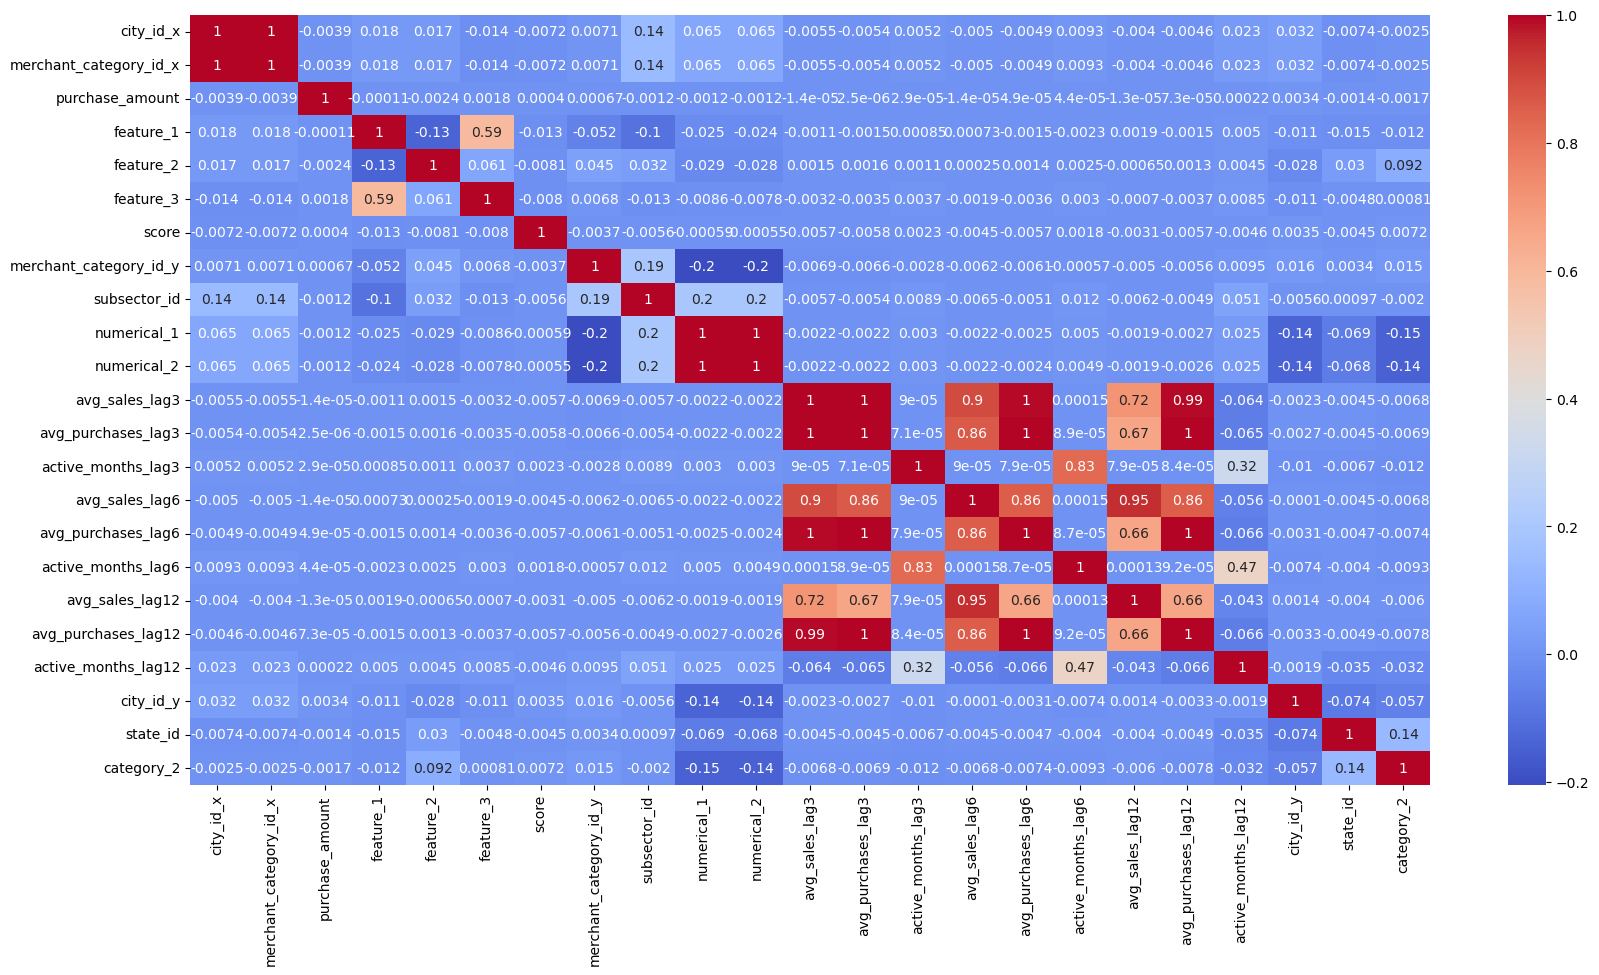

In [ ]:
# import seaborn as sns
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 10))
# Calculate the correlation matrix
corr = df_draw.corr()
# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

**based on the correlation ,I will drop set of features based on the features that have high correlation with another feature**

In [ ]:
final_table.drop(['city_id_x','numerical_2','avg_purchases_lag12','avg_purchases_lag3','merchant_category_id_y','merchant_category_id_x','numerical_2','avg_sales_lag3','avg_sales_lag6','active_months_lag6'], axis=1, inplace=True)

In [ ]:
# select float and integer number
df_draw = final_table.select_dtypes(include=['int', 'float'])

<Axes: >

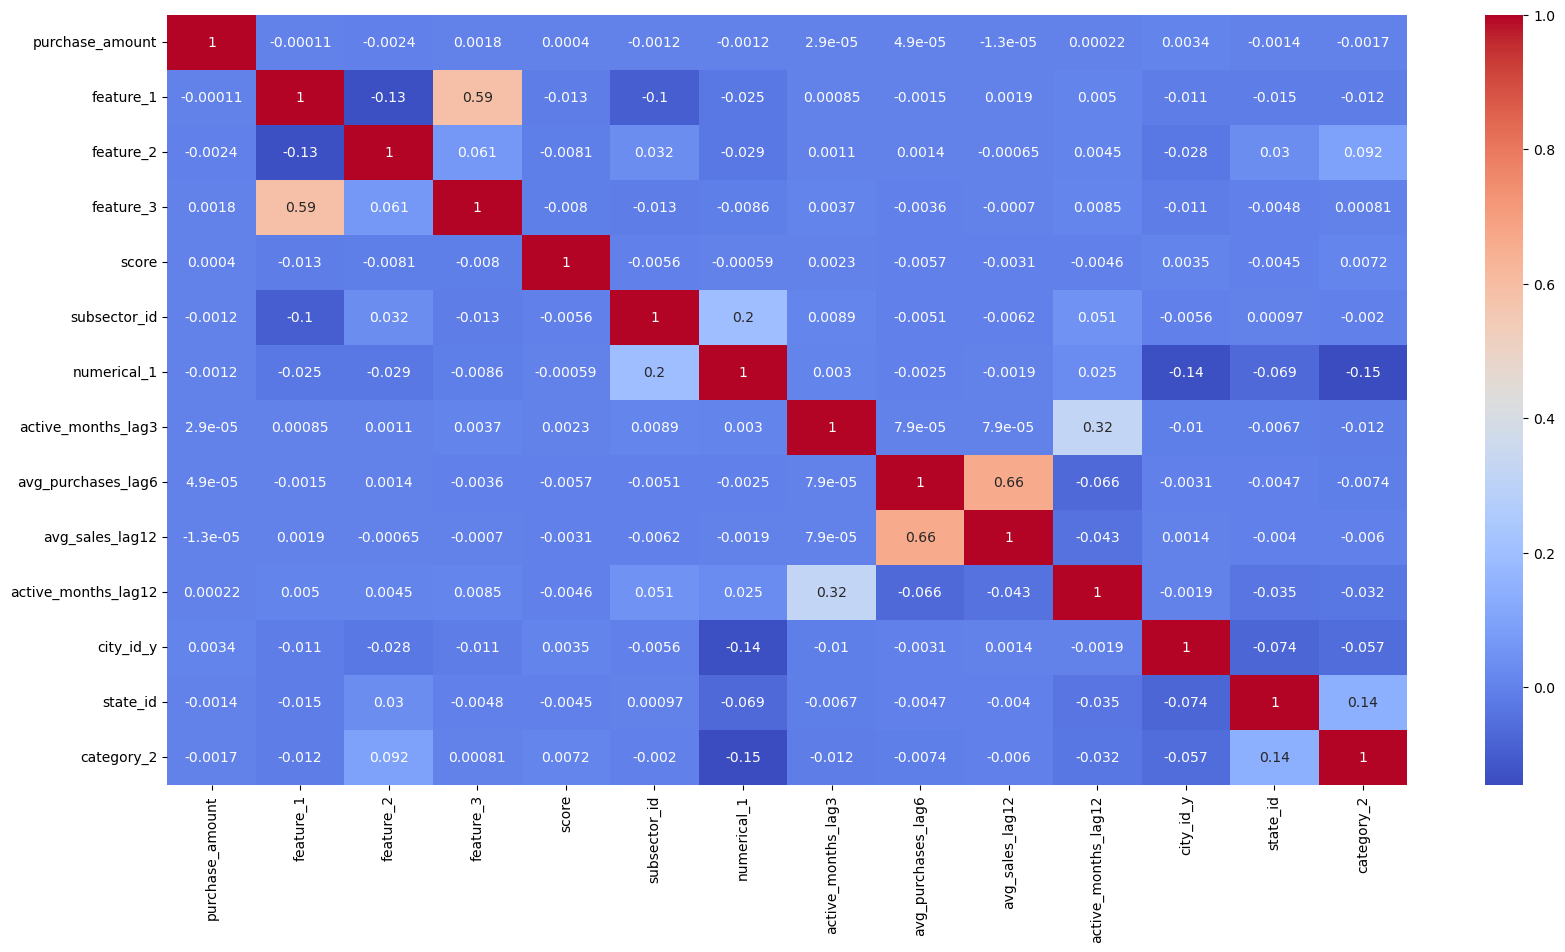

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 10))
# Calculate the correlation matrix
corr = df_draw.corr()
# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
# get information about final table
final_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170074 entries, 0 to 170073
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   card_id                      170074 non-null  object        
 1   purchase_amount              170074 non-null  float64       
 2   purchase_date                170074 non-null  datetime64[ns]
 3   first_active_month           170074 non-null  object        
 4   feature_1                    170074 non-null  int64         
 5   feature_2                    170074 non-null  int64         
 6   feature_3                    170074 non-null  int64         
 7   score                        170074 non-null  float64       
 8   subsector_id                 170074 non-null  int64         
 9   numerical_1                  170074 non-null  float64       
 10  most_recent_sales_range      170074 non-null  object        
 11  most_recent_purchases_rang

**Check Duplication**

In [ ]:
duplicates = final_table.duplicated().sum()
print(duplicates)

62


**Drop Duplication**

In [ ]:
# Drop duplicates
final_table = final_table.drop_duplicates()

In [ ]:
# check duplicates after dopping all duplicates
duplicates = final_table.duplicated().sum()
print(duplicates)

0


In [ ]:
final_table.head()

card_id  purchase_amount       purchase_date first_active_month   
0  C_ID_00007093c1       -58.134524 2017-02-14 14:00:43             Feb-17  \
1  C_ID_0d521d52b4       -49.710466 2017-01-05 18:27:18             Dec-16   
2  C_ID_0001506ef0       -35.333881 2017-01-14 16:16:01             Jul-16   
3  C_ID_005a3b342e       -42.448243 2017-11-01 00:00:00             Oct-17   
4  C_ID_0148817836      -221.871315 2017-03-21 17:08:17             Mar-17   

   feature_1  feature_2  feature_3      score  subsector_id  numerical_1   
0          5          1          1   0.134077            19    -0.047556  \
1          5          2          1 -33.219281            19    -0.047556   
2          2          2          0   0.884295            33     0.388700   
3          3          1          1  -0.293427            33     0.388700   
4          4          1          0  -0.100774            33     0.388700   

  most_recent_sales_range most_recent_purchases_range  active_months_lag3   
0                       D                           D                   3  \
1                       D                           D                   3   
2                       A                           A                   3   
3                       A                           A                   3   
4                       A                           A                   3   

   avg_purchases_lag6  avg_sales_lag12  active_months_lag12 category_4   
0            0.959246             1.02                   12          N  \
1            0.959246             1.02                   12          N   
2            1.087142             0.95                   12          Y   
3            1.087142             0.95                   12          Y   
4            1.087142             0.95                   12          Y   

   city_id_y  state_id  category_2  
0         -1         2         3.0  
1         -1         2         3.0  
2        137        19         3.0  
3        137        19         3.0  
4        137        19         3.0

In [ ]:
fr1=final_table
fr2=final_table

**Avoid Noise consistency by convert all object datatype into lowercase**

In [ ]:
# Get the categorical columns
categorical_columns = final_table.select_dtypes(include='object').columns

# Convert all categorical data to lowercase
for column in categorical_columns:
    final_table[column] = final_table[column].str.lower()

# Question : 1

The k-means clustering model divides data points into k clusters, where k is a user-defined number. The model works by assigning data points to clusters iteratively and updating cluster centroids until the algorithm converges. The process begins by assigning data points to clusters at random. The centroids of each cluster are then computed. After that, the data points are reassigned to the cluster with the closest centroid. This technique is repeated until the cluster centroids are no longer change

**Prepare the Data for K-means cluster Model**

Delete the outlier from purchase_amount

In [ ]:
# Calculate the IQR
q1 = final_table['purchase_amount'].quantile(0.25)
q3 = final_table['purchase_amount'].quantile(0.75)
iqr = q3 - q1
# Identify the outlier, which is the data point that falls outside the 1.5 * IQR interval
outlier = final_table[final_table['purchase_amount'] > q3 + 1.5 * iqr]
# Drop the outlier from the DataFrame
final_table = final_table.drop(outlier.index, axis=0)

Get the Datatype for each feature in table

In [ ]:
final_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169069 entries, 0 to 170073
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   card_id                      169069 non-null  object        
 1   purchase_amount              169069 non-null  float64       
 2   purchase_date                169069 non-null  datetime64[ns]
 3   first_active_month           169069 non-null  object        
 4   feature_1                    169069 non-null  int64         
 5   feature_2                    169069 non-null  int64         
 6   feature_3                    169069 non-null  int64         
 7   score                        169069 non-null  float64       
 8   subsector_id                 169069 non-null  int64         
 9   numerical_1                  169069 non-null  float64       
 10  most_recent_sales_range      169069 non-null  object        
 11  most_recent_purchases_range  16

- we found that there are "int","float","datatime" and "object" datatypes in DataFrame

- Unlike supervised learning, clustering.
  K-Means divides objects into clusters based on
  similarities between them and differences from objects in other groups.

- beacuse I will use clustring technique where no label in data, so that I will delete 'score ' from DataFrame, to use the features without label in k-means

- before dropping 'score' label ,I store the values of column "score" in 'score' variable because i will need the "score" later

- I will delete set of features that not importat in clustring such as "state_id" , "city_id_y", "card_id"

In [ ]:
score = final_table['score']
final_table=final_table.drop('score', axis=1)
final_table=final_table.drop('state_id', axis=1)
final_table=final_table.drop('city_id_y', axis=1)
final_table=final_table.drop('card_id', axis=1)

In [ ]:
final_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169069 entries, 0 to 170073
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   purchase_amount              169069 non-null  float64       
 1   purchase_date                169069 non-null  datetime64[ns]
 2   first_active_month           169069 non-null  object        
 3   feature_1                    169069 non-null  int64         
 4   feature_2                    169069 non-null  int64         
 5   feature_3                    169069 non-null  int64         
 6   subsector_id                 169069 non-null  int64         
 7   numerical_1                  169069 non-null  float64       
 8   most_recent_sales_range      169069 non-null  object        
 9   most_recent_purchases_range  169069 non-null  object        
 10  active_months_lag3           169069 non-null  int64         
 11  avg_purchases_lag6           16

Categorical data cannot be evaluated using the k-Means approach since the variables are discrete and have no natural origins. Euclidean distance calculation for such a space is therefore meaningless.

The k-Means technique has an alternative called k-Modes that is appropriate for data containing categorical attributes. The k-Prototype algorithm is a k-Modes extension that handles mixed category and numerical information.

**so that , I will select only the numerical data to use it in k-means model**

In [ ]:
final_table=final_table.select_dtypes(['int','float'])

In [ ]:
final_table.head()

purchase_amount  feature_1  feature_2  feature_3  subsector_id   
0       -58.134524          5          1          1            19  \
1       -49.710466          5          2          1            19   
2       -35.333881          2          2          0            33   
3       -42.448243          3          1          1            33   
4      -221.871315          4          1          0            33   

   numerical_1  active_months_lag3  avg_purchases_lag6  avg_sales_lag12   
0    -0.047556                   3            0.959246             1.02  \
1    -0.047556                   3            0.959246             1.02   
2     0.388700                   3            1.087142             0.95   
3     0.388700                   3            1.087142             0.95   
4     0.388700                   3            1.087142             0.95   

   active_months_lag12  category_2  
0                   12         3.0  
1                   12         3.0  
2                   12         3.0  
3                   12         3.0  
4                   12         3.0

In [ ]:
score

0          0.134077
1        -33.219281
2          0.884295
3         -0.293427
4         -0.100774
            ...    
170069     0.049543
170070    -3.015456
170071     1.628790
170072    -0.243000
170073    -1.073077
Name: score, Length: 169069, dtype: float64

Plot the Histogram for All features

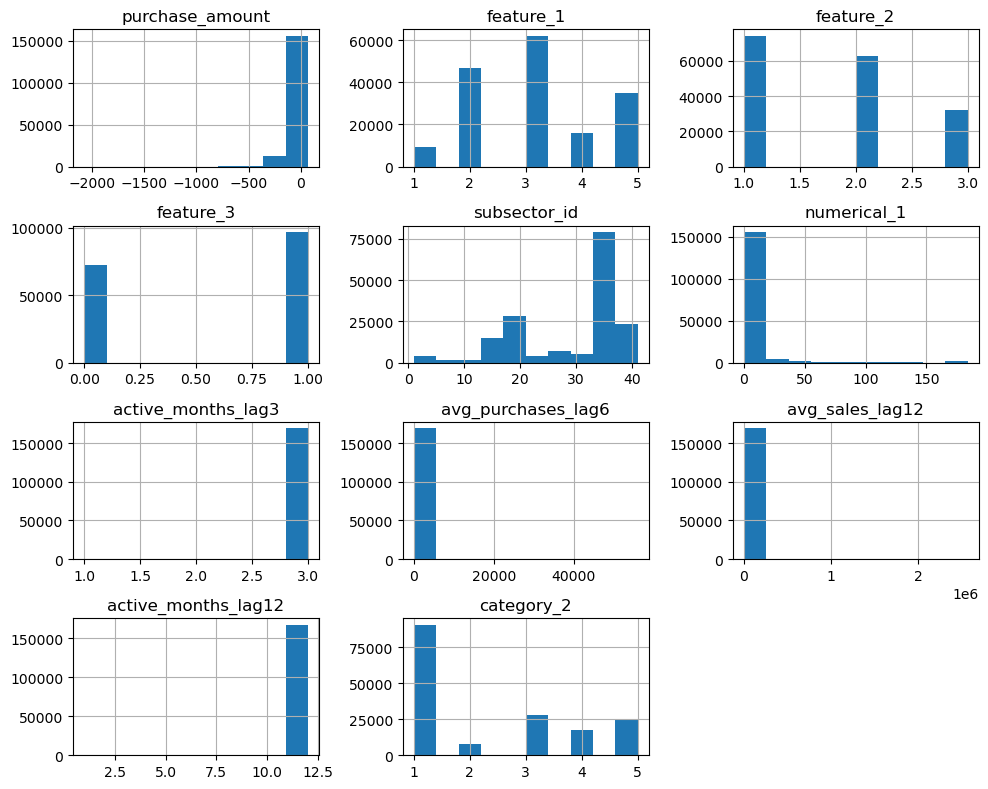

In [ ]:
# Visualize distribution of each feature
final_table.hist(figsize=(10,8))
plt.tight_layout();

Get the datatype for each feature after select only the numerical features and drop score

In [ ]:
final_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169069 entries, 0 to 170073
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   purchase_amount      169069 non-null  float64
 1   feature_1            169069 non-null  int64  
 2   feature_2            169069 non-null  int64  
 3   feature_3            169069 non-null  int64  
 4   subsector_id         169069 non-null  int64  
 5   numerical_1          169069 non-null  float64
 6   active_months_lag3   169069 non-null  int64  
 7   avg_purchases_lag6   169069 non-null  float64
 8   avg_sales_lag12      169069 non-null  float64
 9   active_months_lag12  169069 non-null  int64  
 10  category_2           169069 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 15.5 MB


Also,I will drop subsector_id ,because subsector_id not important

In [ ]:
final_table=final_table.drop('subsector_id', axis=1)

In [ ]:
final_table.head()

purchase_amount  feature_1  feature_2  feature_3  numerical_1   
0       -58.134524          5          1          1    -0.047556  \
1       -49.710466          5          2          1    -0.047556   
2       -35.333881          2          2          0     0.388700   
3       -42.448243          3          1          1     0.388700   
4      -221.871315          4          1          0     0.388700   

   active_months_lag3  avg_purchases_lag6  avg_sales_lag12   
0                   3            0.959246             1.02  \
1                   3            0.959246             1.02   
2                   3            1.087142             0.95   
3                   3            1.087142             0.95   
4                   3            1.087142             0.95   

   active_months_lag12  category_2  
0                   12         3.0  
1                   12         3.0  
2                   12         3.0  
3                   12         3.0  
4                   12         3.0

In [ ]:
final_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169069 entries, 0 to 170073
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   purchase_amount      169069 non-null  float64
 1   feature_1            169069 non-null  int64  
 2   feature_2            169069 non-null  int64  
 3   feature_3            169069 non-null  int64  
 4   numerical_1          169069 non-null  float64
 5   active_months_lag3   169069 non-null  int64  
 6   avg_purchases_lag6   169069 non-null  float64
 7   avg_sales_lag12      169069 non-null  float64
 8   active_months_lag12  169069 non-null  int64  
 9   category_2           169069 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 14.2 MB


import the required libraries to deal with k-means

In [ ]:
!pip install yellowbrick
import scipy.stats as stats
from statsmodels.stats.power import TTestIndPower, TTestPower
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

Knowing the datatype for each feature

In [ ]:
final_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169069 entries, 0 to 170073
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   purchase_amount      169069 non-null  float64
 1   feature_1            169069 non-null  int64  
 2   feature_2            169069 non-null  int64  
 3   feature_3            169069 non-null  int64  
 4   numerical_1          169069 non-null  float64
 5   active_months_lag3   169069 non-null  int64  
 6   avg_purchases_lag6   169069 non-null  float64
 7   avg_sales_lag12      169069 non-null  float64
 8   active_months_lag12  169069 non-null  int64  
 9   category_2           169069 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 14.2 MB


K-means is a clustering technique that assigns data points to clusters iteratively based on how far they are from the cluster centroids. Data points with varying scales will be handled differently by the algorithm since it is sensitive to the scale of the data. This may result in less-than-ideal clustering outcomes.Before using k-means to solve this problem, the data is frequently scaled.

so that ,I will use StandardScaler to make scale on data

In [ ]:
# feature normalization, you can also try what if not performing this step.
scaler = StandardScaler()
data_scaled = scaler.fit_transform(final_table)
data_scaled = pd.DataFrame(data_scaled)
# make an describtion on data
data_scaled.describe()

0             1             2             3             4   
count  1.690690e+05  1.690690e+05  1.690690e+05  1.690690e+05  1.690690e+05  \
mean   2.689715e-17  1.109507e-16 -1.323844e-16 -9.178651e-17  3.227657e-17   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min   -2.976203e+01 -1.786350e+00 -9.972391e-01 -1.158531e+00 -2.666429e-01   
25%   -2.146116e-01 -9.428254e-01 -9.972391e-01 -1.158531e+00 -2.666429e-01   
50%    3.191863e-01 -9.930071e-02  3.334073e-01  8.631618e-01 -2.651095e-01   
75%    5.888646e-01  7.442240e-01  3.334073e-01  8.631618e-01 -2.459431e-01   
max    1.796943e+00  1.587749e+00  1.664054e+00  8.631618e-01  6.839131e+00   

                  5             6             7             8             9  
count  1.690690e+05  1.690690e+05  1.690690e+05  1.690690e+05  1.690690e+05  
mean   9.835656e-15  7.564822e-19 -3.152009e-18 -5.628228e-16  1.102783e-16  
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  
min   -1.186935e+02 -1.136682e-02 -7.387310e-03 -2.996851e+01 -8.326631e-01  
25%    1.053156e-02 -9.601408e-03 -7.290442e-03  9.581418e-02 -8.326631e-01  
50%    1.053156e-02 -9.488252e-03 -7.280875e-03  9.581418e-02 -8.326631e-01  
75%    1.053156e-02 -9.311593e-03 -7.268916e-03  9.581418e-02  1.118038e+00  
max    1.053156e-02  1.237064e+02  3.070289e+02  9.581418e-02  1.768271e+00

In [ ]:
# faetures after scaling
data_scaled

0         1         2         3         4         5         6   
0      -0.061639  1.587749 -0.997239  0.863162 -0.266260  0.010532 -0.009664  \
1       0.062537  1.587749  0.333407  0.863162 -0.266260  0.010532 -0.009664   
2       0.274457 -0.942825  0.333407 -1.158531 -0.249393  0.010532 -0.009382   
3       0.169587 -0.099301 -0.997239  0.863162 -0.249393  0.010532 -0.009382   
4      -2.475218  0.744224 -0.997239 -1.158531 -0.249393  0.010532 -0.009382   
...          ...       ...       ...       ...       ...       ...       ...   
169064  0.222810 -0.942825  0.333407 -1.158531 -0.263193  0.010532 -0.009786   
169065  0.492658 -0.099301  1.664054  0.863162 -0.257826  0.010532 -0.008646   
169066 -0.492703  1.587749  0.333407  0.863162 -0.266643  0.010532 -0.009701   
169067  0.195634 -0.099301  0.333407  0.863162 -0.266643  0.010532 -0.009585   
169068  0.349581 -0.942825 -0.997239 -1.158531 -0.266643  0.010532 -0.008749   

               7         8         9  
0      -0.007284  0.095814  0.467804  
1      -0.007284  0.095814  0.467804  
2      -0.007293  0.095814  0.467804  
3      -0.007293  0.095814  0.467804  
4      -0.007293  0.095814  0.467804  
...          ...       ...       ...  
169064 -0.007307  0.095814 -0.832663  
169065 -0.007246  0.095814 -0.832663  
169066 -0.007284  0.095814  1.118038  
169067 -0.007304  0.095814 -0.182430  
169068 -0.007284  0.095814  0.467804  

[169069 rows x 10 columns]

Techniques to get the best 'k' based on the data :

1- Elbow Method

2- Silhouette Coefficient

- In k-means clustering, the Elbow approach is a popular heuristic for determining the ideal number of clusters. The approach plots the within-cluster sum of squares (WCSS) as a function of cluster count. The WCSS is a measure of the difference between data points and their cluster centroids.

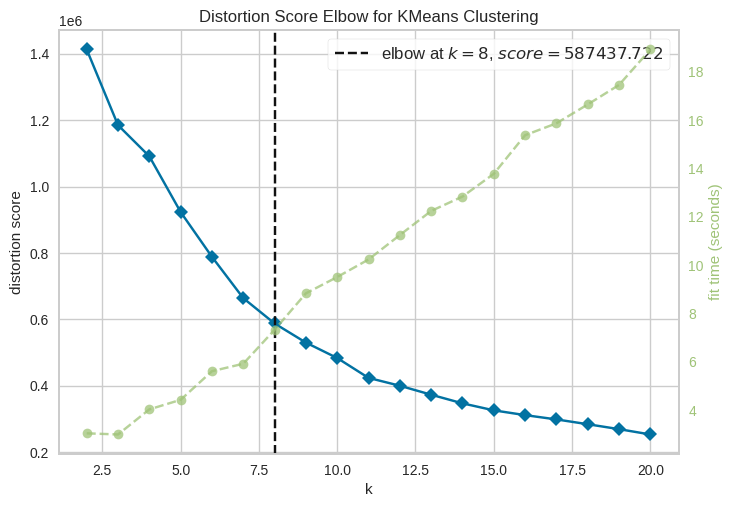

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# This approaches uses distortion score to evaluate KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 21))
visualizer.fit(data_scaled)
visualizer.show()

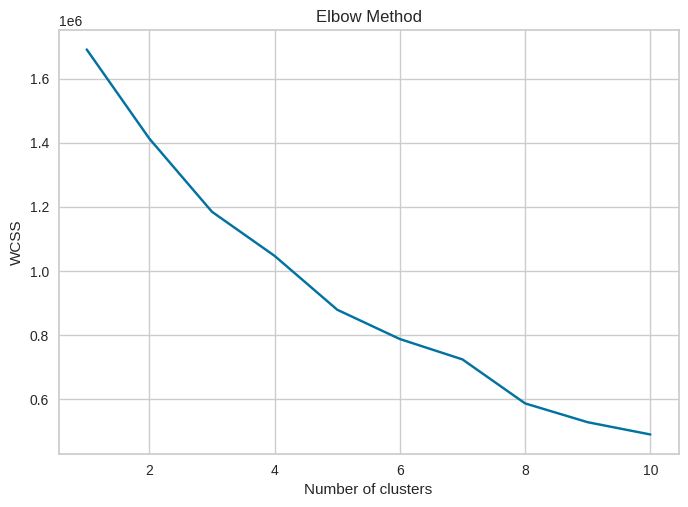

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**the best 'k' based on Elbow Method is 8**

pass k=8 for K-means and make fit and predict of clusters

In [ ]:
# Create a KMeans model
kmeans = KMeans(n_clusters=8)
# Fit the KMeans model
labels = kmeans.fit_predict(data_scaled)

The dimensionality reduction approach T-distributed stochastic neighbour embedding (t-SNE) is used to visualise high-dimensional data. It is a strategy for reducing dimensionality that is non-linear.

In [ ]:
#Create a TSNE model
tsne = TSNE(n_components=2, perplexity=30)
#Fit the TSNE model
tsne_data = tsne.fit_transform(data_scaled)

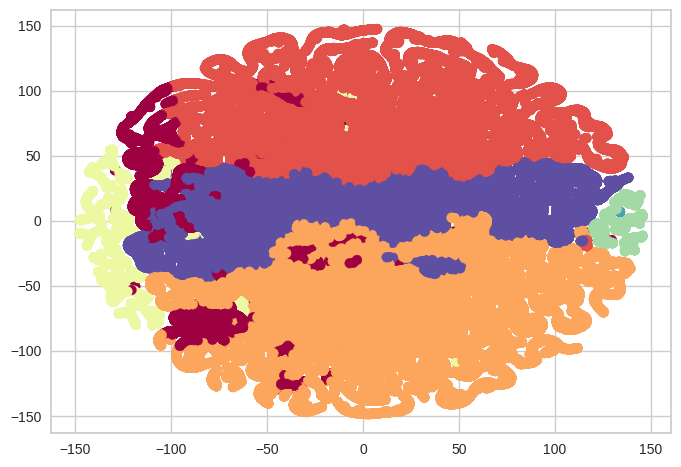

In [ ]:
# Plot the TSNE data
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=labels, cmap="Spectral")
plt.show()

plot the same visualization in 3D

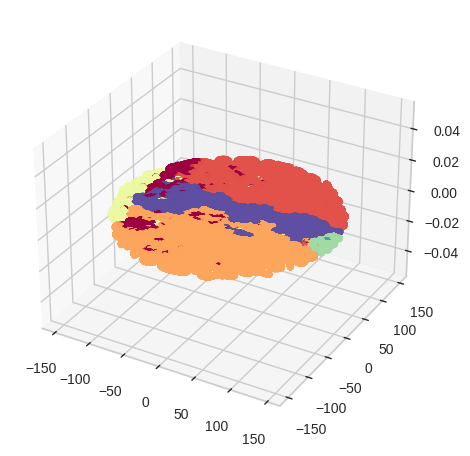

In [ ]:
tsne_data3d = np.zeros((169069, 1))
# Plot the TSNE data in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_data[:, 0], tsne_data[:, 1], tsne_data3d, c=labels, cmap="Spectral")

the best 'K' for Elbow Method is 8 and I Think it is best for clustering but I will Check also silhouette score because silhouette score get score more accurate

- The silhouette score indicates how well a data point fits within its cluster. It is computed by averaging the distance between a data point and all other data points in its cluster, as well as the distance between the data point and the nearest cluster. A high silhouette score indicates a well-clustered data point, whereas a low silhouette value indicates a badly clustered data point.

No. Clusters: 2, Silhouette Score: 0.256, Change from Previous Cluster: 0.0
No. Clusters: 3, Silhouette Score: 0.257, Change from Previous Cluster: 0.001
No. Clusters: 4, Silhouette Score: 0.258, Change from Previous Cluster: 0.001
No. Clusters: 5, Silhouette Score: 0.279, Change from Previous Cluster: 0.021
No. Clusters: 6, Silhouette Score: 0.241, Change from Previous Cluster: -0.038
No. Clusters: 7, Silhouette Score: 0.266, Change from Previous Cluster: 0.025
No. Clusters: 8, Silhouette Score: 0.268, Change from Previous Cluster: 0.002
No. Clusters: 9, Silhouette Score: 0.282, Change from Previous Cluster: 0.014


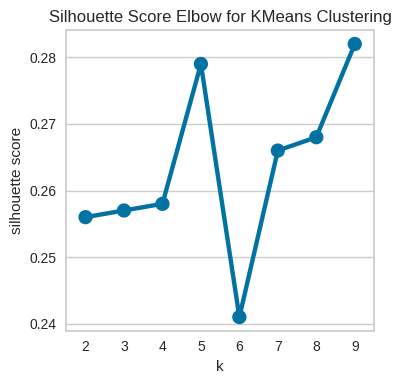

In [ ]:
# Evaluate KMeans at various values k, Silhouette score is open used
# Define a function to test KMeans at various k
# This approach uses silhouette score to evaluate KMeans
def optimal_kmeans(dataset, start=2, end=11):


    n_clu = []
    km_ss = []


    for n_clusters in range(start, end):

        # Create cluster labels
        kmeans = KMeans(n_clusters=n_clusters)
        labels = kmeans.fit_predict(dataset)


        silhouette_avg = round(silhouette_score(dataset, labels,
                                                random_state=1), 3)

        # Append score to lists
        km_ss.append(silhouette_avg)
        n_clu.append(n_clusters)

        print("No. Clusters: {}, Silhouette Score: {}, Change from Previous Cluster: {}".format(
            n_clusters,
            silhouette_avg,
            (km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]).round(3)))


        if n_clusters == end - 1:
            plt.figure(figsize=(4,4))

            plt.title('Silhouette Score Elbow for KMeans Clustering')
            plt.xlabel('k')
            plt.ylabel('silhouette score')
            sns.pointplot(x=n_clu, y=km_ss)
            plt.savefig('silhouette_score.png', format='png', dpi=300,
                        pad_inches=2.0)
            plt.tight_layout()
            plt.show()

optimal_kmeans(data_scaled, 2, 10)

- The best 'k' for silhouette score is 7 clusters
-  I did not take Clusters: 5 and Score: 0.279 because when k=5, distortion score in Elbow Method will be high
-  I did not take Clusters: 9 and Score: 0.282 because when k=9, this may lead to overfit because distortion score in  Elbow Method will be very small

In [ ]:
# Create a KMeans model
kmeans = KMeans(n_clusters=7)
# Fit the KMeans model
labels = kmeans.fit_predict(data_scaled)

the prediction labels

In [ ]:
labels

array([3, 3, 2, ..., 3, 1, 2], dtype=int32)

the data with prediction labels

In [ ]:
data_scaled

0         1         2         3         4         5         6   
0      -0.061639  1.587749 -0.997239  0.863162 -0.266260  0.010532 -0.009664  \
1       0.062537  1.587749  0.333407  0.863162 -0.266260  0.010532 -0.009664   
2       0.274457 -0.942825  0.333407 -1.158531 -0.249393  0.010532 -0.009382   
3       0.169587 -0.099301 -0.997239  0.863162 -0.249393  0.010532 -0.009382   
4      -2.475218  0.744224 -0.997239 -1.158531 -0.249393  0.010532 -0.009382   
...          ...       ...       ...       ...       ...       ...       ...   
169064  0.222810 -0.942825  0.333407 -1.158531 -0.263193  0.010532 -0.009786   
169065  0.492658 -0.099301  1.664054  0.863162 -0.257826  0.010532 -0.008646   
169066 -0.492703  1.587749  0.333407  0.863162 -0.266643  0.010532 -0.009701   
169067  0.195634 -0.099301  0.333407  0.863162 -0.266643  0.010532 -0.009585   
169068  0.349581 -0.942825 -0.997239 -1.158531 -0.266643  0.010532 -0.008749   

               7         8         9  cluster_labels  
0      -0.007284  0.095814  0.467804               3  
1      -0.007284  0.095814  0.467804               3  
2      -0.007293  0.095814  0.467804               2  
3      -0.007293  0.095814  0.467804               3  
4      -0.007293  0.095814  0.467804               2  
...          ...       ...       ...             ...  
169064 -0.007307  0.095814 -0.832663               2  
169065 -0.007246  0.095814 -0.832663               1  
169066 -0.007284  0.095814  1.118038               3  
169067 -0.007304  0.095814 -0.182430               1  
169068 -0.007284  0.095814  0.467804               2  

[169069 rows x 11 columns]

In [ ]:
data_scaled=data_scaled.drop('cluster_labels', axis=1)

In [ ]:
data_scaled

0         1         2         3         4         5         6   
0      -0.061639  1.587749 -0.997239  0.863162 -0.266260  0.010532 -0.009664  \
1       0.062537  1.587749  0.333407  0.863162 -0.266260  0.010532 -0.009664   
2       0.274457 -0.942825  0.333407 -1.158531 -0.249393  0.010532 -0.009382   
3       0.169587 -0.099301 -0.997239  0.863162 -0.249393  0.010532 -0.009382   
4      -2.475218  0.744224 -0.997239 -1.158531 -0.249393  0.010532 -0.009382   
...          ...       ...       ...       ...       ...       ...       ...   
169064  0.222810 -0.942825  0.333407 -1.158531 -0.263193  0.010532 -0.009786   
169065  0.492658 -0.099301  1.664054  0.863162 -0.257826  0.010532 -0.008646   
169066 -0.492703  1.587749  0.333407  0.863162 -0.266643  0.010532 -0.009701   
169067  0.195634 -0.099301  0.333407  0.863162 -0.266643  0.010532 -0.009585   
169068  0.349581 -0.942825 -0.997239 -1.158531 -0.266643  0.010532 -0.008749   

               7         8         9  
0      -0.007284  0.095814  0.467804  
1      -0.007284  0.095814  0.467804  
2      -0.007293  0.095814  0.467804  
3      -0.007293  0.095814  0.467804  
4      -0.007293  0.095814  0.467804  
...          ...       ...       ...  
169064 -0.007307  0.095814 -0.832663  
169065 -0.007246  0.095814 -0.832663  
169066 -0.007284  0.095814  1.118038  
169067 -0.007304  0.095814 -0.182430  
169068 -0.007284  0.095814  0.467804  

[169069 rows x 10 columns]

In [ ]:
# Create a TSNE model
tsne = TSNE(n_components=2, perplexity=30)
# Fit the TSNE model to the data
tsne_data = tsne.fit_transform(data_scaled)

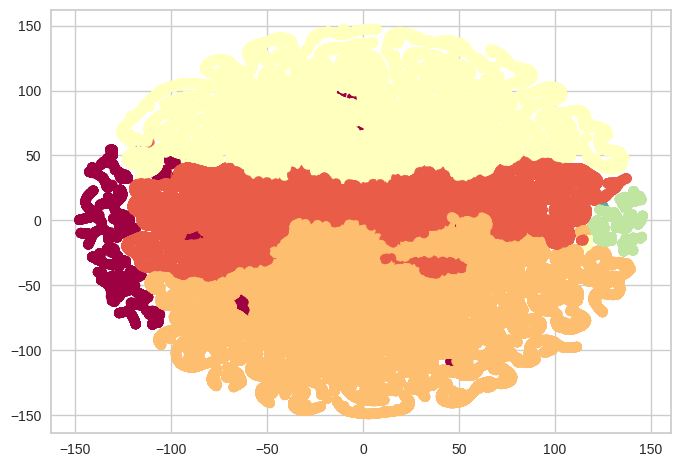

In [ ]:
# Plot the TSNE data
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=labels, cmap="Spectral")
plt.show()

- the best 'k' for silhouette score is 7 clusters and I will depend on the value of silhouette score than Elbow Method because silhouette score is more accurate than Elbow Method

- so that the best 'k' in question one is 7

- the quality of clusters is a bit good because the datapoints with the same features and properites in the one cluster , but may be there a bit overlaping between clusters .

# Question 2

**To make statistics for 'loyalty scores' based on prediction label , I will add score and prediction label to DataFrame**

In [ ]:
data_scaled['cluster_labels'] = labels

In [ ]:
data_scaled['score'] = score

In [ ]:
# count the frequent for each value in "cluster_labels"
data_scaled["cluster_labels"].value_counts()

cluster_labels
2    65931
3    53246
1    42710
0     5459
4     1690
5       21
6       12
Name: count, dtype: int64

In [ ]:
data_scaled

0         1         2         3         4         5         6   
0      -0.061639  1.587749 -0.997239  0.863162 -0.266260  0.010532 -0.009664  \
1       0.062537  1.587749  0.333407  0.863162 -0.266260  0.010532 -0.009664   
2       0.274457 -0.942825  0.333407 -1.158531 -0.249393  0.010532 -0.009382   
3       0.169587 -0.099301 -0.997239  0.863162 -0.249393  0.010532 -0.009382   
4      -2.475218  0.744224 -0.997239 -1.158531 -0.249393  0.010532 -0.009382   
...          ...       ...       ...       ...       ...       ...       ...   
169064  0.222810 -0.942825  0.333407 -1.158531 -0.263193  0.010532 -0.009786   
169065  0.492658 -0.099301  1.664054  0.863162 -0.257826  0.010532 -0.008646   
169066 -0.492703  1.587749  0.333407  0.863162 -0.266643  0.010532 -0.009701   
169067  0.195634 -0.099301  0.333407  0.863162 -0.266643  0.010532 -0.009585   
169068  0.349581 -0.942825 -0.997239 -1.158531 -0.266643  0.010532 -0.008749   

               7         8         9  cluster_labels      score  
0      -0.007284  0.095814  0.467804               3   0.134077  
1      -0.007284  0.095814  0.467804               3 -33.219281  
2      -0.007293  0.095814  0.467804               2   0.884295  
3      -0.007293  0.095814  0.467804               3  -0.293427  
4      -0.007293  0.095814  0.467804               2  -0.100774  
...          ...       ...       ...             ...        ...  
169064 -0.007307  0.095814 -0.832663               2  -0.746495  
169065 -0.007246  0.095814 -0.832663               1  -1.801895  
169066 -0.007284  0.095814  1.118038               3   1.555892  
169067 -0.007304  0.095814 -0.182430               1   0.457434  
169068 -0.007284  0.095814  0.467804               2   0.054515  

[169069 rows x 12 columns]

In [ ]:
# count the frequent for each value in "score"
data_scaled["score"].value_counts()

score
-33.219281    1787
 0.000000      697
 1.000000       76
-1.000000       43
-0.584963       19
              ... 
 1.789847        1
 0.482871        1
-3.332248        1
 3.409391        1
 0.054515        1
Name: count, Length: 164627, dtype: int64

Get statistics such as "Mean-Median-Std-Min-Max" on score based on making group by on cluster_labels

In [ ]:
gb=data_scaled.groupby("cluster_labels").agg({'score':['mean',lambda x: x.median(),lambda x: x.std(),'min','max']},header='False')

Rename the name of each column

In [ ]:
gb = gb.rename(columns={"<lambda_0>": "median","<lambda_1>":'std'})

In [ ]:
gb

score                                          
                    mean    median       std        min        max
cluster_labels                                                    
0              -0.378680 -0.042833  3.741408 -33.219281   9.228426
1              -0.418607 -0.026924  3.972788 -33.219281  15.994455
2              -0.391107 -0.042179  3.767275 -33.219281  17.965068
3              -0.359797 -0.021756  3.743343 -33.219281  15.171020
4              -0.222404 -0.059559  3.039450 -33.219281   7.318136
5               0.111196  0.247248  0.924753  -2.018208   2.493922
6               0.010223 -0.043769  0.927434  -1.356701   1.505621

The table shows that the mean, median, and standard deviation are all relatively similar for clusters 0, 1, 2, and 3. This detect that these clusters are fairly evenly distributed and have similar values. Cluster 4 has a lower mean and median, and a higher standard deviation, detect that this cluster is less evenly distributed . Clusters 5 and 6 have much lower means and medians, and much higher standard deviations, suggesting that these clusters are very unevenly distributed and have some outliers.

In [ ]:
data_scaled

0         1         2         3         4         5         6   
0      -0.061639  1.587749 -0.997239  0.863162 -0.266260  0.010532 -0.009664  \
1       0.062537  1.587749  0.333407  0.863162 -0.266260  0.010532 -0.009664   
2       0.274457 -0.942825  0.333407 -1.158531 -0.249393  0.010532 -0.009382   
3       0.169587 -0.099301 -0.997239  0.863162 -0.249393  0.010532 -0.009382   
4      -2.475218  0.744224 -0.997239 -1.158531 -0.249393  0.010532 -0.009382   
...          ...       ...       ...       ...       ...       ...       ...   
169064  0.222810 -0.942825  0.333407 -1.158531 -0.263193  0.010532 -0.009786   
169065  0.492658 -0.099301  1.664054  0.863162 -0.257826  0.010532 -0.008646   
169066 -0.492703  1.587749  0.333407  0.863162 -0.266643  0.010532 -0.009701   
169067  0.195634 -0.099301  0.333407  0.863162 -0.266643  0.010532 -0.009585   
169068  0.349581 -0.942825 -0.997239 -1.158531 -0.266643  0.010532 -0.008749   

               7         8         9  cluster_labels      score  
0      -0.007284  0.095814  0.467804               3   0.134077  
1      -0.007284  0.095814  0.467804               3 -33.219281  
2      -0.007293  0.095814  0.467804               2   0.884295  
3      -0.007293  0.095814  0.467804               3  -0.293427  
4      -0.007293  0.095814  0.467804               2  -0.100774  
...          ...       ...       ...             ...        ...  
169064 -0.007307  0.095814 -0.832663               2  -0.746495  
169065 -0.007246  0.095814 -0.832663               1  -1.801895  
169066 -0.007284  0.095814  1.118038               3   1.555892  
169067 -0.007304  0.095814 -0.182430               1   0.457434  
169068 -0.007284  0.095814  0.467804               2   0.054515  

[169069 rows x 12 columns]

After finishing statistics for 'loyalty scores' , I will drop 'score' and 'prediction label'

In [ ]:
data_scaled=data_scaled.drop('cluster_labels', axis=1)

In [ ]:
data_scaled=data_scaled.drop('score', axis=1)

In [ ]:
data_scaled

0         1         2         3         4         5         6   
0      -0.061639  1.587749 -0.997239  0.863162 -0.266260  0.010532 -0.009664  \
1       0.062537  1.587749  0.333407  0.863162 -0.266260  0.010532 -0.009664   
2       0.274457 -0.942825  0.333407 -1.158531 -0.249393  0.010532 -0.009382   
3       0.169587 -0.099301 -0.997239  0.863162 -0.249393  0.010532 -0.009382   
4      -2.475218  0.744224 -0.997239 -1.158531 -0.249393  0.010532 -0.009382   
...          ...       ...       ...       ...       ...       ...       ...   
169064  0.222810 -0.942825  0.333407 -1.158531 -0.263193  0.010532 -0.009786   
169065  0.492658 -0.099301  1.664054  0.863162 -0.257826  0.010532 -0.008646   
169066 -0.492703  1.587749  0.333407  0.863162 -0.266643  0.010532 -0.009701   
169067  0.195634 -0.099301  0.333407  0.863162 -0.266643  0.010532 -0.009585   
169068  0.349581 -0.942825 -0.997239 -1.158531 -0.266643  0.010532 -0.008749   

               7         8         9  
0      -0.007284  0.095814  0.467804  
1      -0.007284  0.095814  0.467804  
2      -0.007293  0.095814  0.467804  
3      -0.007293  0.095814  0.467804  
4      -0.007293  0.095814  0.467804  
...          ...       ...       ...  
169064 -0.007307  0.095814 -0.832663  
169065 -0.007246  0.095814 -0.832663  
169066 -0.007284  0.095814  1.118038  
169067 -0.007304  0.095814 -0.182430  
169068 -0.007284  0.095814  0.467804  

[169069 rows x 10 columns]

# Question 3

To make "PCA" , I will rename the name of columns from numerical data(0,1,2,3....) into string(purchase_amount , feature_1 , feature_2....)

In [ ]:
# List of new column names
new_column_names = ["purchase_amount","feature_1","feature_2","feature_3","numerical_1","active_months_lag3","avg_purchases_lag6","avg_sales_lag12","active_months_lag12","category_2"]
# Change the names of the columns
data_scaled.columns = new_column_names
# Print the DataFrame with the new column names
data_scaled=pd.DataFrame(data_scaled)
data_scaled.head()

purchase_amount  feature_1  feature_2  feature_3  numerical_1   
0        -0.061639   1.587749  -0.997239   0.863162    -0.266260  \
1         0.062537   1.587749   0.333407   0.863162    -0.266260   
2         0.274457  -0.942825   0.333407  -1.158531    -0.249393   
3         0.169587  -0.099301  -0.997239   0.863162    -0.249393   
4        -2.475218   0.744224  -0.997239  -1.158531    -0.249393   

   active_months_lag3  avg_purchases_lag6  avg_sales_lag12   
0            0.010532           -0.009664        -0.007284  \
1            0.010532           -0.009664        -0.007284   
2            0.010532           -0.009382        -0.007293   
3            0.010532           -0.009382        -0.007293   
4            0.010532           -0.009382        -0.007293   

   active_months_lag12  category_2  
0             0.095814    0.467804  
1             0.095814    0.467804  
2             0.095814    0.467804  
3             0.095814    0.467804  
4             0.095814    0.467804

**I will use "PCA" to reduce the dimensions of data**

Before training a machine learning model, PCA can be used to reduce the dimensionality of the data. This can help to improve the model's performance by making the relationships between the features easier to learn.

In [ ]:
# Create the PCA model
import pandas as pd
from sklearn.decomposition import PCA
pca = PCA(n_components=4, random_state=0)
data_scale = pca.fit_transform(data_scaled)

the number of PCA Components is set to 4. This means that the PCA algorithm will try to find 4 orthogonal directions in the data that capture as much of the variance in the data as possible.

In [ ]:
data_scale

array([[-9.13105824e-02,  1.81732399e+00,  7.10347995e-02,
        -4.50340831e-02],
       [-8.78290958e-02,  1.69809240e+00,  1.51247606e-01,
        -6.10795140e-01],
       [ 3.62903657e-02, -1.49988242e+00,  7.78172752e-02,
        -5.86232931e-01],
       ...,
       [-9.81191269e-02,  1.67092657e+00,  2.29039740e-01,
        -9.28820672e-01],
       [-4.17271458e-02,  5.16482157e-01, -1.10860559e-03,
        -2.87691869e-01],
       [ 3.64922143e-02, -1.37543862e+00,  2.15815917e-02,
        -6.06172496e-02]])

the result of "PCA" is "Array" , I will convert it again into "DataFrame"

In [ ]:
data_scale = pd.DataFrame(data_scale)
data_scale.describe()
data_scale

0         1         2         3
0      -0.091311  1.817324  0.071035 -0.045034
1      -0.087829  1.698092  0.151248 -0.610795
2       0.036290 -1.499882  0.077817 -0.586233
3      -0.045478  0.623281  0.061117 -0.128618
4      -0.049747 -0.243095 -0.245009  0.435113
...          ...       ...       ...       ...
169064  0.038843 -1.472278 -0.195947  0.217233
169065 -0.033240  0.415241 -0.040200 -0.472716
169066 -0.098119  1.670927  0.229040 -0.928821
169067 -0.041727  0.516482 -0.001109 -0.287692
169068  0.036492 -1.375439  0.021582 -0.060617

[169069 rows x 4 columns]

I Will use The two Techniques again after "PCA" to get the best 'k' based on the data :

1- Elbow Method

2- Silhouette Coefficient

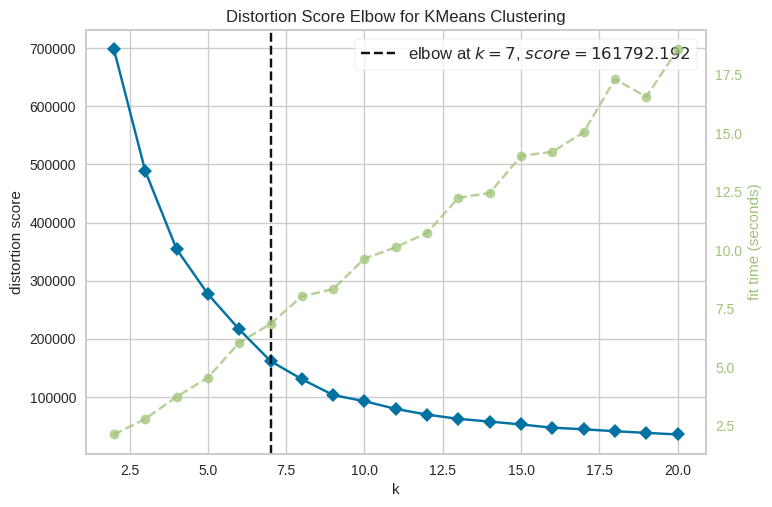

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Now, we can perform clustering on the above data
# Visualize performance of KMeans at various values k
# This approaches uses distortion score to evaluate KMeans
model_2 = KMeans()
visualizer = KElbowVisualizer(model_2, k=(2, 21))
visualizer.fit(data_scale)
visualizer.show()

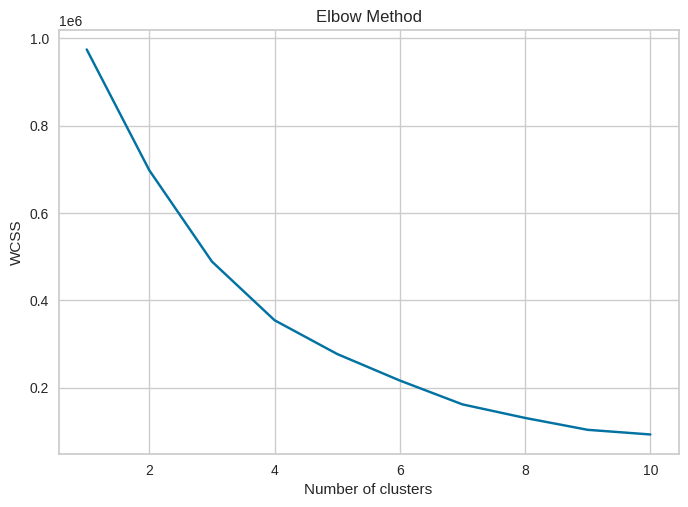

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scale)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**the best 'k' based on Elbow Method is 7**

In [ ]:
data_scale

0         1         2         3
0      -0.091311  1.817324  0.071035 -0.045034
1      -0.087829  1.698092  0.151248 -0.610795
2       0.036290 -1.499882  0.077817 -0.586233
3      -0.045478  0.623281  0.061117 -0.128618
4      -0.049747 -0.243095 -0.245009  0.435113
...          ...       ...       ...       ...
169064  0.038843 -1.472278 -0.195947  0.217233
169065 -0.033240  0.415241 -0.040200 -0.472716
169066 -0.098119  1.670927  0.229040 -0.928821
169067 -0.041727  0.516482 -0.001109 -0.287692
169068  0.036492 -1.375439  0.021582 -0.060617

[169069 rows x 4 columns]

The silhouette score indicates how well a data point fits within its cluster. It is computed by averaging the distance between a data point and all other data points in its cluster, as well as the distance between the data point and the nearest cluster. A high silhouette score suggests a well-clustered data point, whereas a low silhouette value indicates a badly clustered data point.

No. Clusters: 2, Silhouette Score: 0.986, Change from Previous Cluster: 0.0
No. Clusters: 3, Silhouette Score: 0.452, Change from Previous Cluster: -0.534
No. Clusters: 4, Silhouette Score: 0.451, Change from Previous Cluster: -0.001
No. Clusters: 5, Silhouette Score: 0.406, Change from Previous Cluster: -0.045
No. Clusters: 6, Silhouette Score: 0.42, Change from Previous Cluster: 0.014
No. Clusters: 7, Silhouette Score: 0.445, Change from Previous Cluster: 0.025
No. Clusters: 8, Silhouette Score: 0.473, Change from Previous Cluster: 0.028
No. Clusters: 9, Silhouette Score: 0.488, Change from Previous Cluster: 0.015


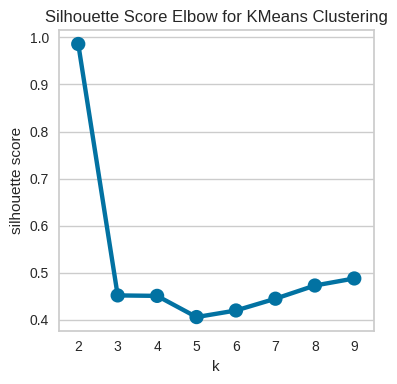

In [ ]:
# Evaluate KMeans at various values k, Silhouette score is open used
# Define a function to test KMeans at various k
# This approach uses silhouette score to evaluate KMeans
def optimal_kmeans(dataset, start=2, end=11):


    # Create empty lists to store values for plotting graphs
    n_clu = []
    km_ss = []

    # Create a for loop to find optimal n_clusters
    for n_clusters in range(start, end):

        # Create cluster labels
        kmeans = KMeans(n_clusters=n_clusters)
        labels = kmeans.fit_predict(dataset)

        # Calcualte model performance
        silhouette_avg = round(silhouette_score(dataset, labels,
                                                random_state=1), 3)

        # Append score to lists
        km_ss.append(silhouette_avg)
        n_clu.append(n_clusters)

        print("No. Clusters: {}, Silhouette Score: {}, Change from Previous Cluster: {}".format(
            n_clusters,
            silhouette_avg,
            (km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]).round(3)))

        # Plot graph at the end of loop
        if n_clusters == end - 1:
            plt.figure(figsize=(4,4))

            plt.title('Silhouette Score Elbow for KMeans Clustering')
            plt.xlabel('k')
            plt.ylabel('silhouette score')
            sns.pointplot(x=n_clu, y=km_ss)
            plt.savefig('silhouette_score.png', format='png', dpi=300,
                        pad_inches=2.0)
            plt.tight_layout()
            plt.show()

optimal_kmeans(data_scale, 2, 10)

- The best 'k' for silhouette score is 8 clusters
- I did not take Clusters: 2 and Score: 0.986 because when k=5, distortion score in Elbow Method will be high
- I did not take Clusters: 9 and Score: 0.488 because when k=9, this may lead to overfit because distortion score in Elbow Method will be very small

In [ ]:
# create KMeans model
kmeans = KMeans(n_clusters=8)
# Fit the KMeans model to the data
labels = kmeans.fit_predict(data_scale)

In [ ]:
# Choose the number of clusters
k =8
# Create the KMeans model
model_3 = KMeans(n_clusters=k)
# Fit the model
model_3.fit(data_scale)
# Predict the cluster
labels = model_3.predict(data_scale)

In [ ]:
data_scale=data_scale.drop('cluster_labels', axis=1)

The dimensionality reduction approach T-distributed stochastic neighbour embedding (t-SNE) is used to visualise high-dimensional data. It is a strategy for reducing dimensionality that is non-linear.

In [ ]:
# Create a TSNE model
tsne = TSNE(n_components=2, perplexity=30)
# Fit the TSNE model to the data
tsne_data = tsne.fit_transform(data_scale)

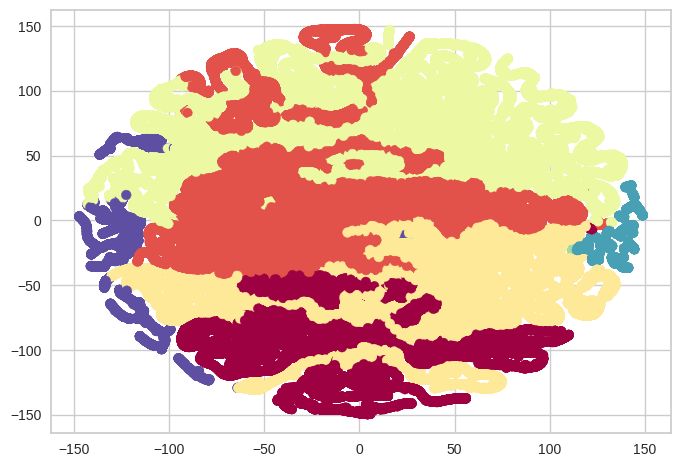

In [ ]:
# Plot the TSNE data
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=labels, cmap="Spectral")
plt.show()

plot the same visualization in 3D

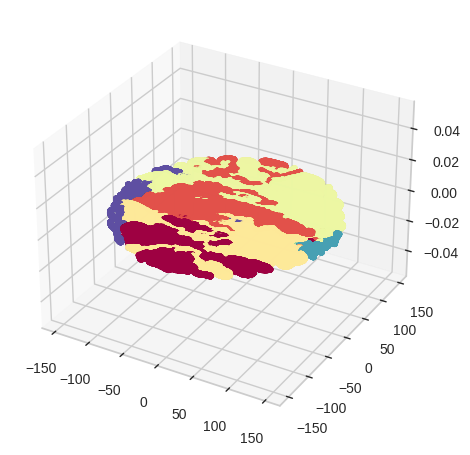

In [ ]:
tsne_data3d = np.zeros((169069, 1))

# Plot the TSNE data in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_data[:, 0], tsne_data[:, 1], tsne_data3d, c=labels, cmap="Spectral")

Add centroid for each cluster

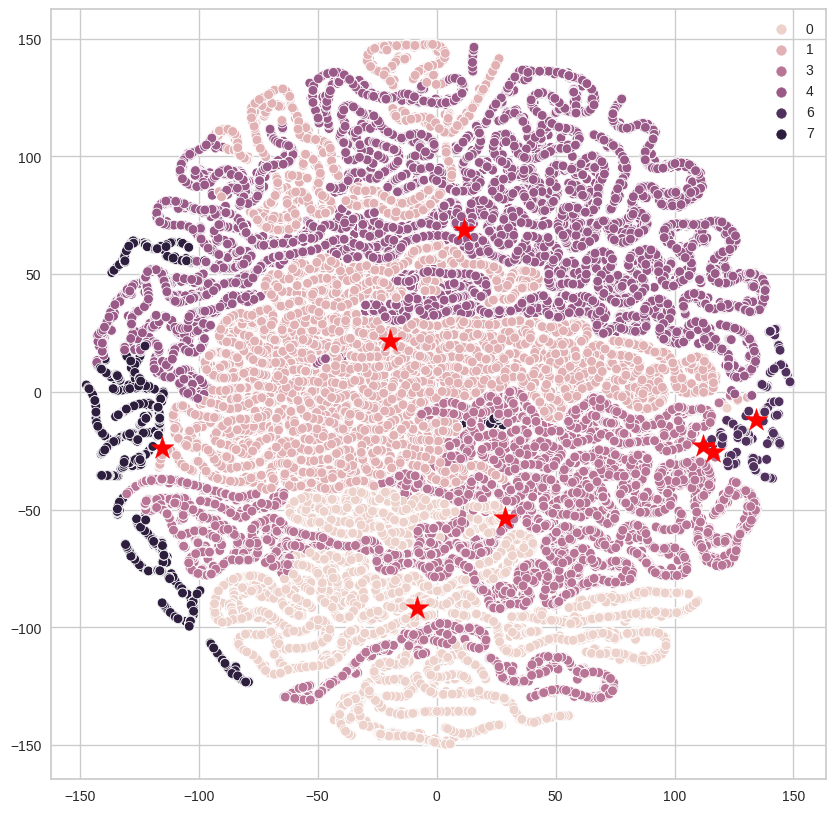

In [ ]:
# Create a scatter plot of the TSNE features.
plt.figure(figsize=(10, 10))
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=labels)

# Plot the centroids of the clusters.
for i in range(kmeans.n_clusters):
    plt.scatter(tsne_data[labels == i, 0].mean(), tsne_data[labels == i, 1].mean(),marker="*",color="red",s=300)

plt.show()

**Result from Question 1 and Questio 2 :**

- the quality of clusters after "PCA" is more accurate than the result of clusters in question 1 because in question one the Silhouette Score for best 'K' is 0.266 and after "PCA" the Silhouette Score for best 'K' is 0.473

- A higher silhouette score indicates that the data points are better clustered

# Question 4

To make statistics for 'loyalty scores' based on prediction label , I will add score and prediction label to DataFrame

In [ ]:
data_scale['score'] = score

In [ ]:
data_scale['cluster_labels'] = labels

Get statistics such as "Mean-Median-Std-Min-Max" on score based on making group by on cluster_labels

In [ ]:
gb2=data_scale.groupby("cluster_labels").agg({'score':['mean',lambda x: x.median(),lambda x: x.std(),'min','max']},header='False')

In [ ]:
gb2 = gb2.rename(columns={"<lambda_0>": "median","<lambda_1>":'std'})

In [ ]:
gb2

score                                          
                    mean    median       std        min        max
cluster_labels                                                    
0              -0.359743 -0.018986  3.711479 -33.219281  17.965068
1              -0.403009 -0.026236  3.923398 -33.219281  15.294621
2               0.010223 -0.043769  0.927434  -1.356701   1.505621
3              -0.402809 -0.053908  3.777235 -33.219281  17.675716
4              -0.374518 -0.024991  3.781110 -33.219281  15.994455
5               0.111196  0.247248  0.924753  -2.018208   2.493922
6              -0.222404 -0.059559  3.039450 -33.219281   7.318136
7              -0.382860 -0.042664  3.709737 -33.219281   9.228426

- Based on this analysis, it is possible to conclude that there are three main
 groups of data points, with cluster 2 being somewhat intermediate between the two groups.

- Clusters 0, 1, 4, and 7 are likely to be more similar to each other than
  they are to clusters 2, 5, and 6.

# Question 5

Frequent pattern mining is a valuable data mining technique for detecting patterns in large datasets. Itemsets or subsequences that occur frequently in a dataset are referred to as frequent patterns.

I will apply the idea of Frequent pattern on 'merchant_category_id' in "join_horizontally" table because 'merchant_category_id' represent transaction types

In [ ]:
# Select the merchant_category_id and score columns and store them in new_table DataFrame
new_table = join_horizontally.loc[:, ['merchant_category_id','score']]

In [ ]:
new_table

merchant_category_id     score
0                        123  0.134077
1                         67  0.884295
2                        146 -0.264433
3                         42  0.812872
4                         73  1.288514
...                      ...       ...
198969                    50  0.362965
198970                   192 -0.085357
198971                   115  1.530061
198972                   184 -0.600063
198973                    45 -1.073077

[198974 rows x 2 columns]

Take an copy from new_table DataFrame , the name of copy is "new_table_3"

In [ ]:
new_table_3 = new_table.copy()

In [ ]:
new_table_3

merchant_category_id     score
0                        123  0.134077
1                         67  0.884295
2                        146 -0.264433
3                         42  0.812872
4                         73  1.288514
...                      ...       ...
198969                    50  0.362965
198970                   192 -0.085357
198971                   115  1.530061
198972                   184 -0.600063
198973                    45 -1.073077

[198974 rows x 2 columns]

Get the datatypes for two features in "new_table" DataFrame

In [ ]:
new_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198974 entries, 0 to 198973
Data columns (total 2 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   merchant_category_id  198974 non-null  int64  
 1   score                 198974 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 3.0 MB


the input to apriori of Frequent pattern must be 'categorical' , so that i will convert "merchant_category_id" into categorical datatype

In [ ]:
new_table["merchant_category_id"]=new_table["merchant_category_id"].astype('category')

Check again the datatype of "merchant_category_id"

In [ ]:
new_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198974 entries, 0 to 198973
Data columns (total 2 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   merchant_category_id  198974 non-null  category
 1   score                 198974 non-null  float64 
dtypes: category(1), float64(1)
memory usage: 1.9 MB


I will drop score because I interested in only "merchant_category_id" , but i will store the score in variable "score" because i will use it later

In [ ]:
score= new_table.drop('score', axis=1,inplace=True)

In [ ]:
new_table

merchant_category_id
0                       123
1                        67
2                       146
3                        42
4                        73
...                     ...
198969                   50
198970                  192
198971                  115
198972                  184
198973                   45

[198974 rows x 1 columns]

In [ ]:
new_table_3

merchant_category_id     score
0                        123  0.134077
1                         67  0.884295
2                        146 -0.264433
3                         42  0.812872
4                         73  1.288514
...                      ...       ...
198969                    50  0.362965
198970                   192 -0.085357
198971                   115  1.530061
198972                   184 -0.600063
198973                    45 -1.073077

[198974 rows x 2 columns]

In [ ]:
# Import necessary libraries
# !pip install mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

The input to frequent patterns must be encoding so that i will use "get_dummies" function to encode "merchant_category_id"

In [ ]:
test = pd.get_dummies(new_table)
test

merchant_category_id_1  merchant_category_id_2   
0                        False                   False  \
1                        False                   False   
2                        False                   False   
3                        False                   False   
4                        False                   False   
...                        ...                     ...   
198969                   False                   False   
198970                   False                   False   
198971                   False                   False   
198972                   False                   False   
198973                   False                   False   

        merchant_category_id_3  merchant_category_id_4   
0                        False                   False  \
1                        False                   False   
2                        False                   False   
3                        False                   False   
4                        False                   False   
...                        ...                     ...   
198969                   False                   False   
198970                   False                   False   
198971                   False                   False   
198972                   False                   False   
198973                   False                   False   

        merchant_category_id_5  merchant_category_id_6   
0                        False                   False  \
1                        False                   False   
2                        False                   False   
3                        False                   False   
4                        False                   False   
...                        ...                     ...   
198969                   False                   False   
198970                   False                   False   
198971                   False                   False   
198972                   False                   False   
198973                   False                   False   

        merchant_category_id_7  merchant_category_id_8   
0                        False                   False  \
1                        False                   False   
2                        False                   False   
3                        False                   False   
4                        False                   False   
...                        ...                     ...   
198969                   False                   False   
198970                   False                   False   
198971                   False                   False   
198972                   False                   False   
198973                   False                   False   

        merchant_category_id_9  merchant_category_id_10  ...   
0                        False                    False  ...  \
1                        False                    False  ...   
2                        False                    False  ...   
3                        False                    False  ...   
4                        False                    False  ...   
...                        ...                      ...  ...   
198969                   False                    False  ...   
198970                   False                    False  ...   
198971                   False                    False  ...   
198972                   False                    False  ...   
198973                   False                    False  ...   

        merchant_category_id_1445  merchant_category_id_1462   
0                           False                      False  \
1                           False                      False   
2                           False                      False   
3                           False                      False   
4                           False                      False   
...                           ...                        ...   
198

I will pick min support threshold by make many trials(three trial)

trial 1:

This means that All itemsets that appear have a support of at least 0.005, or 0.5%, in the dataset. This means that they occur together in the dataset at least 0.5% of the time.

In [ ]:
frequent_itemsets_1 = apriori(test, min_support=0.005, use_colnames=True)
print(frequent_itemsets_1)

     support                   itemsets
0   0.006830   (merchant_category_id_1)
1   0.005478   (merchant_category_id_2)
2   0.005458   (merchant_category_id_3)
3   0.005604   (merchant_category_id_4)
4   0.006222   (merchant_category_id_5)
..       ...                        ...
67  0.005528  (merchant_category_id_68)
68  0.005272  (merchant_category_id_69)
69  0.005252  (merchant_category_id_70)
70  0.005172  (merchant_category_id_71)
71  0.005001  (merchant_category_id_73)

[72 rows x 2 columns]


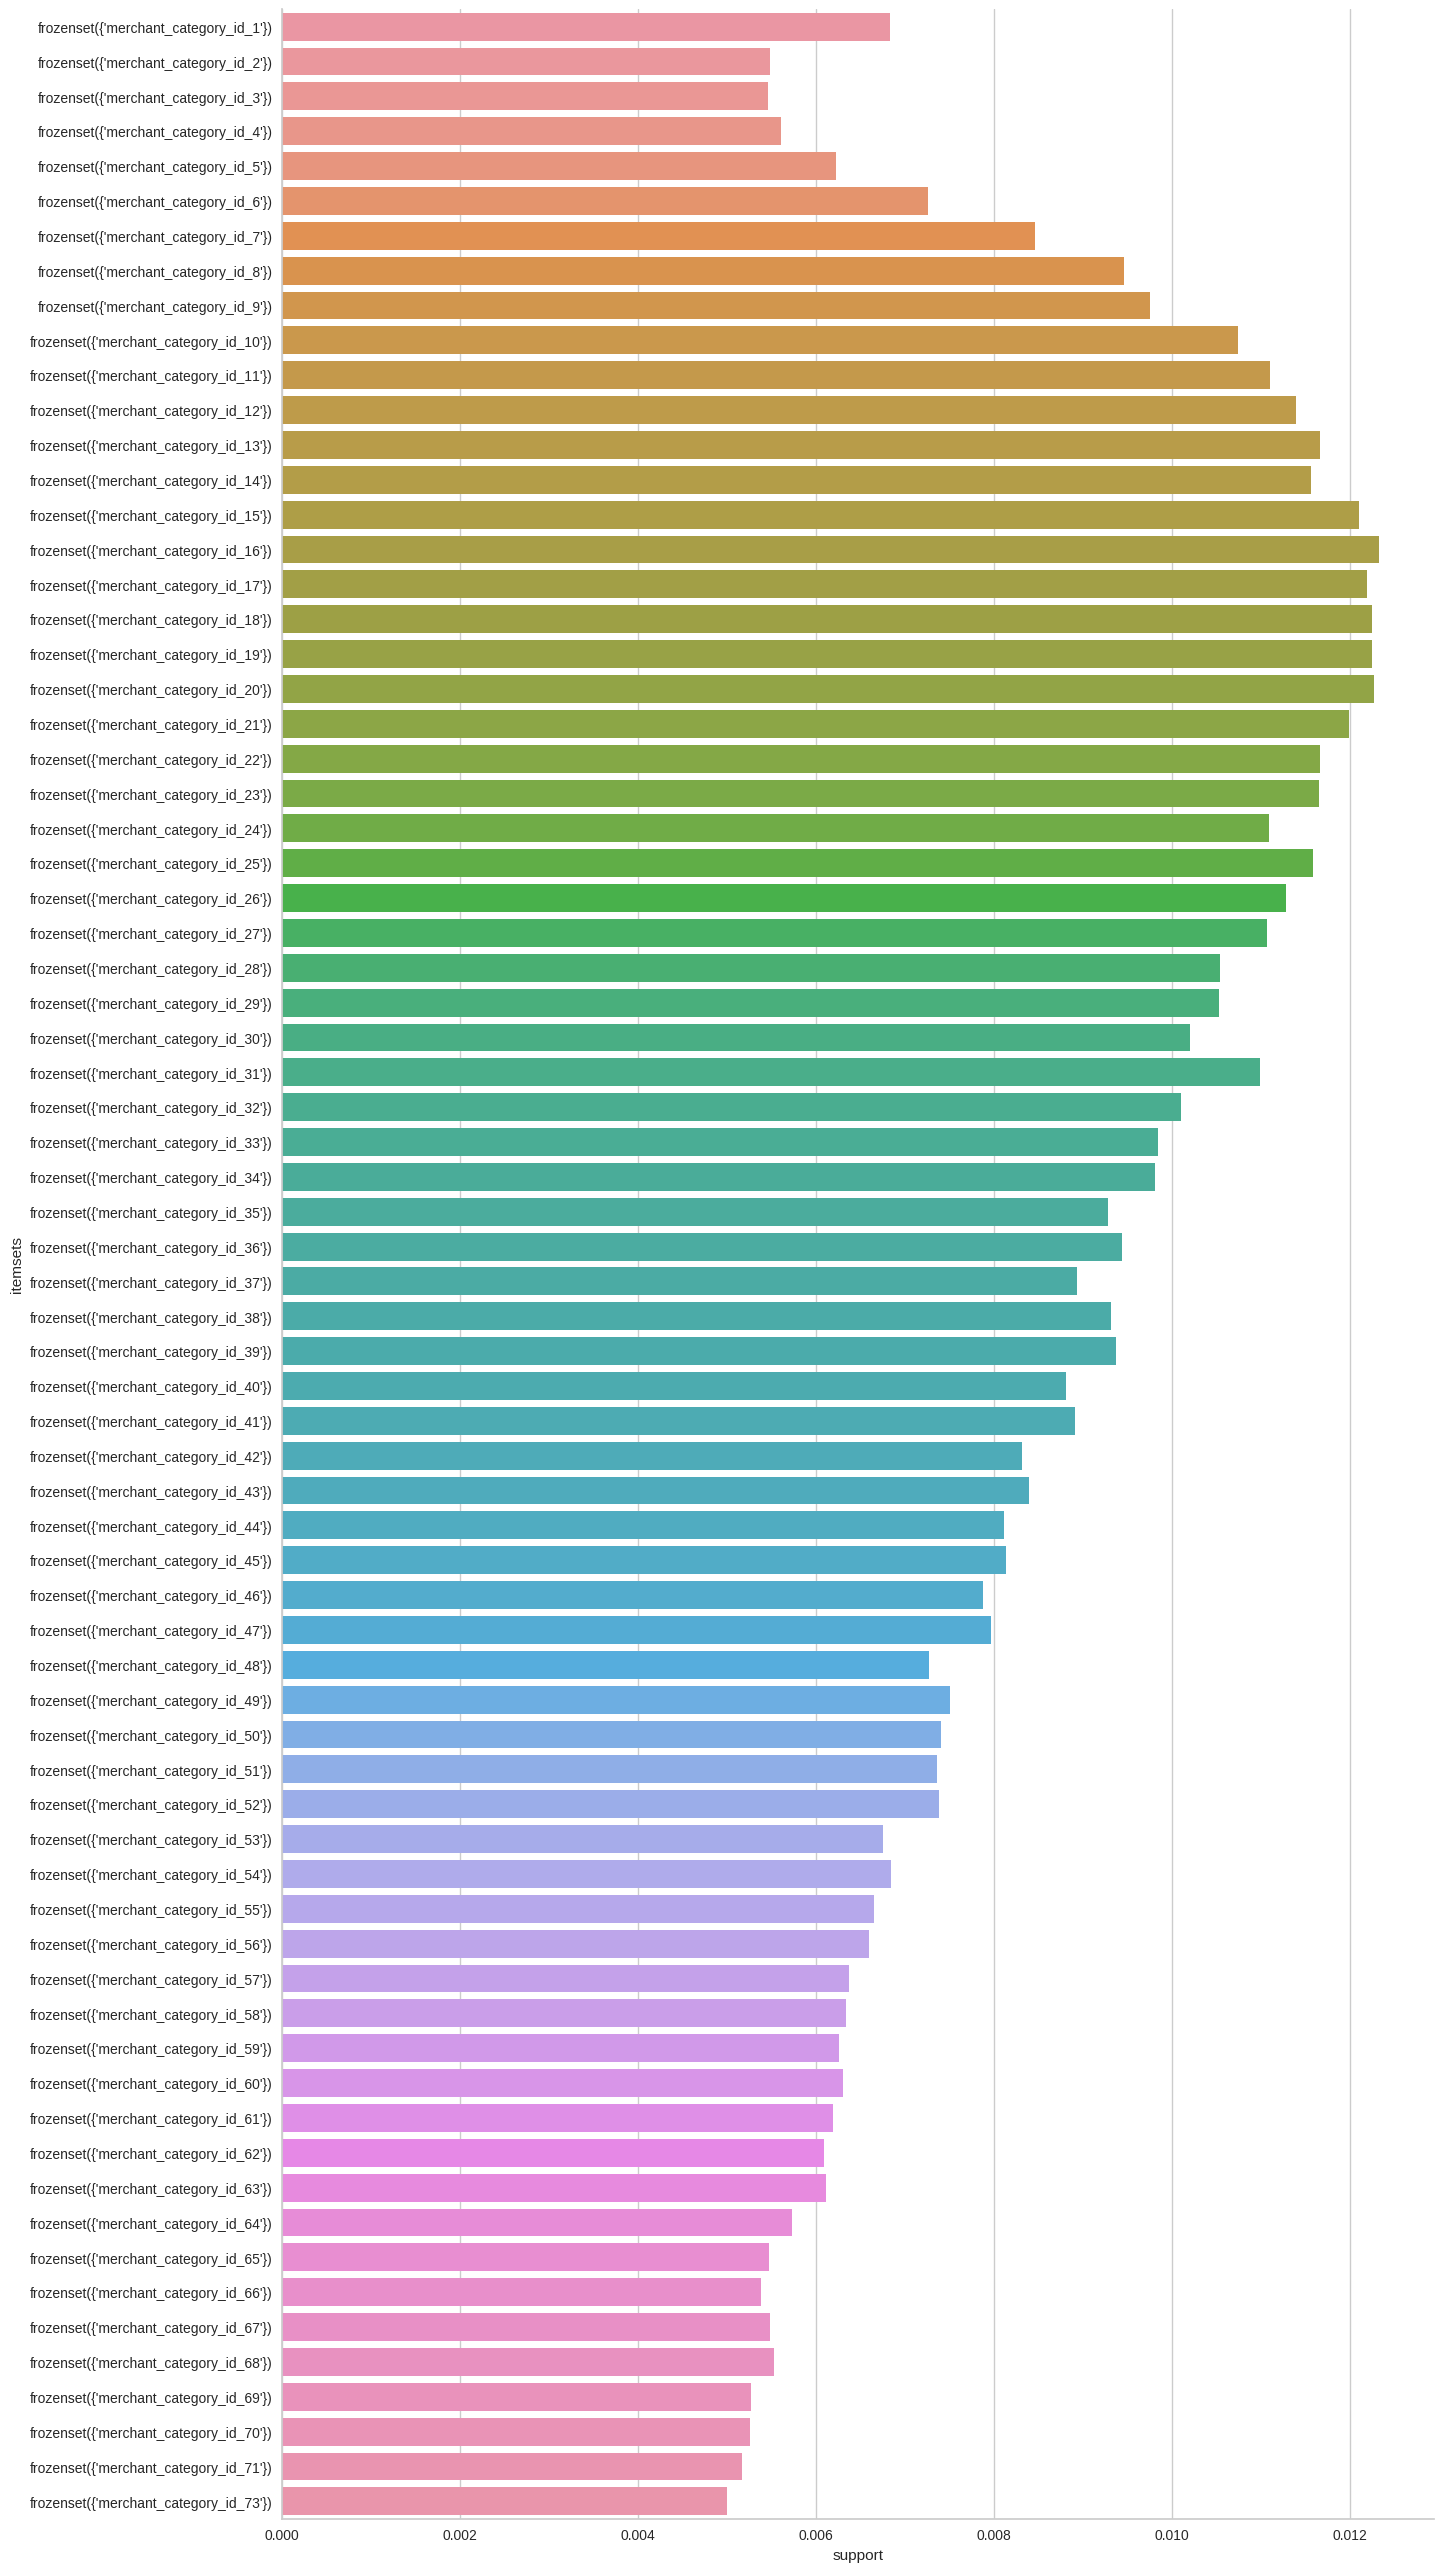

In [ ]:
import seaborn as sns
catplot =sns.catplot(y="itemsets", x="support",data=frequent_itemsets_1,kind="bar")
# Change the size of the plot
catplot.fig.set_size_inches(30, 30)
# Show the plot
plt.show()

In [ ]:
print(np.max( frequent_itemsets_1["support"]))

0.012323218108898651


- from the previous plot we can detect that The most frequent pattern in the list you provided is (merchant_category_id_16). It has a support of 0.012323218108898651
- This means that All itemsetsthat appear have a support of at least 0.005, or 0.5%, in the dataset. This means that they occur together in the dataset at least 0.5% of the time

Trial 2:

In [ ]:
frequent_itemsets_2 = apriori(test, min_support=0.002, use_colnames=True)
print(frequent_itemsets_2)

      support                    itemsets
0    0.006830    (merchant_category_id_1)
1    0.005478    (merchant_category_id_2)
2    0.005458    (merchant_category_id_3)
3    0.005604    (merchant_category_id_4)
4    0.006222    (merchant_category_id_5)
..        ...                         ...
130  0.002131  (merchant_category_id_132)
131  0.002136  (merchant_category_id_134)
132  0.002061  (merchant_category_id_135)
133  0.002035  (merchant_category_id_137)
134  0.002051  (merchant_category_id_140)

[135 rows x 2 columns]


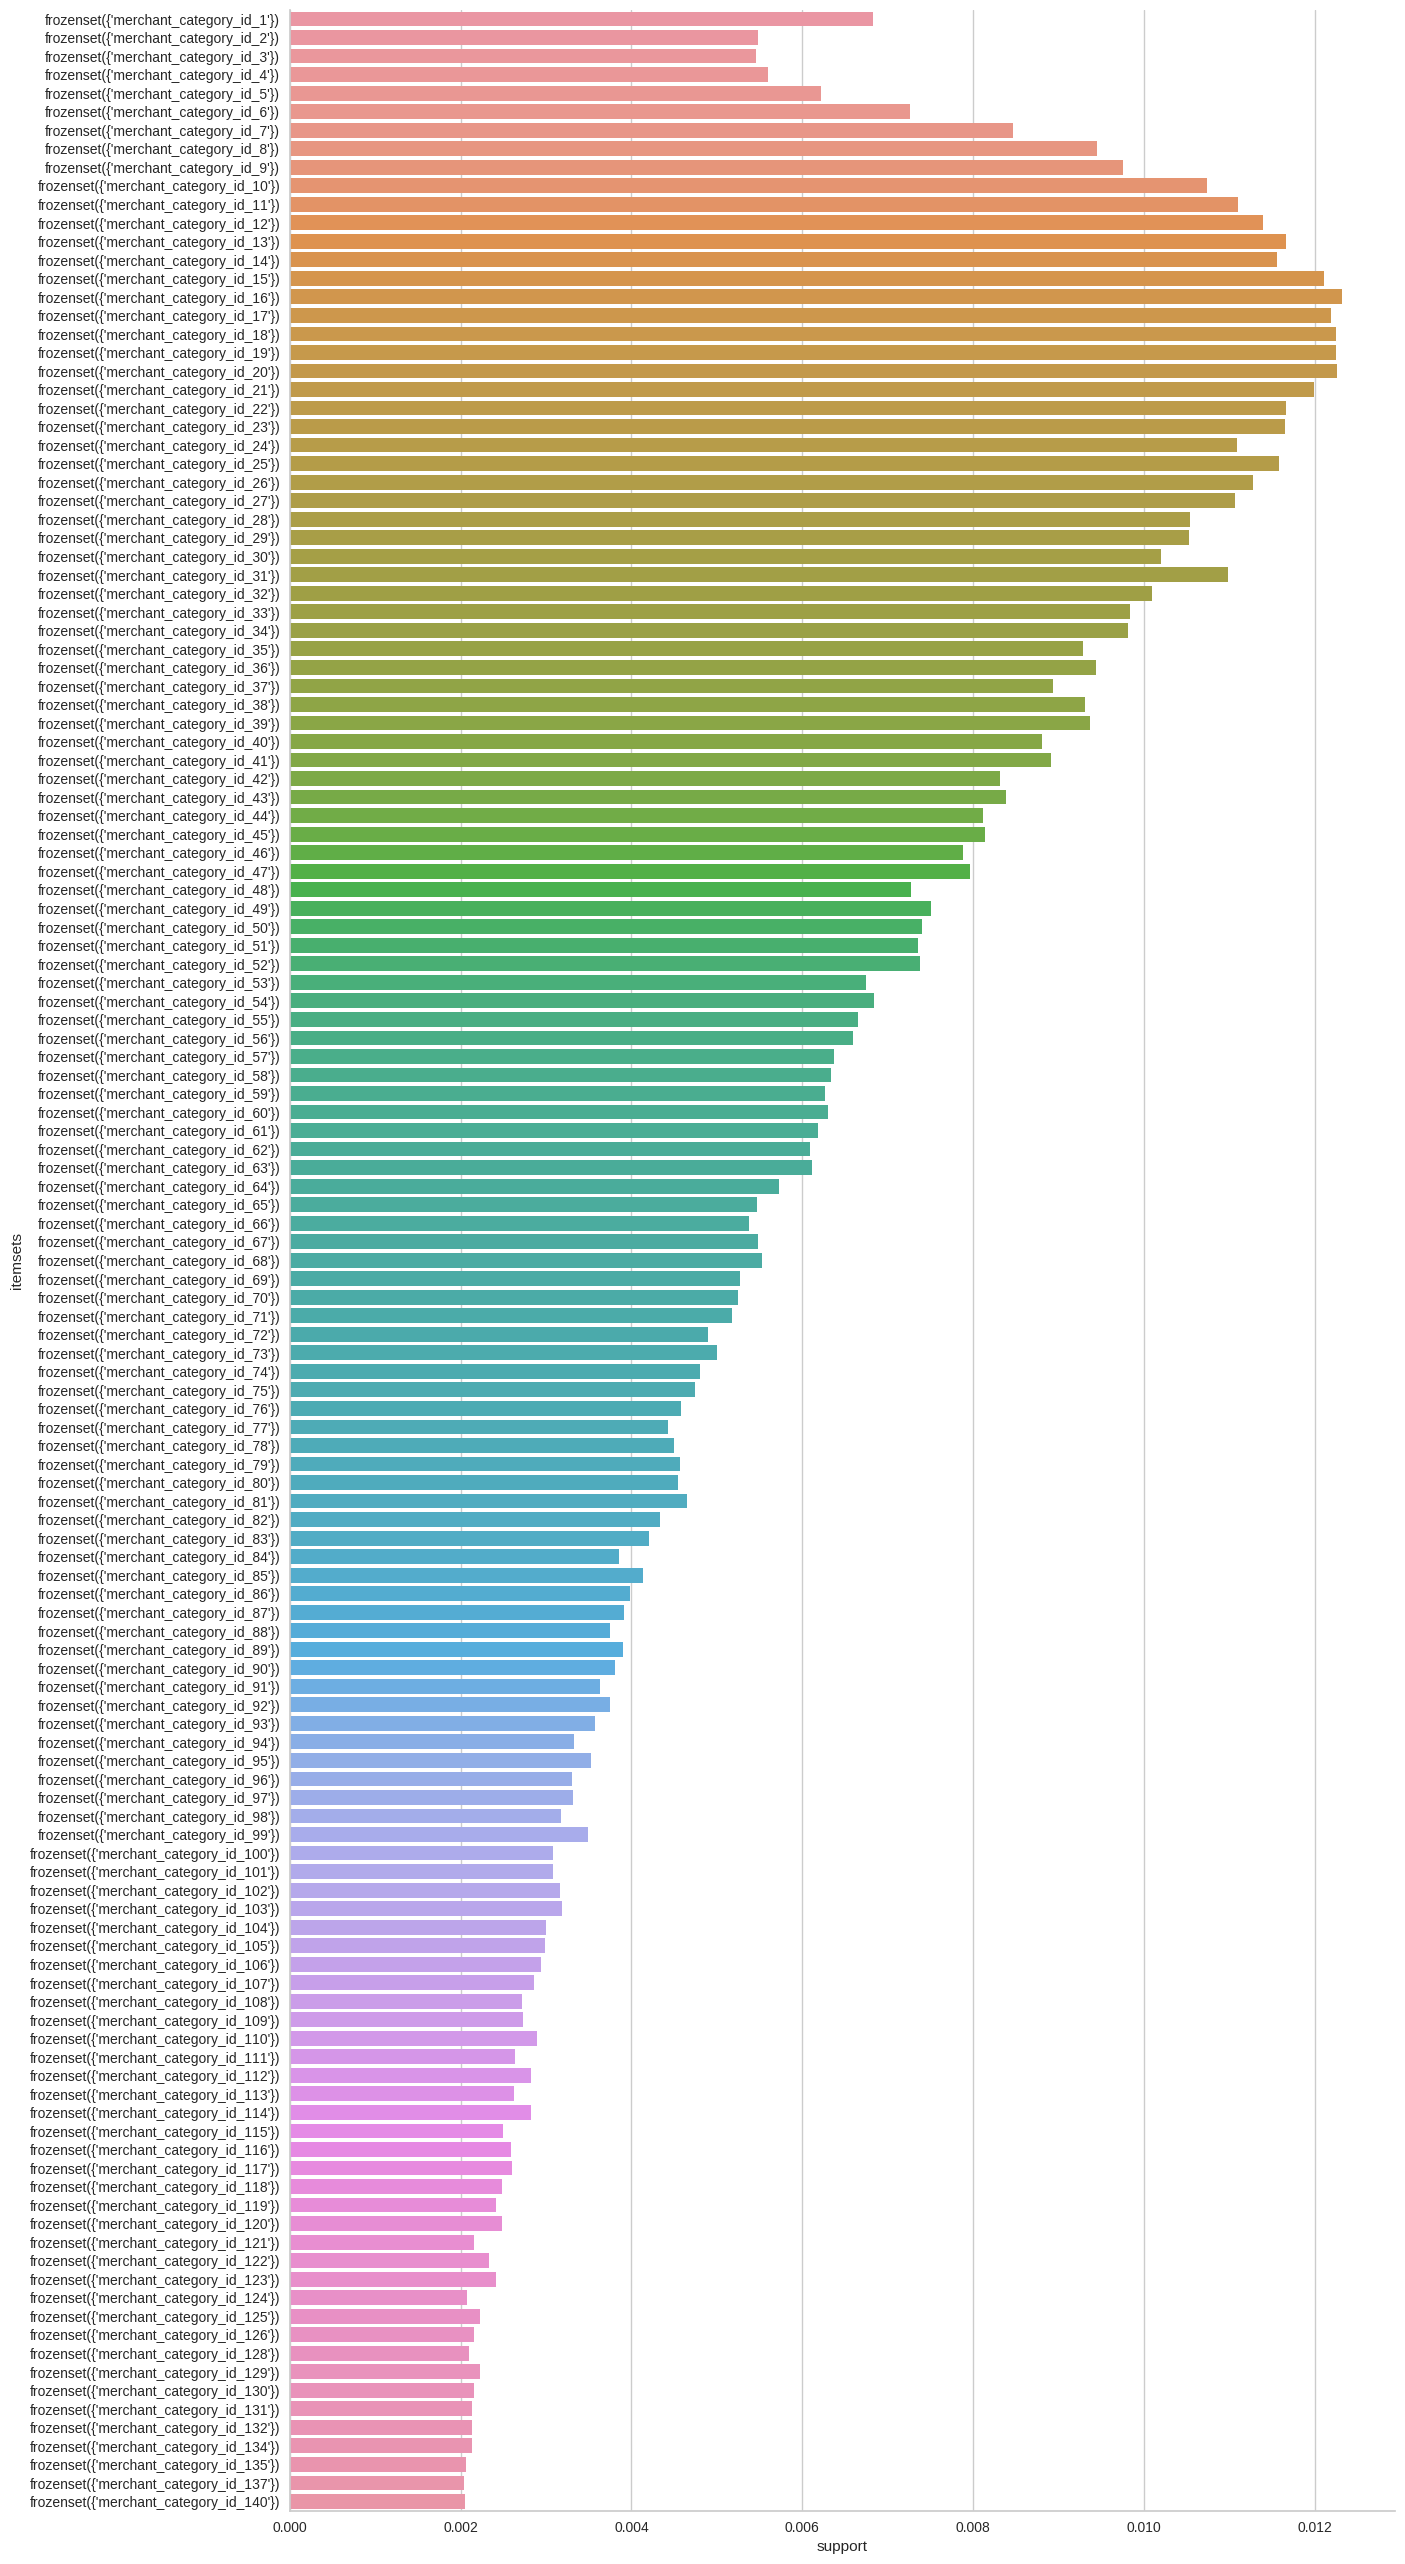

In [ ]:
import seaborn as sns
catplot =sns.catplot(y="itemsets", x="support",data=frequent_itemsets_2,kind="bar")
# Change the size of the plot
catplot.fig.set_size_inches(30, 30)
# Show the plot
plt.show()

In [ ]:
print(np.max( frequent_itemsets_2["support"]))

0.012323218108898651


- from the previous plot we can detect that The most frequent pattern in the list you provided is (merchant_category_id_16). It has a support of 0.012323218108898651

This means that All itemsets that appear have a support of at least 0.002, or 0.2%, in the dataset. This means that they occur together in the dataset at least 0.2% of the time

trial 3:

In [ ]:
frequent_itemsets_3 = apriori(test, min_support=0.01, use_colnames=True)
print(frequent_itemsets_3)

     support                   itemsets
0   0.010735  (merchant_category_id_10)
1   0.011102  (merchant_category_id_11)
2   0.011388  (merchant_category_id_12)
3   0.011660  (merchant_category_id_13)
4   0.011554  (merchant_category_id_14)
5   0.012102  (merchant_category_id_15)
6   0.012323  (merchant_category_id_16)
7   0.012193  (merchant_category_id_17)
8   0.012248  (merchant_category_id_18)
9   0.012248  (merchant_category_id_19)
10  0.012263  (merchant_category_id_20)
11  0.011986  (merchant_category_id_21)
12  0.011665  (merchant_category_id_22)
13  0.011645  (merchant_category_id_23)
14  0.011087  (merchant_category_id_24)
15  0.011584  (merchant_category_id_25)
16  0.011273  (merchant_category_id_26)
17  0.011067  (merchant_category_id_27)
18  0.010534  (merchant_category_id_28)
19  0.010524  (merchant_category_id_29)
20  0.010197  (merchant_category_id_30)
21  0.010981  (merchant_category_id_31)
22  0.010097  (merchant_category_id_32)


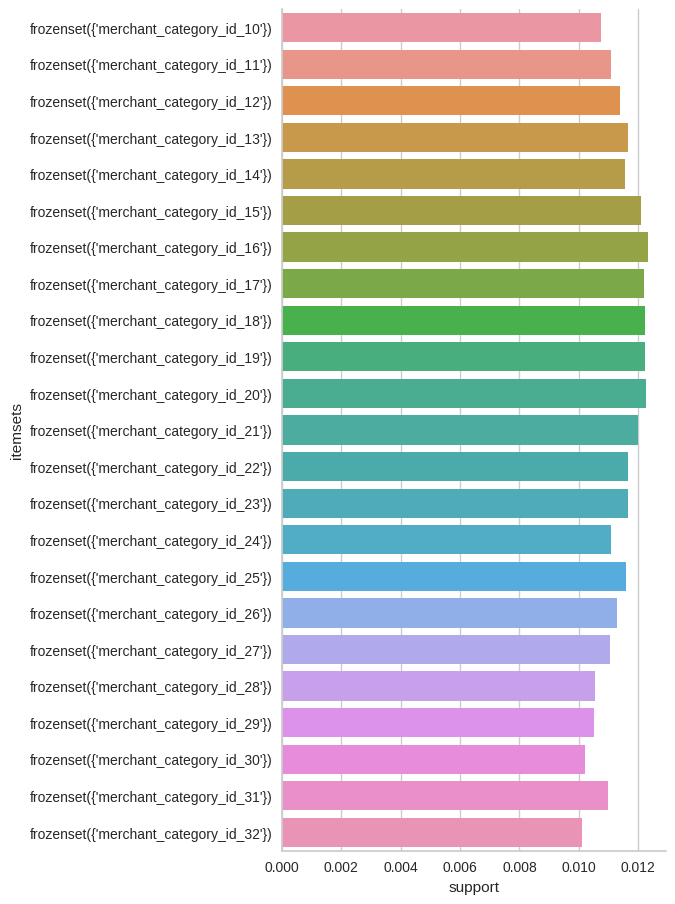

In [ ]:
import seaborn as sns
catplot =sns.catplot(y="itemsets", x="support",data=frequent_itemsets_3,kind="bar")
# Change the size of the plot
catplot.fig.set_size_inches(10, 10)
# Show the plot
plt.show()

In [ ]:
print(np.max( frequent_itemsets_3["support"]))

0.012323218108898651


- from the previous plot we can detect that The most frequent pattern in the list you provided is (merchant_category_id_16). It has a support of 0.012323218108898651

- This means that All itemsetsthat appear have a support of at least 0.01, or 1%, in the dataset. This means that they occur together in the dataset at least 1% of the time

- the three trials are detect that The most frequent pattern in the list you provided is (merchant_category_id_16) , so that many transaction happen on the category of category_id_16

In [ ]:
new_table_3

merchant_category_id     score
0                        123  0.134077
1                         67  0.884295
2                        146 -0.264433
3                         42  0.812872
4                         73  1.288514
...                      ...       ...
198969                    50  0.362965
198970                   192 -0.085357
198971                   115  1.530061
198972                   184 -0.600063
198973                    45 -1.073077

[198974 rows x 2 columns]

# Question 6

- the same idea of question 5 , but in question 6 I will divide the column of "merchant_category_id" into two parts based on the mean of 'score '

- use a copy of "new_table" that called "new_table_3" which cotain the "score" and ,"merchant_category_id"

- convert "merchant_category_id" into categorical data

In [ ]:
new_table_3["merchant_category_id"]=new_table_3["merchant_category_id"].astype('category')

- get the mean of score and store it in "mean_score"

In [ ]:
# Calculate the mean of the score column
mean_score = new_table_3['score'].mean()
print(mean_score)

-0.3920464891991919


divide the table into two parts based on the mean of 'score' then drop the score from two parts

In [ ]:
high = new_table_3[new_table_3['score'] >= mean_score]
low = new_table_3[new_table_3['score'] < mean_score]

In [ ]:
score_2= low.drop('score', axis=1,inplace=True)

In [ ]:
score_3= high.drop('score', axis=1,inplace=True)

before use frequent pattern , we must encode the two table using "get_dummies" function

In [ ]:
test_2 = pd.get_dummies(low)
test_2

merchant_category_id_1  merchant_category_id_2   
6                        False                   False  \
9                        False                   False   
14                       False                   False   
17                       False                   False   
19                       False                   False   
...                        ...                     ...   
198954                   False                   False   
198955                   False                   False   
198957                   False                   False   
198972                   False                   False   
198973                   False                   False   

        merchant_category_id_3  merchant_category_id_4   
6                        False                   False  \
9                        False                   False   
14                       False                   False   
17                       False                   False   
19                       False                   False   
...                        ...                     ...   
198954                   False                   False   
198955                   False                   False   
198957                   False                   False   
198972                   False                   False   
198973                   False                   False   

        merchant_category_id_5  merchant_category_id_6   
6                        False                   False  \
9                        False                   False   
14                       False                   False   
17                       False                   False   
19                       False                   False   
...                        ...                     ...   
198954                   False                   False   
198955                   False                   False   
198957                   False                   False   
198972                   False                   False   
198973                   False                   False   

        merchant_category_id_7  merchant_category_id_8   
6                        False                   False  \
9                        False                   False   
14                       False                   False   
17                       False                   False   
19                       False                   False   
...                        ...                     ...   
198954                   False                   False   
198955                   False                   False   
198957                   False                   False   
198972                   False                   False   
198973                   False                   False   

        merchant_category_id_9  merchant_category_id_10  ...   
6                        False                    False  ...  \
9                        False                    False  ...   
14                       False                    False  ...   
17                       False                    False  ...   
19                       False                    False  ...   
...                        ...                      ...  ...   
198954                   False                    False  ...   
198955                   False                    False  ...   
198957                   False                    False  ...   
198972                   False                    False  ...   
198973                   False                    False  ...   

        merchant_category_id_1445  merchant_category_id_1462   
6                           False                      False  \
9                           False                      False   
14                          False                      False   
17                          False                      False   
19                          False                      False   
...                           ...                        ...   
198

In [ ]:
test_3 = pd.get_dummies(high)
test_3

merchant_category_id_1  merchant_category_id_2   
0                        False                   False  \
1                        False                   False   
2                        False                   False   
3                        False                   False   
4                        False                   False   
...                        ...                     ...   
198967                   False                   False   
198968                   False                   False   
198969                   False                   False   
198970                   False                   False   
198971                   False                   False   

        merchant_category_id_3  merchant_category_id_4   
0                        False                   False  \
1                        False                   False   
2                        False                   False   
3                        False                   False   
4                        False                   False   
...                        ...                     ...   
198967                   False                   False   
198968                   False                   False   
198969                   False                   False   
198970                   False                   False   
198971                   False                   False   

        merchant_category_id_5  merchant_category_id_6   
0                        False                   False  \
1                        False                   False   
2                        False                   False   
3                        False                   False   
4                        False                   False   
...                        ...                     ...   
198967                   False                   False   
198968                   False                   False   
198969                   False                   False   
198970                   False                   False   
198971                   False                   False   

        merchant_category_id_7  merchant_category_id_8   
0                        False                   False  \
1                        False                   False   
2                        False                   False   
3                        False                   False   
4                        False                   False   
...                        ...                     ...   
198967                   False                   False   
198968                   False                   False   
198969                   False                   False   
198970                   False                   False   
198971                   False                   False   

        merchant_category_id_9  merchant_category_id_10  ...   
0                        False                    False  ...  \
1                        False                    False  ...   
2                        False                    False  ...   
3                        False                    False  ...   
4                        False                    False  ...   
...                        ...                      ...  ...   
198967                   False                    False  ...   
198968                   False                    False  ...   
198969                   False                    False  ...   
198970                   False                    False  ...   
198971                   False                    False  ...   

        merchant_category_id_1445  merchant_category_id_1462   
0                           False                      False  \
1                           False                      False   
2                           False                      False   
3                           False                      False   
4                           False                      False   
...                           ...                        ...   
198

- start with the table which score less than the mean of score

trial 1

In [ ]:
frequent_itemsets_4 = apriori(test_2, min_support=0.005, use_colnames=True)
print(frequent_itemsets_4)

     support                   itemsets
0   0.006576   (merchant_category_id_1)
1   0.005400   (merchant_category_id_2)
2   0.005025   (merchant_category_id_3)
3   0.005480   (merchant_category_id_5)
4   0.006643   (merchant_category_id_6)
..       ...                        ...
69  0.005640  (merchant_category_id_71)
70  0.005132  (merchant_category_id_72)
71  0.005239  (merchant_category_id_73)
72  0.005079  (merchant_category_id_74)
73  0.005279  (merchant_category_id_81)

[74 rows x 2 columns]


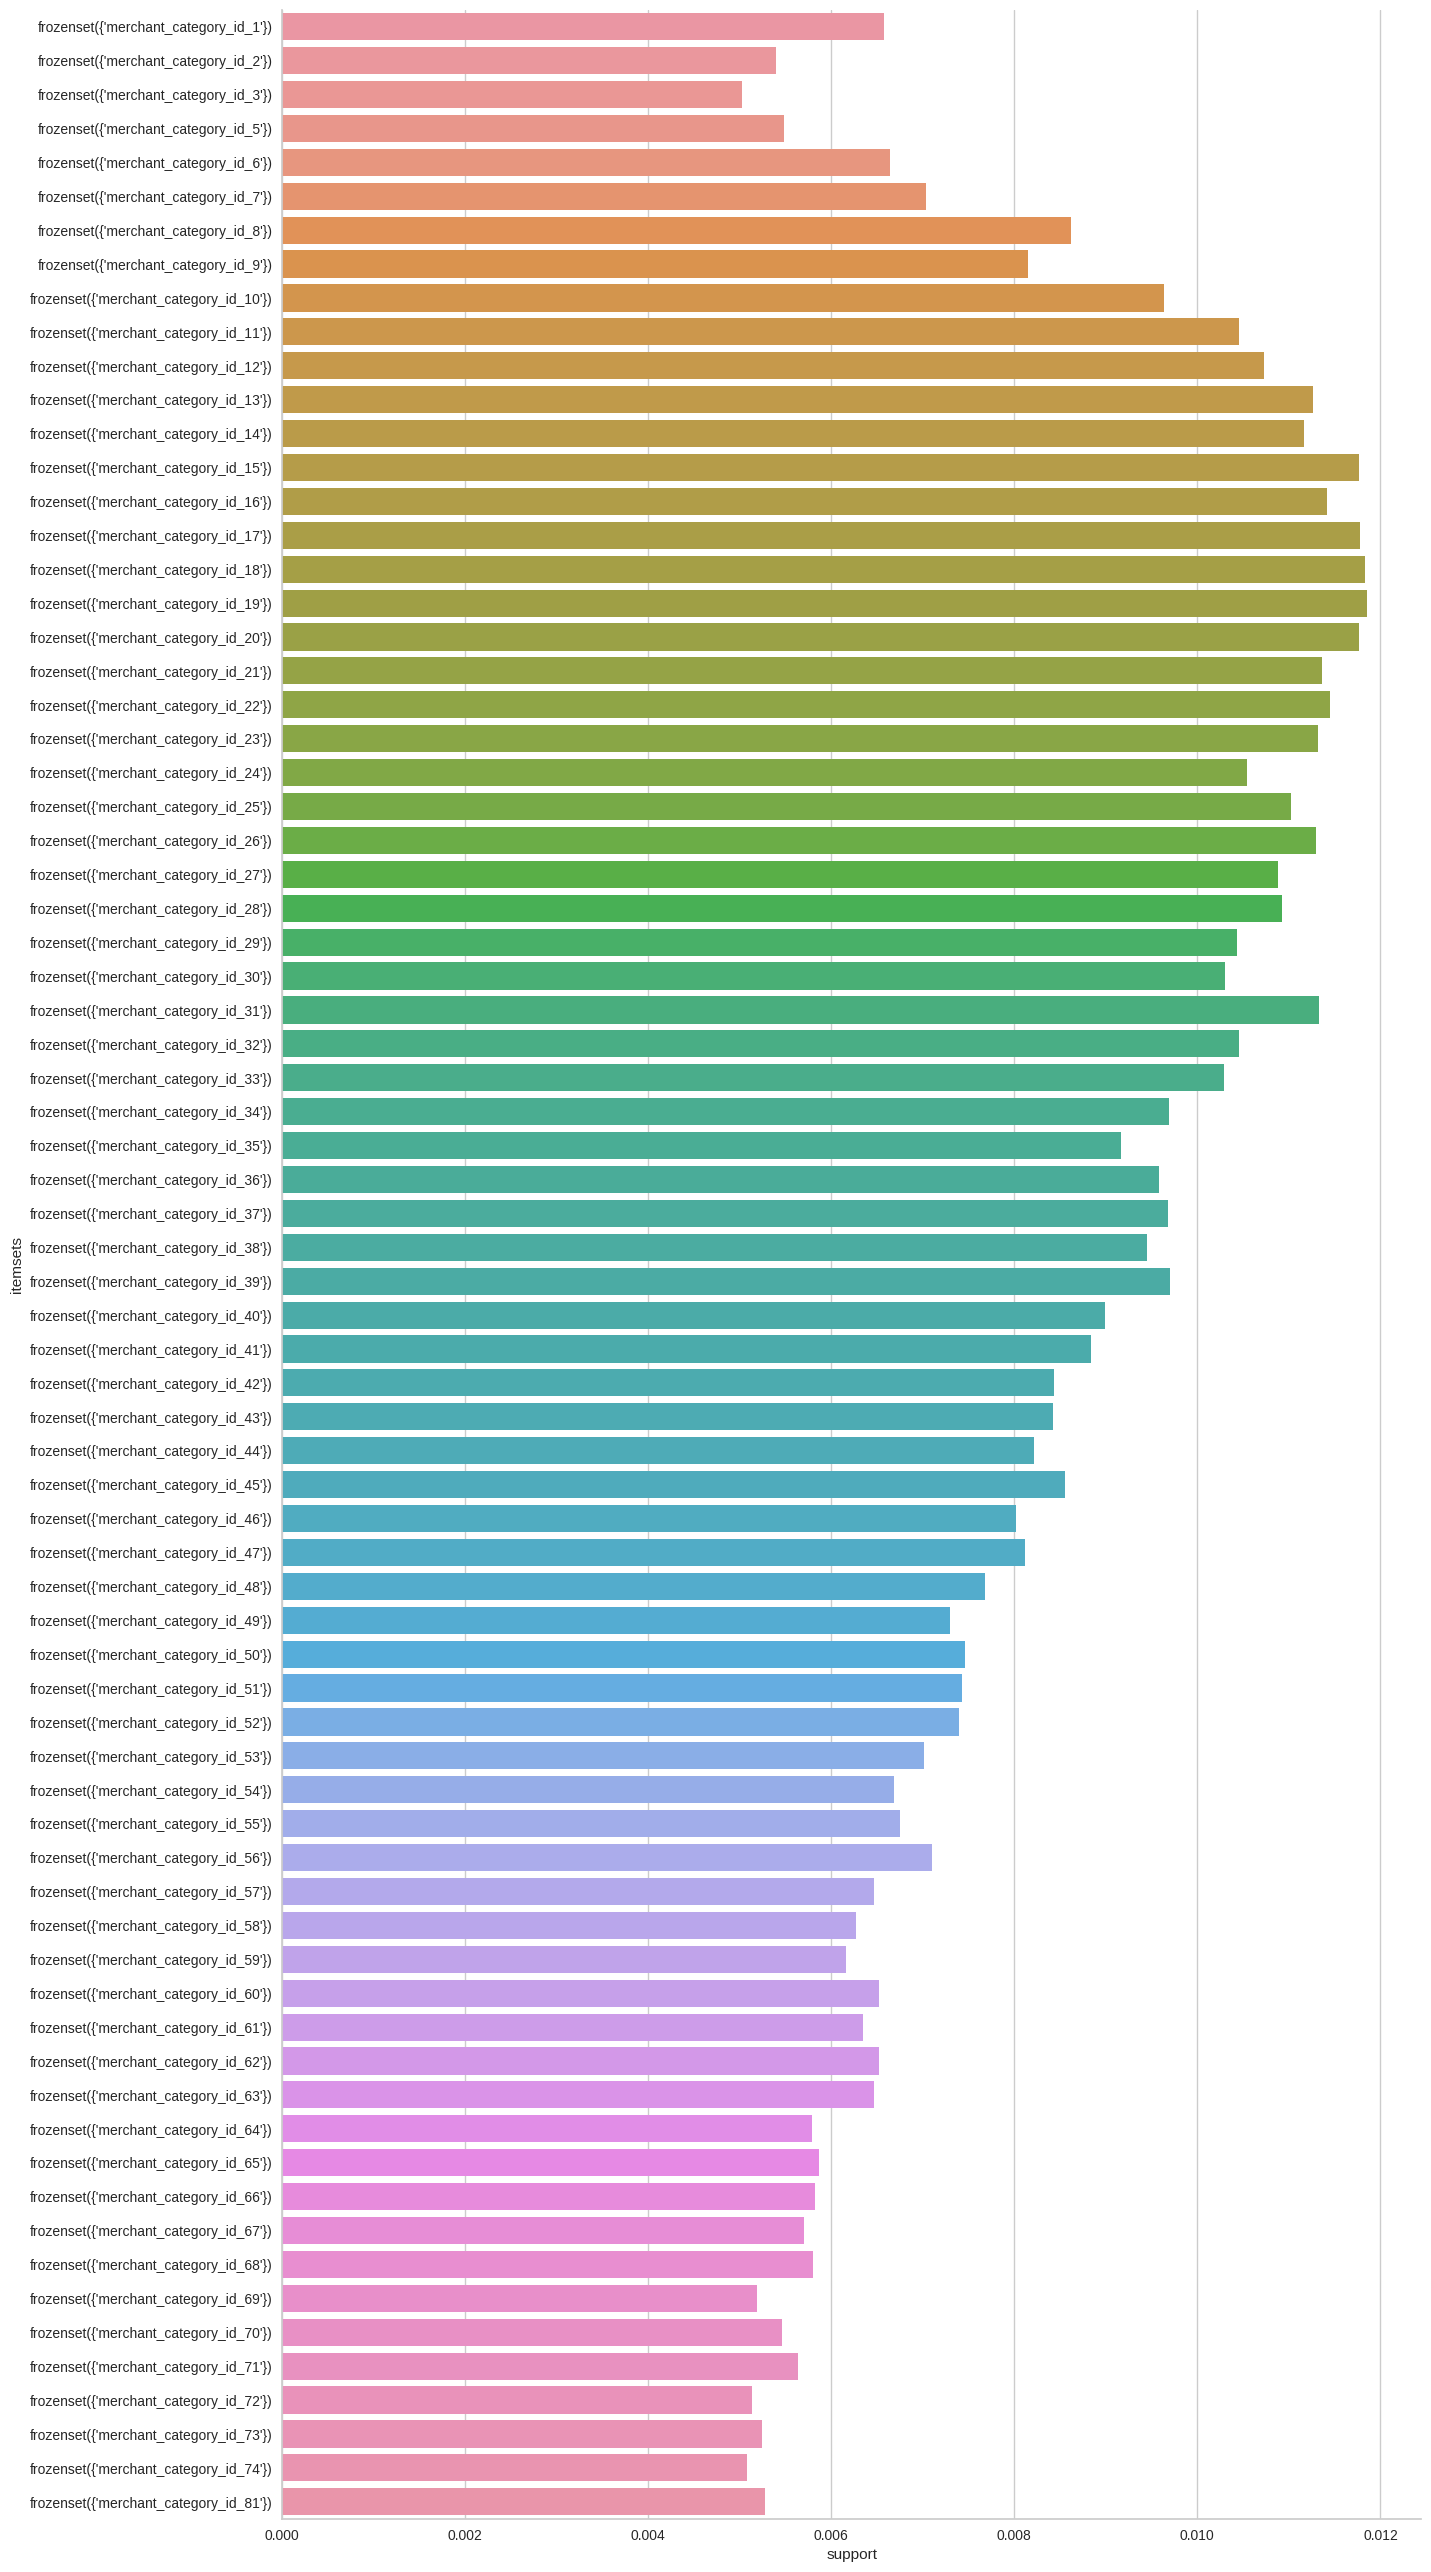

In [ ]:
import seaborn as sns
catplot =sns.catplot(y="itemsets", x="support",data=frequent_itemsets_4,kind="bar")
# Change the size of the plot
catplot.fig.set_size_inches(30, 30)
# Show the plot
plt.show()

In [ ]:
print(np.max( frequent_itemsets_4["support"]))

0.011854960505740367


- from the previous plot we can detect that The most frequent pattern in the list you provided is (merchant_category_id_15). It has a support of 0.011854960505740367

- This means that All itemsets that appear have a support of at least 0.005, or 0.5%, in the dataset. This means that they occur together in the dataset at least 0.5% of the time

Trial 2

In [ ]:
frequent_itemsets_5 = apriori(test_2, min_support=0.002, use_colnames=True)
print(frequent_itemsets_5)

      support                    itemsets
0    0.006576    (merchant_category_id_1)
1    0.005400    (merchant_category_id_2)
2    0.005025    (merchant_category_id_3)
3    0.004905    (merchant_category_id_4)
4    0.005480    (merchant_category_id_5)
..        ...                         ...
130  0.002165  (merchant_category_id_132)
131  0.002312  (merchant_category_id_134)
132  0.002232  (merchant_category_id_135)
133  0.002072  (merchant_category_id_136)
134  0.002366  (merchant_category_id_137)

[135 rows x 2 columns]


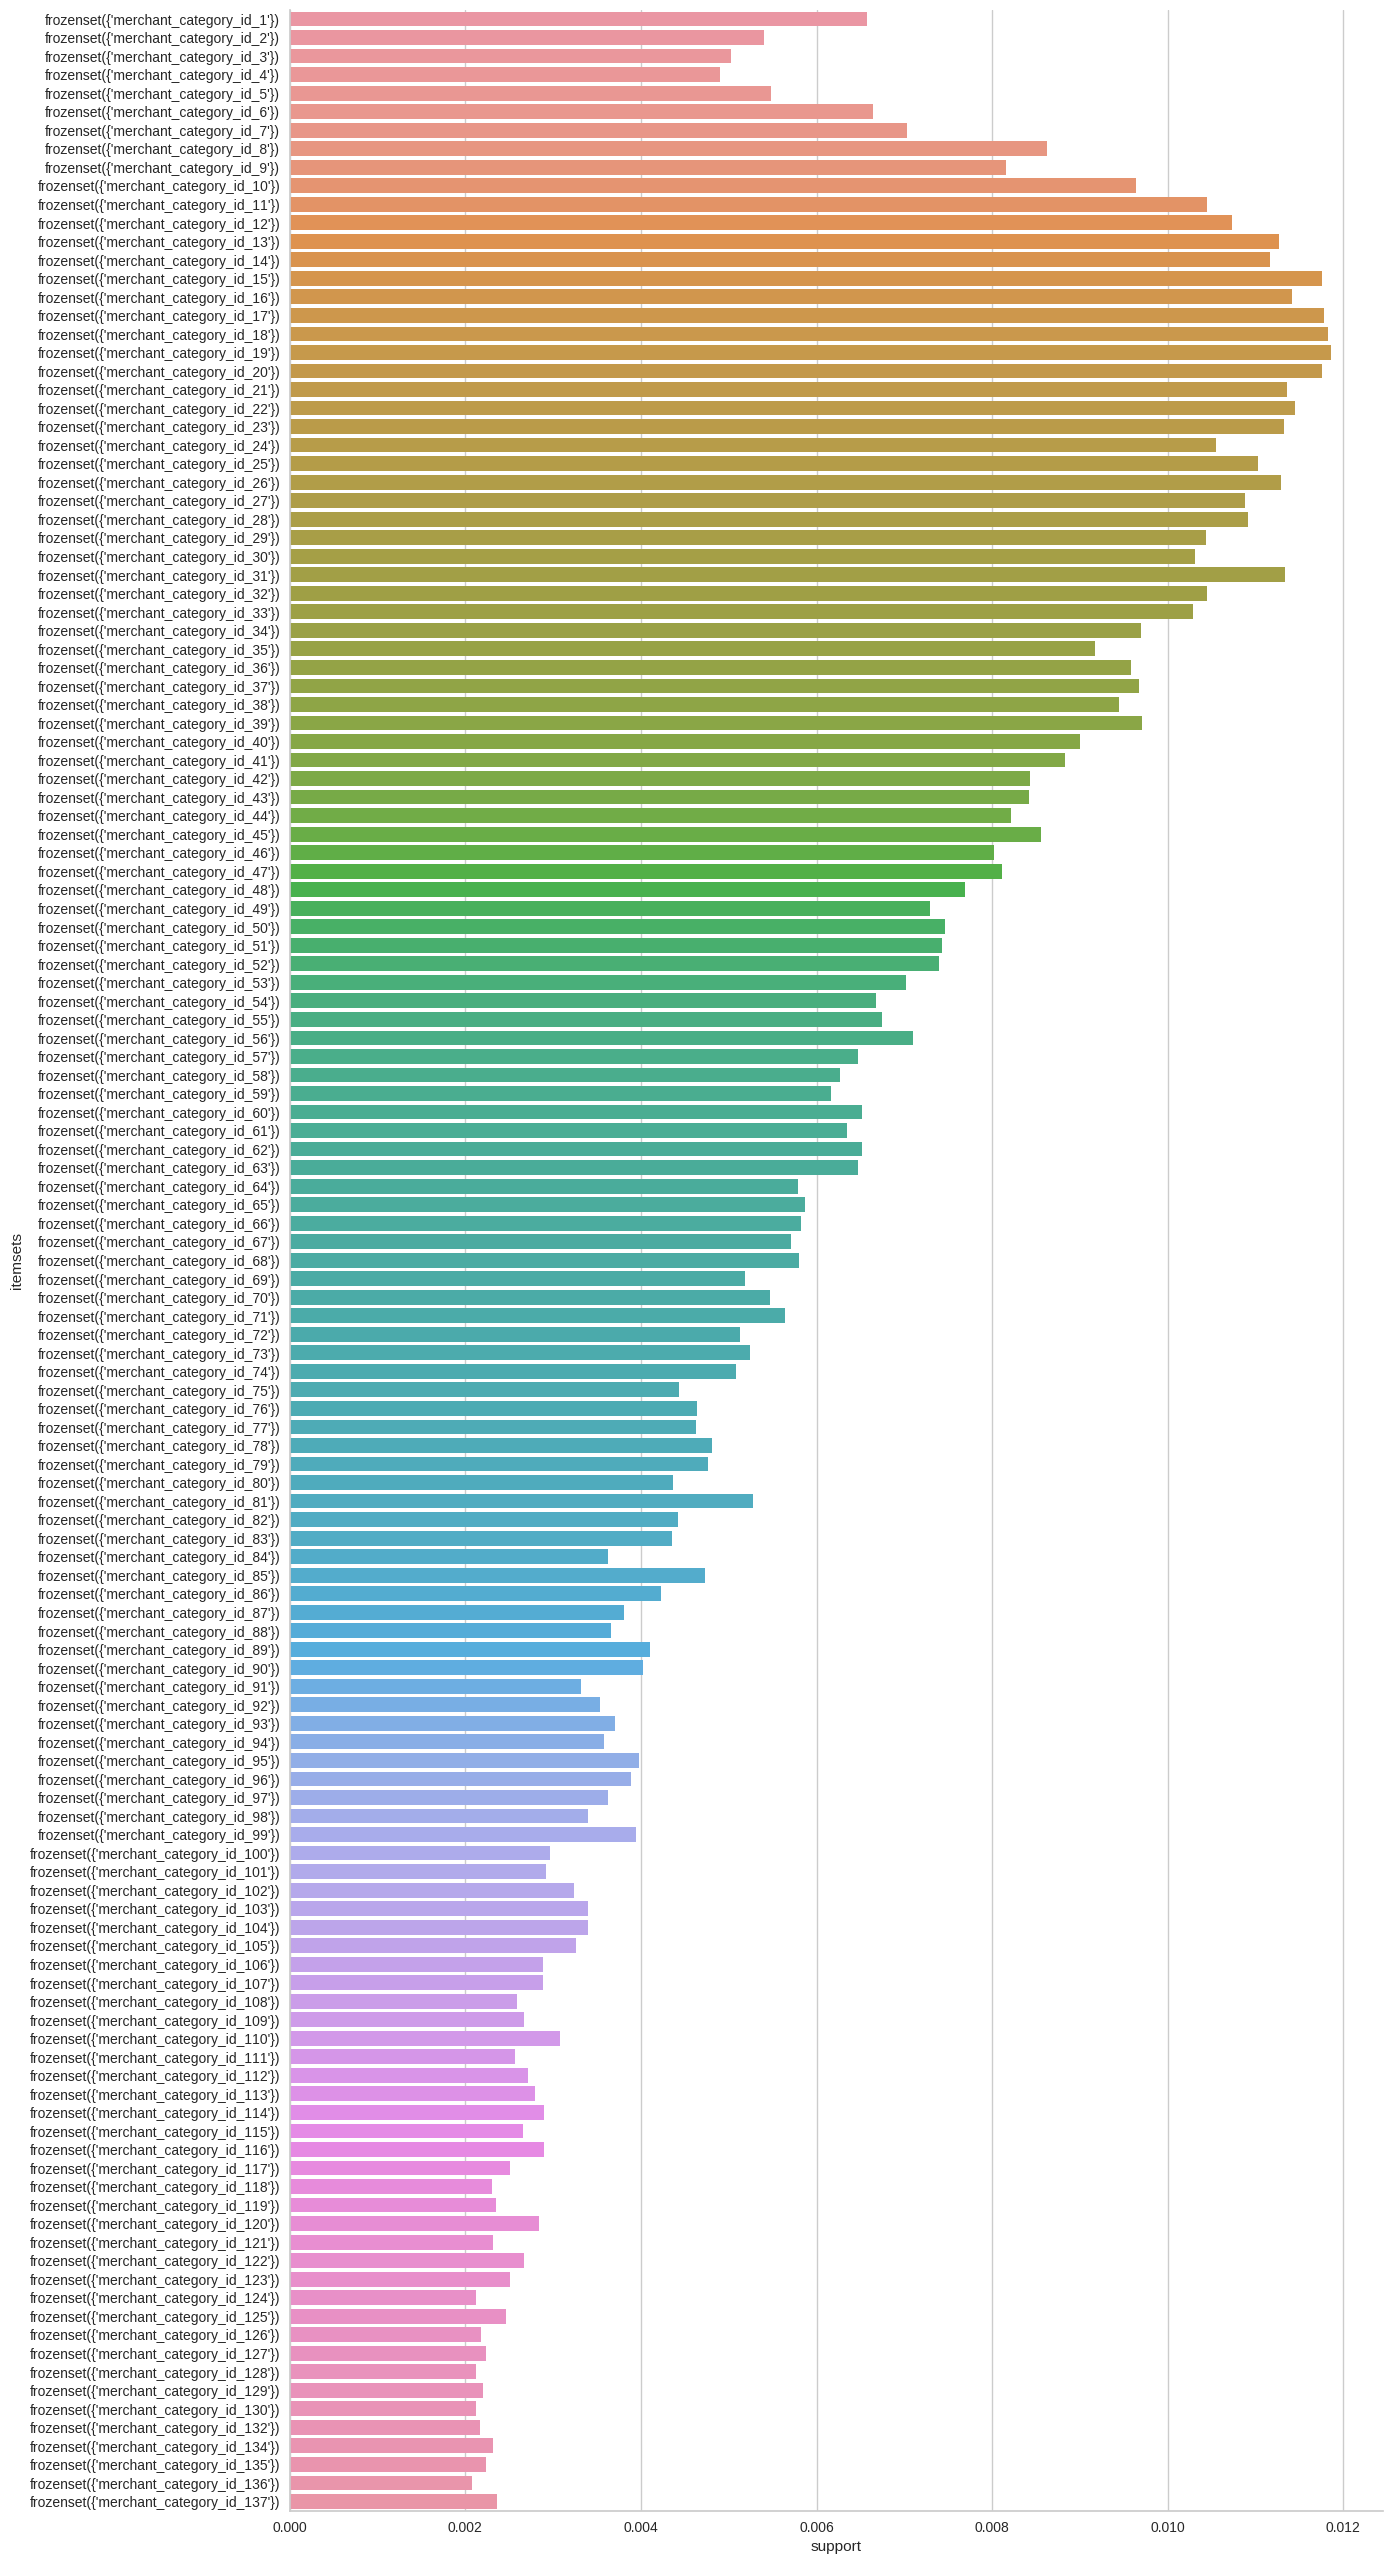

In [ ]:
import seaborn as sns
catplot =sns.catplot(y="itemsets", x="support",data=frequent_itemsets_5,kind="bar")
# Change the size of the plot
catplot.fig.set_size_inches(30, 30)
# Show the plot
plt.show()

In [ ]:
print(np.max( frequent_itemsets_5["support"]))

0.011854960505740367


- from the previous plot we can detect that The most frequent pattern in the list you provided is (merchant_category_id_19). It has a support of 0.011854960505740367

- This means that All itemsets that appear have a support of at least 0.002, or 0.2%, in the dataset. This means that they occur together in the dataset at least 0.2% of the time

Trial 3

In [ ]:
frequent_itemsets_6= apriori(test_2, min_support=0.01, use_colnames=True)
print(frequent_itemsets_6)

     support                   itemsets
0   0.010452  (merchant_category_id_11)
1   0.010732  (merchant_category_id_12)
2   0.011267  (merchant_category_id_13)
3   0.011160  (merchant_category_id_14)
4   0.011761  (merchant_category_id_15)
5   0.011414  (merchant_category_id_16)
6   0.011775  (merchant_category_id_17)
7   0.011828  (merchant_category_id_18)
8   0.011855  (merchant_category_id_19)
9   0.011761  (merchant_category_id_20)
10  0.011360  (merchant_category_id_21)
11  0.011454  (merchant_category_id_22)
12  0.011320  (merchant_category_id_23)
13  0.010545  (merchant_category_id_24)
14  0.011026  (merchant_category_id_25)
15  0.011294  (merchant_category_id_26)
16  0.010879  (merchant_category_id_27)
17  0.010919  (merchant_category_id_28)
18  0.010438  (merchant_category_id_29)
19  0.010305  (merchant_category_id_30)
20  0.011334  (merchant_category_id_31)
21  0.010452  (merchant_category_id_32)
22  0.010291  (merchant_category_id_33)


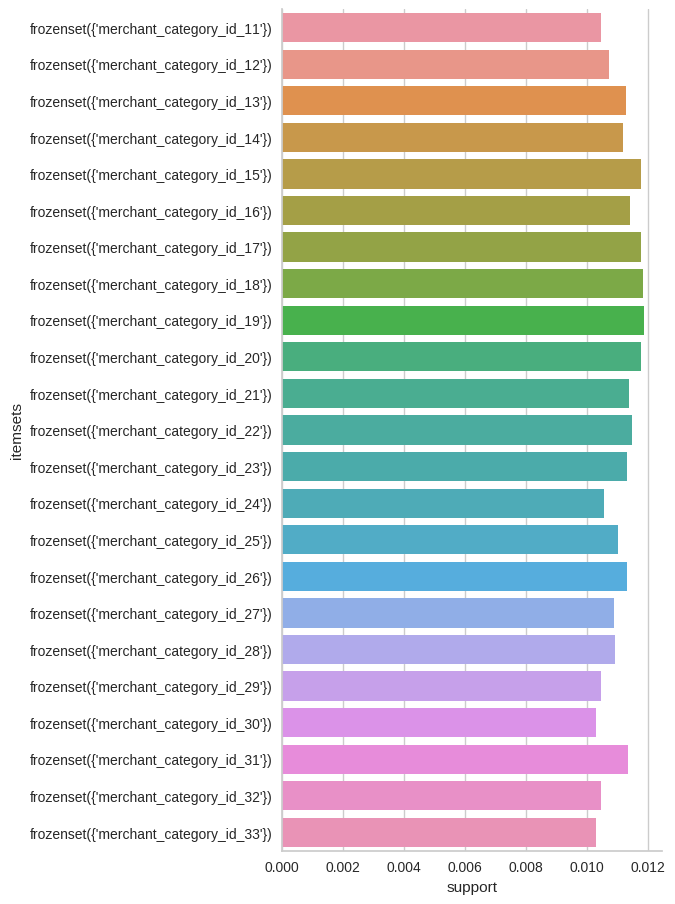

In [ ]:
import seaborn as sns
catplot =sns.catplot(y="itemsets", x="support",data=frequent_itemsets_6,kind="bar")
# Change the size of the plot
catplot.fig.set_size_inches(10, 10)
# Show the plot
plt.show()

In [ ]:
print(np.max( frequent_itemsets_6["support"]))

0.011854960505740367


- from the previous plot we can detect that The most frequent pattern in the list you provided is (merchant_category_id_15),(merchant_category_id_19),(merchant_category_id_18),(merchant_category_id_17). It has a support of 0.011854960505740367

- This means that All itemsets that appear have a support of at least 0.01, or 1%, in the dataset. This means that they occur together in the dataset at least 1% of the time

- the three trials are detect that The most frequent pattern in the list you provided are (merchant_category_id_15),(merchant_category_id_19),(merchant_category_id_18),(merchant_category_id_17)

**using the another part from table where score greater than or equal the mean of score**

Trial 1

In [ ]:
frequent_itemsets_7 = apriori(test_3, min_support=0.005, use_colnames=True)
print(frequent_itemsets_7)

     support                   itemsets
0   0.006983   (merchant_category_id_1)
1   0.005525   (merchant_category_id_2)
2   0.005719   (merchant_category_id_3)
3   0.006025   (merchant_category_id_4)
4   0.006669   (merchant_category_id_5)
..       ...                        ...
65  0.005107  (merchant_category_id_66)
66  0.005340  (merchant_category_id_67)
67  0.005364  (merchant_category_id_68)
68  0.005324  (merchant_category_id_69)
69  0.005123  (merchant_category_id_70)

[70 rows x 2 columns]


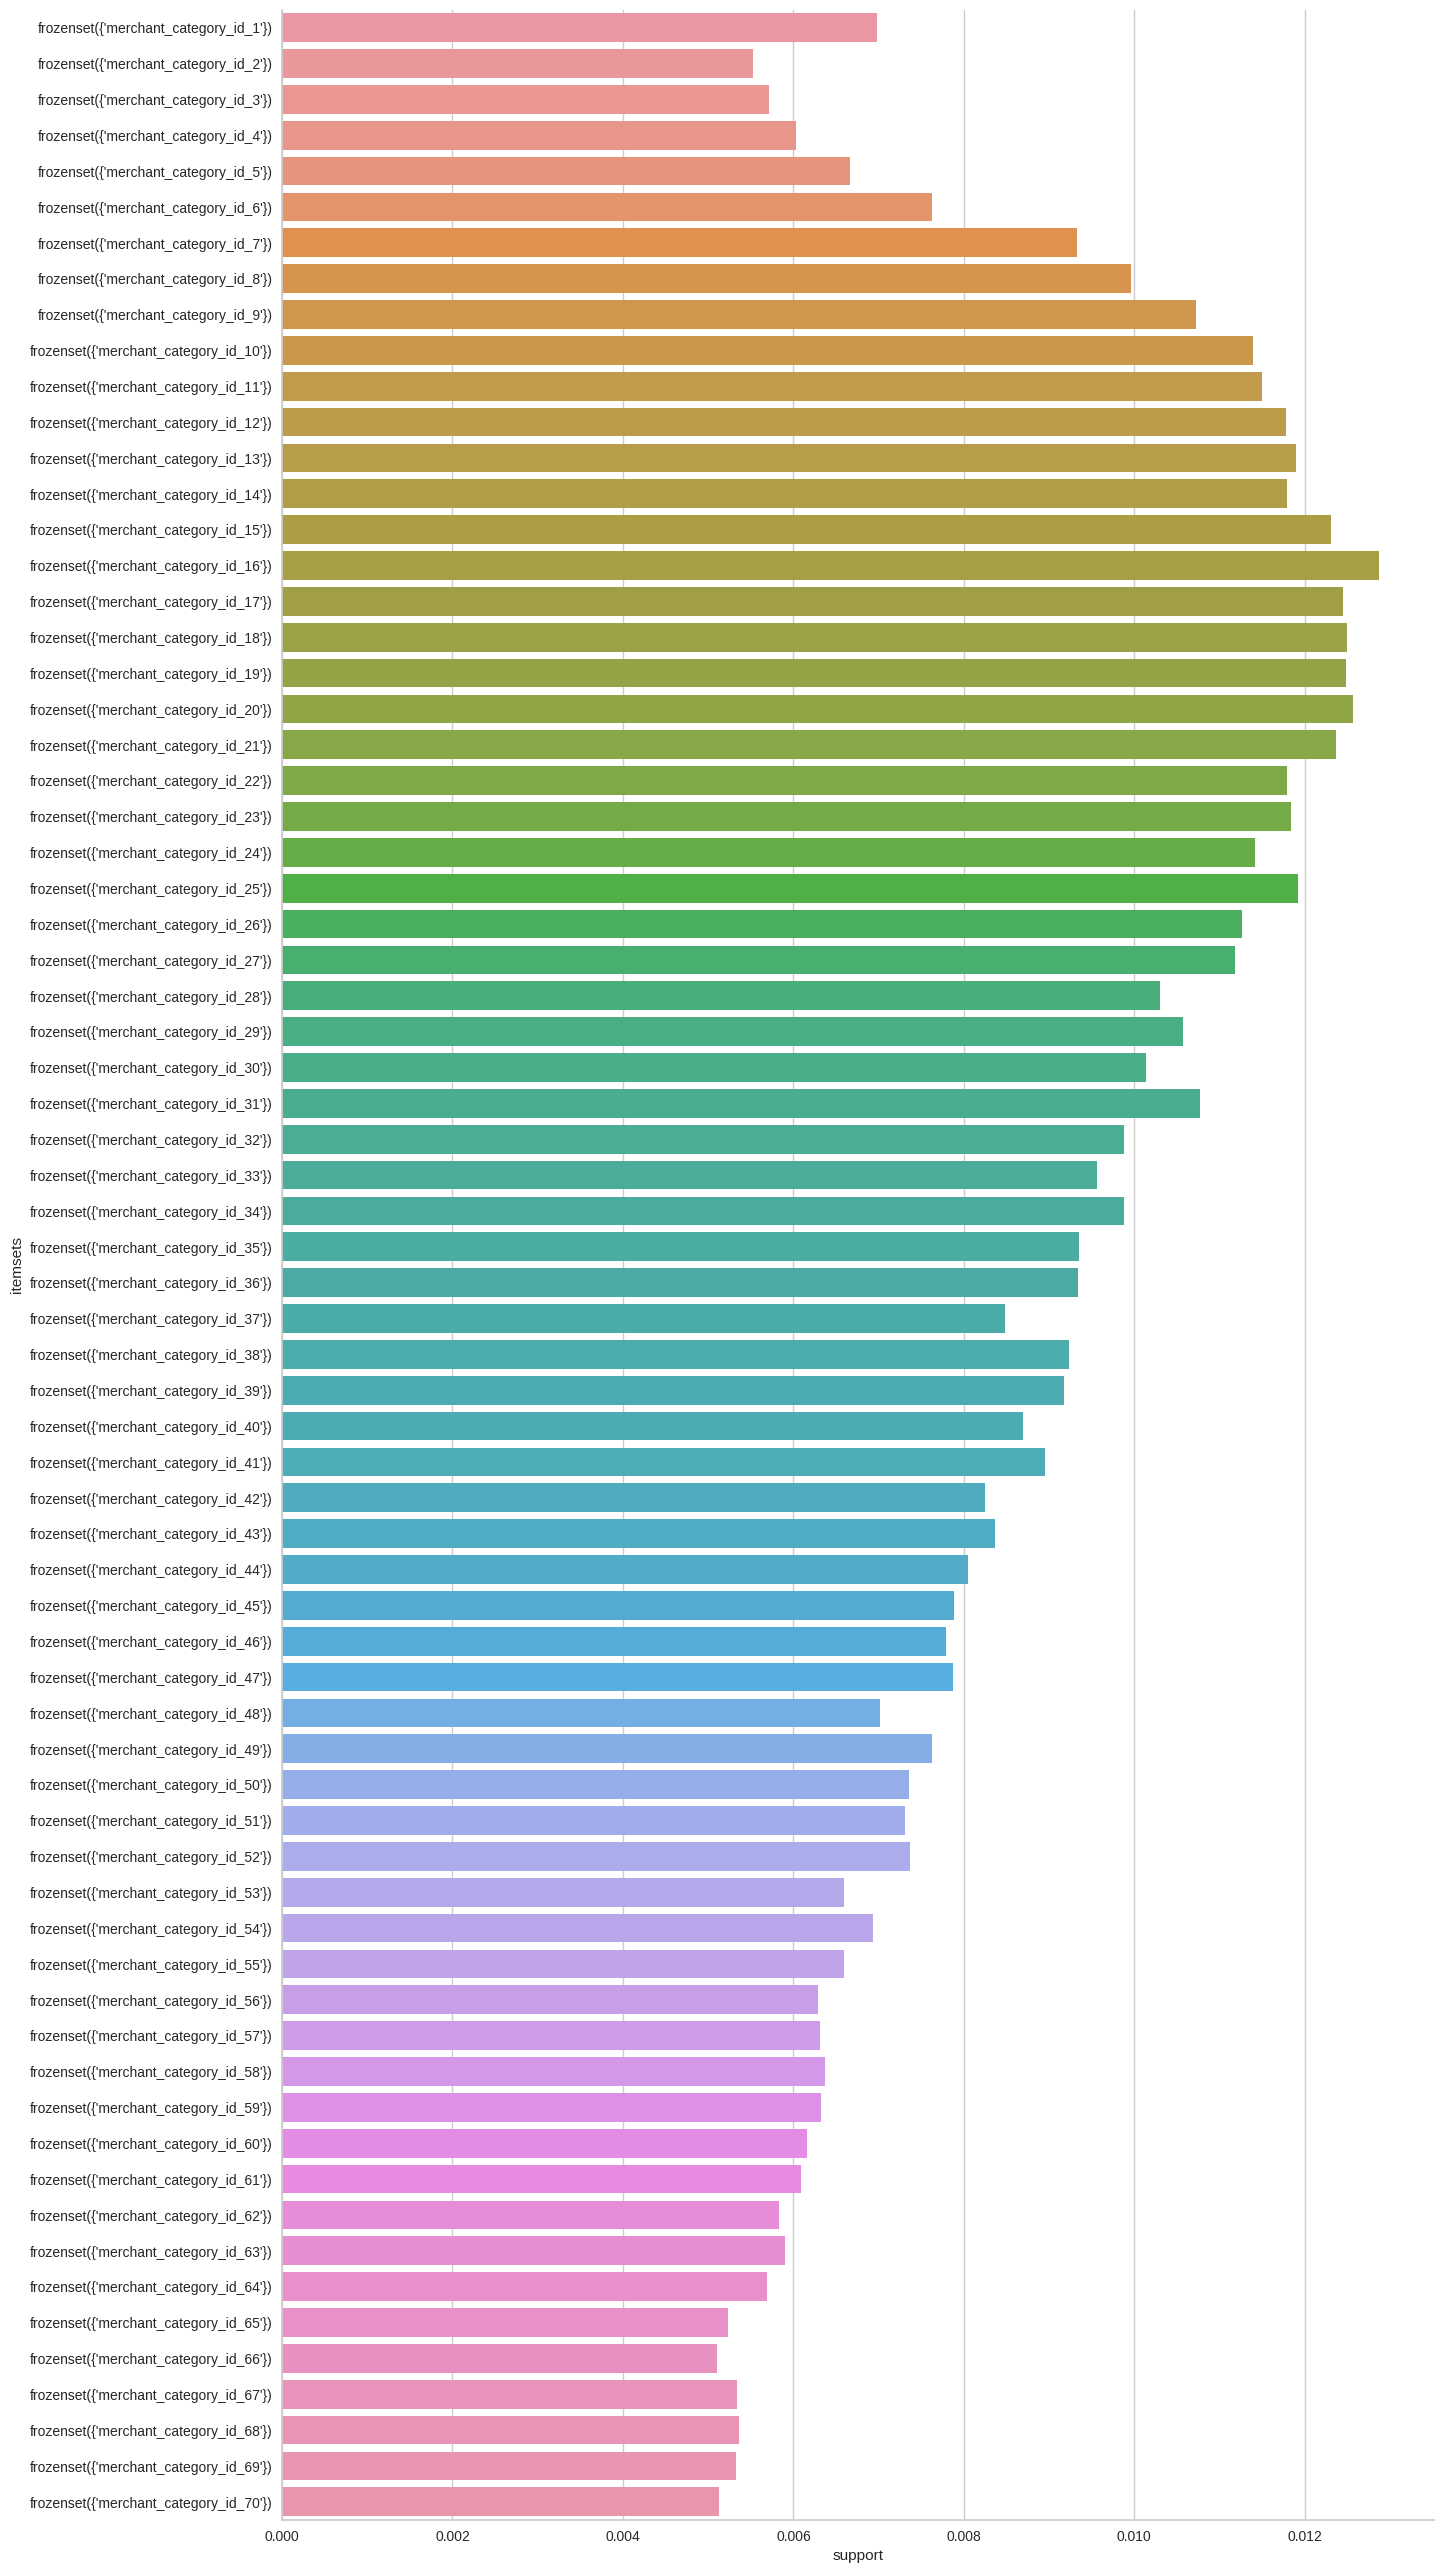

In [ ]:
import seaborn as sns
catplot =sns.catplot(y="itemsets", x="support",data=frequent_itemsets_7,kind="bar")
# Change the size of the plot
catplot.fig.set_size_inches(30, 30)
# Show the plot
plt.show()

In [ ]:
print(np.max( frequent_itemsets_7["support"]))

0.012871215355247155


- from the previous plot we can detect that The most frequent pattern in the list you provided is (merchant_category_id_16). It has a support of 0.012871215355247155

- This means that All itemsets that appear have a support of at least 0.005, or 0.5%, in the dataset. This means that they occur together in the dataset at least 0.5% of the time

Trial 2

In [ ]:
frequent_itemsets_8 = apriori(test_3, min_support=0.002, use_colnames=True)
print(frequent_itemsets_8)

      support                    itemsets
0    0.006983    (merchant_category_id_1)
1    0.005525    (merchant_category_id_2)
2    0.005719    (merchant_category_id_3)
3    0.006025    (merchant_category_id_4)
4    0.006669    (merchant_category_id_5)
..        ...                         ...
129  0.002271  (merchant_category_id_131)
130  0.002110  (merchant_category_id_132)
131  0.002038  (merchant_category_id_133)
132  0.002030  (merchant_category_id_134)
133  0.002134  (merchant_category_id_140)

[134 rows x 2 columns]


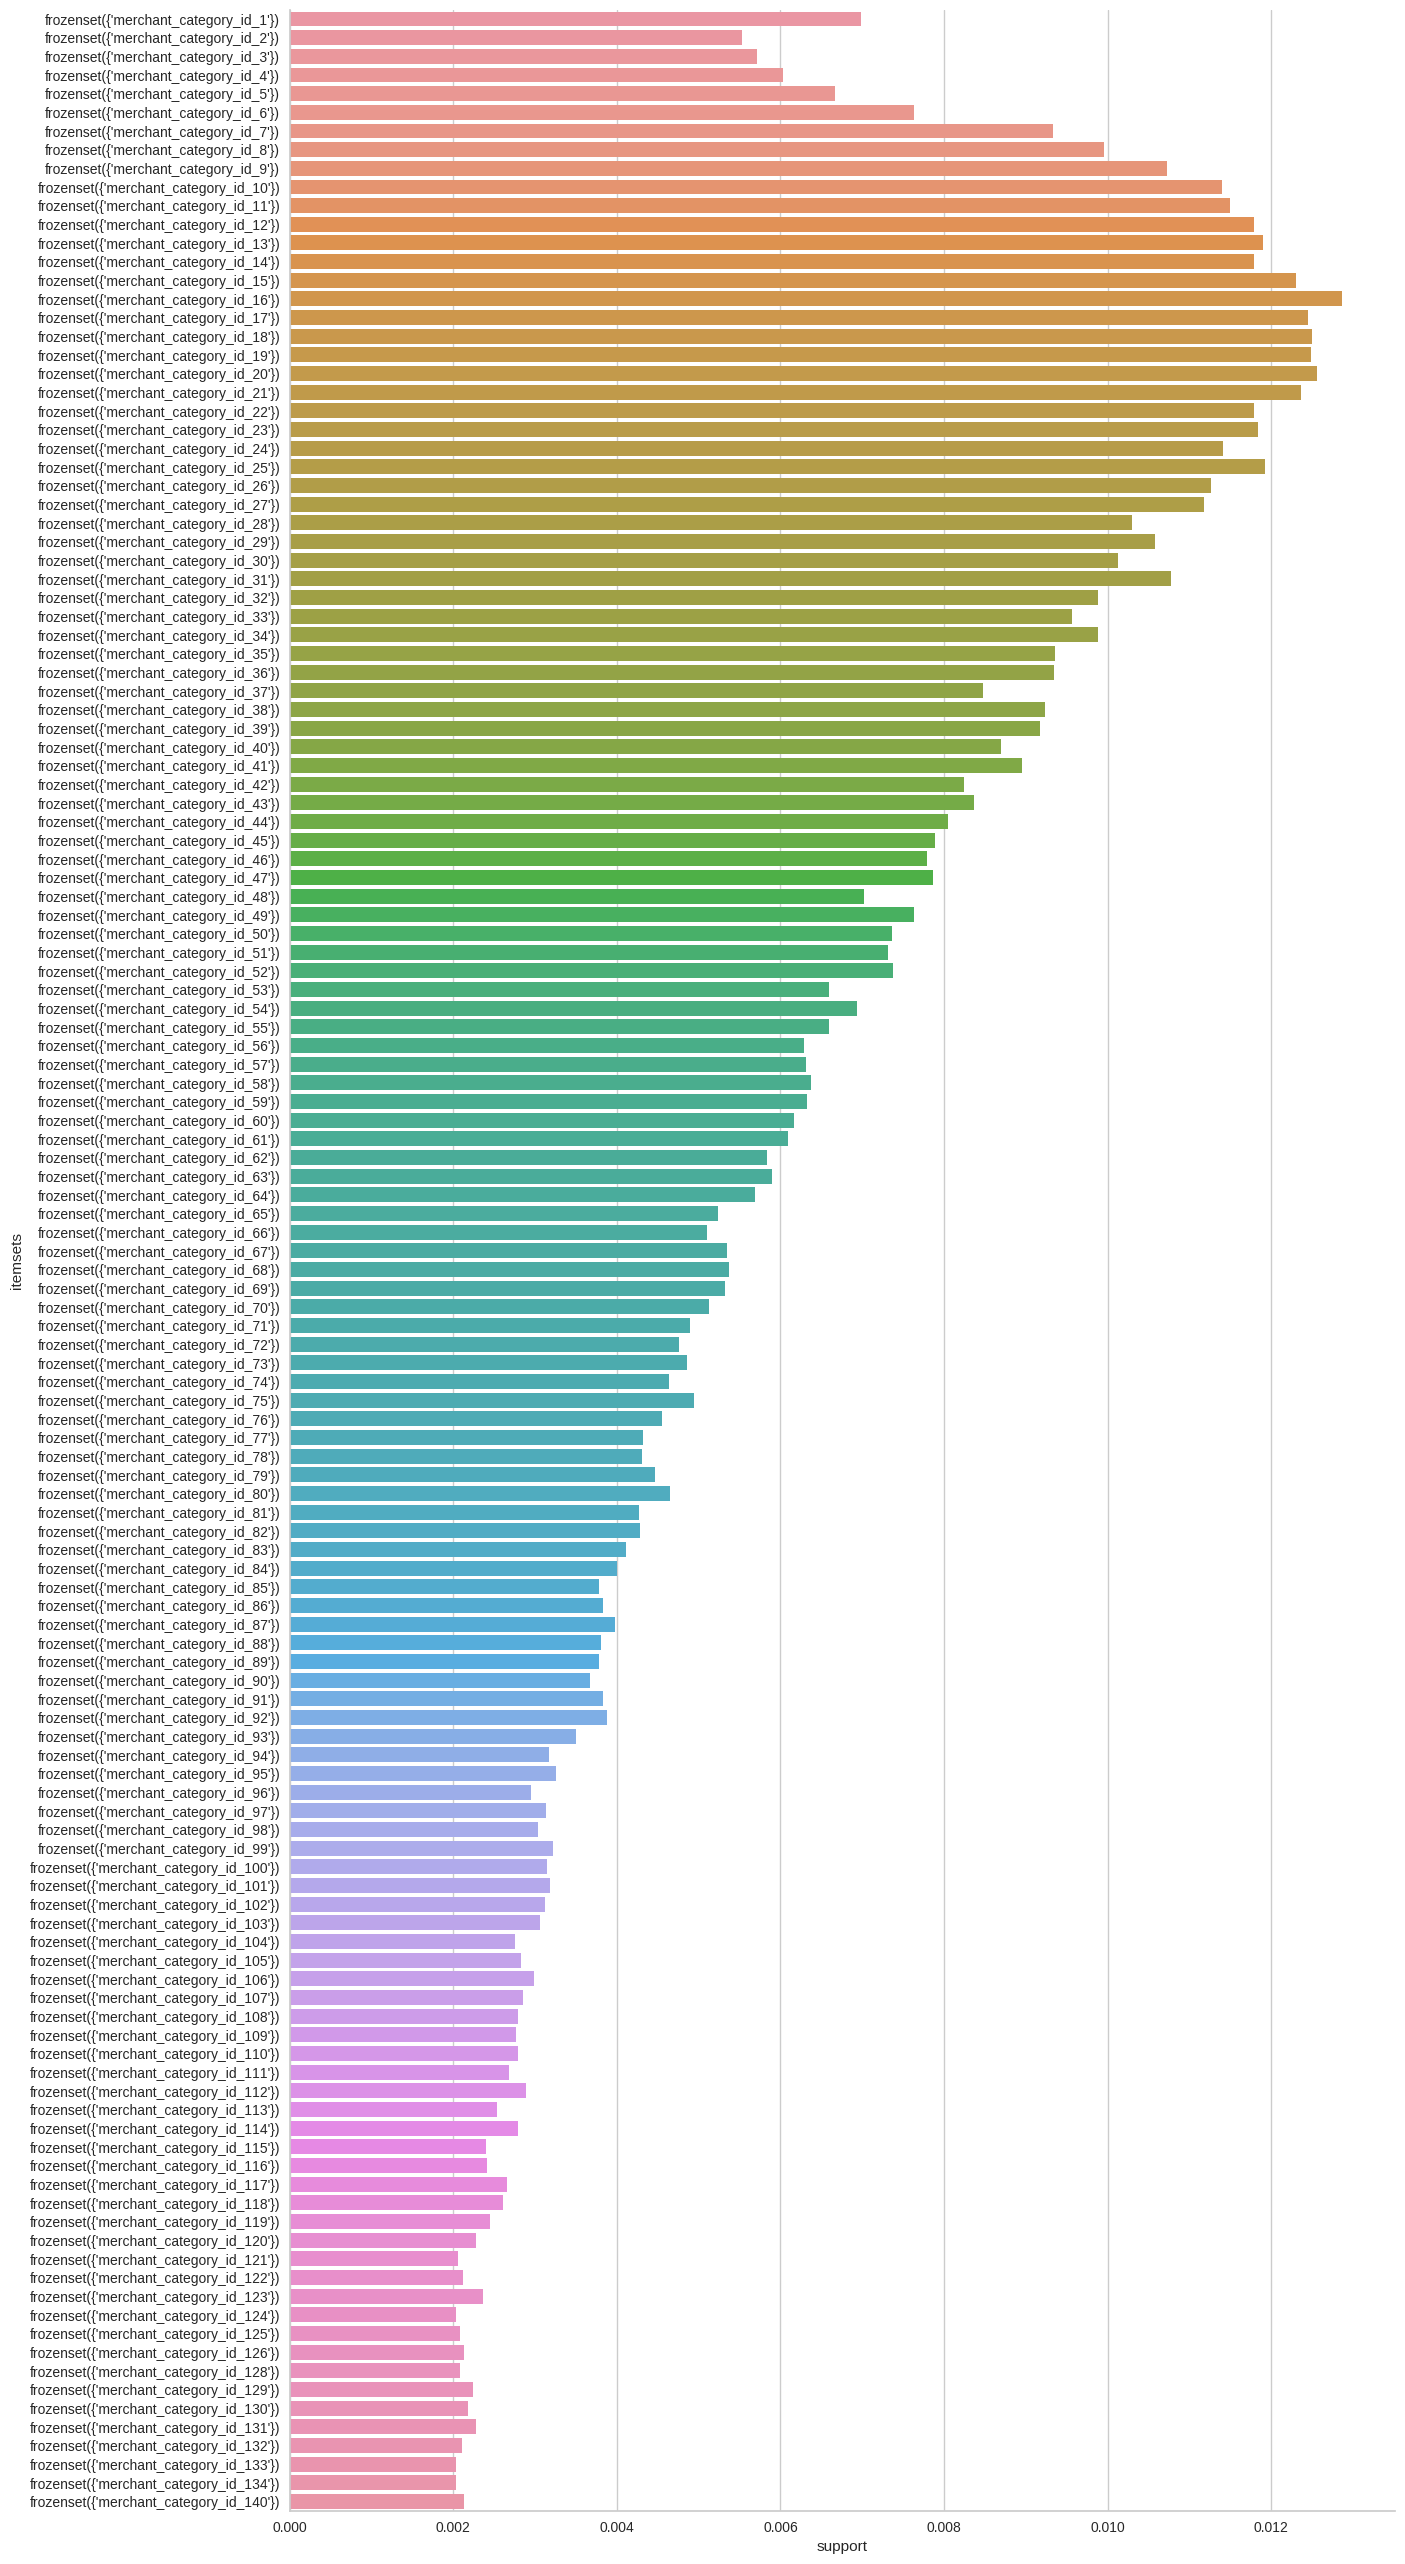

In [ ]:
import seaborn as sns
catplot =sns.catplot(y="itemsets", x="support",data=frequent_itemsets_8,kind="bar")
# Change the size of the plot
catplot.fig.set_size_inches(30, 30)
# Show the plot
plt.show()

In [ ]:
print(np.max( frequent_itemsets_8["support"]))

0.012871215355247155


- from the previous plot we can detect that The most frequent pattern in the list you provided is (merchant_category_id_16). It has a support of 0.012871215355247155

- This means that All itemsets that appear have a support of at least 0.002, or 0.2%, in the dataset. This means that they occur together in the dataset at least 0.2% of the time

Trial 3

In [ ]:
frequent_itemsets_9 = apriori(test_3, min_support=0.01, use_colnames=True)
print(frequent_itemsets_9)

     support                   itemsets
0   0.010721   (merchant_category_id_9)
1   0.011397  (merchant_category_id_10)
2   0.011494  (merchant_category_id_11)
3   0.011784  (merchant_category_id_12)
4   0.011897  (merchant_category_id_13)
5   0.011792  (merchant_category_id_14)
6   0.012307  (merchant_category_id_15)
7   0.012871  (merchant_category_id_16)
8   0.012444  (merchant_category_id_17)
9   0.012501  (merchant_category_id_18)
10  0.012485  (merchant_category_id_19)
11  0.012565  (merchant_category_id_20)
12  0.012364  (merchant_category_id_21)
13  0.011792  (merchant_category_id_22)
14  0.011840  (merchant_category_id_23)
15  0.011413  (merchant_category_id_24)
16  0.011921  (merchant_category_id_25)
17  0.011260  (merchant_category_id_26)
18  0.011180  (merchant_category_id_27)
19  0.010302  (merchant_category_id_28)
20  0.010576  (merchant_category_id_29)
21  0.010133  (merchant_category_id_30)
22  0.010769  (merchant_category_id_31)


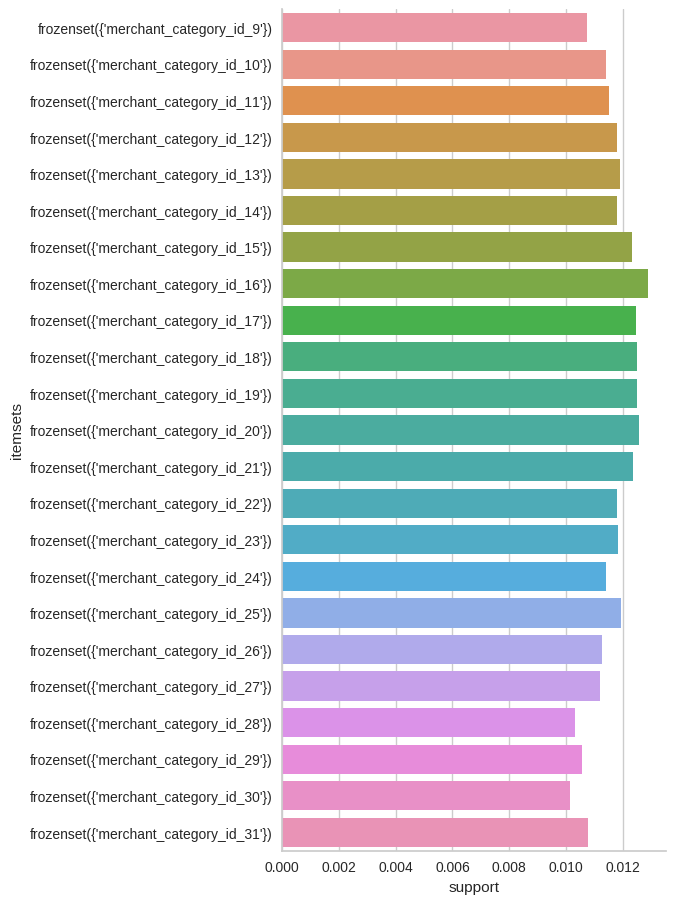

In [ ]:
import seaborn as sns
catplot =sns.catplot(y="itemsets", x="support",data=frequent_itemsets_9,kind="bar")
# Change the size of the plot
catplot.fig.set_size_inches(10, 10)
# Show the plot
plt.show()

In [ ]:
print(np.max( frequent_itemsets_9["support"]))

0.012871215355247155


- from the previous plot we can detect that The most frequent pattern in the list you provided is (merchant_category_id_16) , It has a support of 0.012871215355247155


- This means that All itemsets that appear have a support of at least 0.01, or 1%, in the dataset. This means that they occur together in the dataset at least 1% of the time

- the three trials are detect that The most frequent pattern in the list you provided are (merchant_category_id_16)

**The Result**

From question 5 and question 6 , most trials detect that The most frequent pattern is (merchant_category_id_16)